# USED CAR PRICE PREDICTION 

## Importing the required libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# statistical tests libreries
from scipy.stats import levene
from scipy.stats import mannwhitneyu
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sfa

## Load dataset

In [2]:
data= pd.read_csv(r'vehicles.csv')

### Shape of the data

In [3]:
data.shape

(426880, 26)

In [4]:
pd.options.display.max_columns = 100
data.iloc[500:,].head(5)  # as we have nan values at the begning.

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
500,7313794897,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,https://bham.craigslist.org,12977,2011.0,lexus,rx,NaN,NaN,gas,140994.0,clean,automatic,2T2BK1BA6BC090077,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_llwwNpkdrq...,Contemporary Automotive address: 3427 Skyla...,NaN,al,33.168322,-87.491902,2021-04-28T09:10:58-0500
501,7313781903,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,12995,2008.0,ford,f150 xl,NaN,NaN,gas,93146.0,clean,automatic,1FTRF12V98KD94523,NaN,NaN,NaN,green,https://images.craigslist.org/00O0O_dq7Varo7VC...,** 2008 FORD F150 XL * V8 * EXT CAB * CAMPER ...,NaN,al,34.950600,-85.243200,2021-04-28T08:44:19-0500
502,7313781430,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,36995,2012.0,ford,f250 super duty 4x4,NaN,NaN,gas,41364.0,clean,automatic,1FD7X2B65CEC58024,4wd,NaN,NaN,silver,https://images.craigslist.org/00606_7ArnvQe5rw...,** 2012 FORD F250 SD * 41K MILES * EXT CAB * U...,NaN,al,34.950600,-85.243200,2021-04-28T08:43:21-0500
503,7313781284,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,31995,2017.0,ford,f350 super duty,NaN,NaN,gas,129638.0,clean,automatic,1FD8W3G69HEB28454,NaN,NaN,NaN,white,https://images.craigslist.org/00a0a_iJk9cxR04X...,** 2017 FORD SD F350 * CREW CAB * FLAT BED * D...,NaN,al,34.950600,-85.243200,2021-04-28T08:43:05-0500
504,7313781180,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,25995,2015.0,gmc,sierra 2500hd,NaN,NaN,gas,126690.0,clean,automatic,1GT21XEG0FZ537816,NaN,NaN,NaN,red,https://images.craigslist.org/00j0j_6MMzGwI5gq...,** 2015 GMC SIERRA 2500 HD * CREW CAB * LONGBE...,NaN,al,34.950600,-85.243200,2021-04-28T08:42:50-0500


In [5]:
# dataset columns

data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
# Info treatment

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

##### Observations:
* Here year and posting date column's have wrong data type, So we change the datatype of these columns.

In [7]:
# Changing data types
data.posting_date = pd.to_datetime(data.posting_date,utc=True)

### Five Point Summary

In [8]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


##### Observations:
* Minimum value in price is 0, So there are some 0 values present in our target variable.
* Minimum value in odometer is also 0, So there are also some 0 values present.

### Checking for null values

In [9]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns

print('Missing Values')
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', '%'])    
missing_data

Missing Values


,Total,%
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


### Droping Unnecessory columns
* Id - It has only unique values, so it don't give any useful information.
* Region url, Image url- They contains the web links.
* county - It has 100% null values. 
* Lat, Long - They have the cordinates of the location of the car and they don't implies any useful information.

In [10]:
data.drop(['id','region_url','county','image_url','lat','long'],axis =1,inplace = True)

### Droping records
* Droping the records which have greater than 15 null values in a single record.

In [11]:
data.shape

(426880, 20)

In [12]:
# Dropping the duplicates records on the basis of following columns.

data.drop_duplicates(subset=['price','year','manufacturer','model','condition','cylinders','fuel','odometer',
                             'title_status','transmission','VIN','drive','size','type','paint_color','state'],
                     keep = 'first',inplace = True)

In [13]:
data.shape

(299509, 20)

In [14]:
# .isnull().sum(axis = 1) gives the sum of all the null values row wise.

car = data.loc[data.isnull().sum(axis = 1)<15]   

# 

In [15]:
car[car.price==0].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
46,https://auburn.craigslist.org/ctd/d/auburn-999...,auburn,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,NaN,full-size,SUV,NaN,Call or text now 800-213-0336 Open 9:00-6:00pm...,al,2021-04-30 21:35:11+00:00
126,https://auburn.craigslist.org/ctd/d/ozark-2018...,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,"2018 Chevrolet Express Cargo Van RWD 2500 135""...",al,2021-04-12 16:20:35+00:00
127,https://auburn.craigslist.org/ctd/d/ozark-2019...,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,"2019 Chevrolet Express Cargo Van RWD 2500 135""...",al,2021-04-12 16:20:00+00:00


In [16]:
# finding the count of values where car price is 0

car[car.price==0].price.count()

20070

* Target variable has some 0 values which make no sense for a car price.
* So we make this dataset as test data.

In [17]:
car[car.price<500].shape[0]

25659

In [18]:
absurd_data = car[car.price<500]
absurd_data = absurd_data.drop('price',axis = 1,inplace = True)  # we can take it as unseen data.

In [19]:
car = car[car.price!=0]

# 

# Univariate analysis

### Target variable

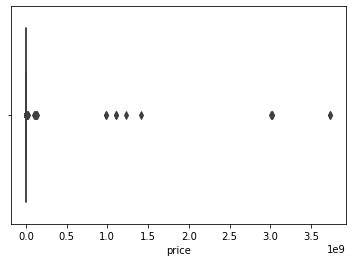

In [20]:
# Boxplot

sns.boxplot(car.price)
plt.show()

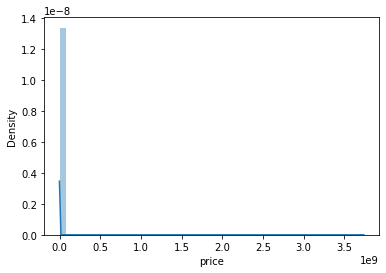

In [21]:
# distribution plot

sns.distplot(car.price)
plt.show()

In [22]:
# Summary statistics of the data to visualize the target variable better
car.price.describe()

count    2.793840e+05
mean     1.056718e+05
std      1.505829e+07
min      1.000000e+00
25%      6.500000e+03
50%      1.390000e+04
75%      2.525000e+04
max      3.736929e+09
Name: price, dtype: float64

##### Observations :
* Target variable has absurdly very low values.
* There are very much high price of some cars.

In [24]:
q1 = car.price.quantile(0.25)
q3 = car.price.quantile(0.75)

iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
upper_limit

57372.5

In [25]:
# 1st having price range from 500 to 57,000.
# 2nd having price range above 57,000. 

car1 = car.loc[(car.price >500) & (car.price <= 57000),]
car2 = car.loc[car.price > 57000,]

In [26]:
car1.head(2)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00


In [27]:
car2.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
204,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,58977,2019.0,gmc,sierra 3500,NaN,NaN,gas,66368.0,clean,automatic,1GT42WEY6KF184860,4wd,NaN,NaN,white,Contemporary Automotive address: 3427 Skyla...,al,2021-05-04 14:11:35+00:00
280,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,2021-05-02 18:24:09+00:00
346,https://bham.craigslist.org/ctd/d/cleveland-20...,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,"2001 Ferrari 360 Modena Spider - $98,900 Year:...",al,2021-05-01 13:48:02+00:00


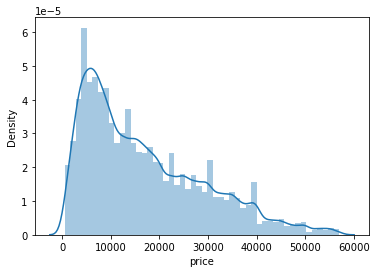

In [28]:
# distribution plot for car1

sns.distplot(car1.price)
plt.show()

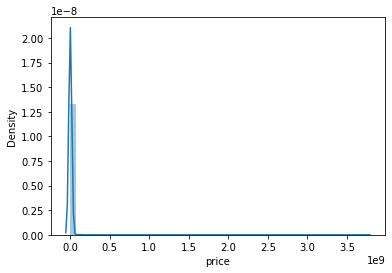

In [29]:
# distribution plot for car2

sns.distplot(car2.price)
plt.show()

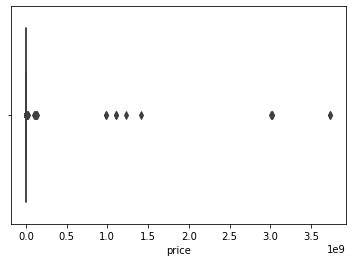

In [30]:
# Boxplot for car2

sns.boxplot(car2.price)
plt.show()

### Price

* most listed used car prices are between 5,000 to 15,000 for car1 dataset.
* most listed used car prices are between 57,000 to 70,000 for car2 dataset.

In [31]:
# unique values in categorical columns of Car1 dataset.

{column:len(car1[column].unique()) for column in car1.columns if car1.dtypes[column]=='object'} 

{'url': 267656,
 'region': 404,
 'manufacturer': 43,
 'model': 26670,
 'condition': 7,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 100526,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'description': 253443,
 'state': 51}

In [32]:
# unique values in categorical columns of car2 dataset.

{column:len(car2[column].unique()) for column in car2.columns if car2.dtypes[column]=='object'} 

{'url': 5635,
 'region': 333,
 'manufacturer': 33,
 'model': 1584,
 'condition': 6,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 2337,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'description': 4610,
 'state': 51}

#### Seperating Columns in Numerical and Categorical for univariate and bivariate analysis.

In [33]:
car.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'state',
       'posting_date'],
      dtype='object')

In [34]:
num_cols = ['price','odometer']

cat_cols = ['region','year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'posting_date']

# 

### Univariate Analysis for Numerical columns

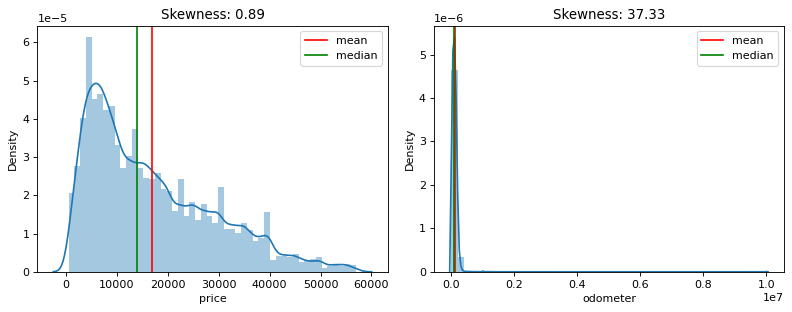

In [35]:
# Plotting all numerical columns/variables (all together using loop) for car1 dataset.

t = 1
plt.figure(figsize = (10,4),dpi=80)
for i in num_cols:
    plt.subplot(1,2,t)  # ---------for plotting 2 plots in a figure
    sns.distplot(car1[i])   #----- for ditribution plot
    plt.title(i)
    plt.axvline(car1[i].mean(),color='r',label='mean')    # -------- to draw the mean line 
    plt.axvline(car1[i].median(),color='g',label='median')  #---------- to draw the median line.
    plt.legend()

    plt.title('Skewness: %.2f'%car1[i].skew())
    t+=1

plt.tight_layout()
plt.show()

In [36]:
car1.loc[car1.odometer==0].shape[0]

713

In [37]:
car1[car1.odometer>1000000].shape[0]

375

###### Observations:
* Price is right skewed.
* There are some cars having odometer reading greater than 10 lakh which will be considered as misleading values because
    maximum reading in a odometer can be upto 10 lakh only.

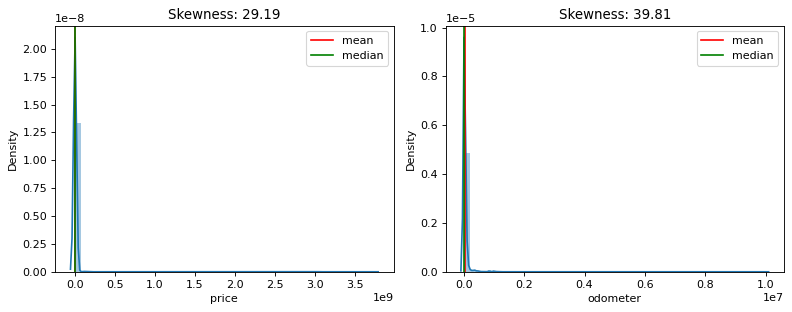

In [38]:
# Plotting all numerical columns/variables (all together using loop) for car2 dataset.

t = 1
plt.figure(figsize = (10,4),dpi=80)
for i in num_cols:
    plt.subplot(1,2,t)
    sns.distplot(car2[i])
    plt.title(i)
    plt.axvline(car2[i].mean(),color='r',label='mean')
    plt.axvline(car2[i].median(),color='g',label='median')
    plt.legend()

    plt.title('Skewness: %.2f'%car2[i].skew())
    t+=1

plt.tight_layout()
plt.show()

###### Observations:
* In odometer, there are some values greater than 10 lakh which will be considered as misleading values because
    maximum reading in a odometer can be upto 10 lakh only and some 0 are also present.

### Univarite Analysis for Categorical columns

#### 1. Regions

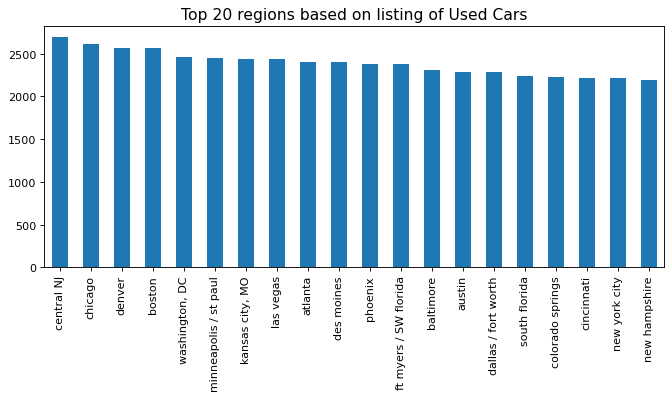

In [39]:
# As plotting 400+ regions is very resource heavy task, we plot top 20 regions here to get an idea

# 1. Top 20 regions

plt.figure(figsize=(10,4),dpi = 80) 
car1['region'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 regions based on listing of Used Cars',fontsize=14)
plt.show()

###### Inference:
* Central Nj have highest number of listed used cars.

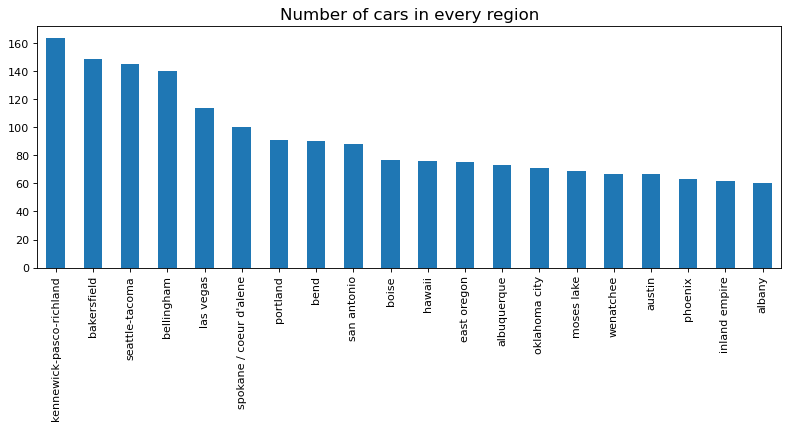

In [40]:
# Regions in car2 datset.

plt.figure(figsize=(12,4),dpi=80) 
car2['region'].value_counts()[:20].plot(kind='bar')
plt.title('Number of cars in every region',fontsize=15)
plt.show()

##### Inference:
* Kennewick-pasco-richland has maximum number of premium price cars  
  followed by bakersfield,Seattle-tacoma and bellingham.

#### 2. Manufacturer

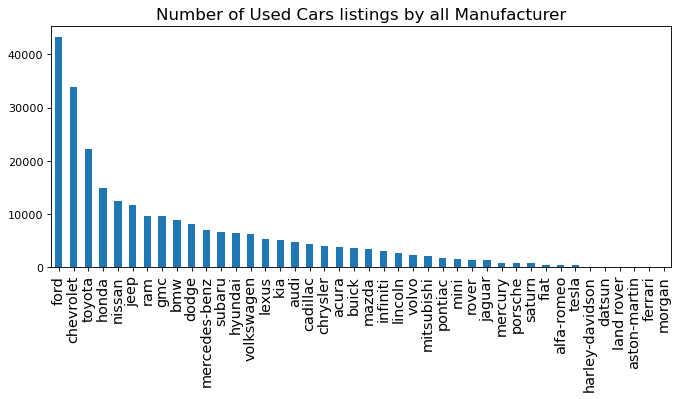

In [41]:
# Countplot for manufacturer for car1

plt.figure(figsize=(10,4),dpi=80)
car1.manufacturer.value_counts().plot(kind='bar')
plt.xticks(rotation = 90,fontsize = 13)
plt.title('Number of Used Cars listings by all Manufacturer',fontsize=15)
plt.show()

##### Inference:
* The top 3 most popular listed used car manufacturers are ford, chevrolet, and toyota while the least 3 are morgon,ferrari and aston-martin.

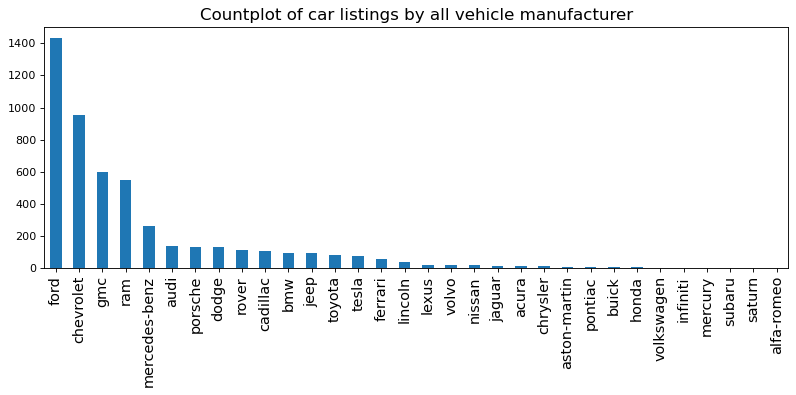

In [42]:
# Countplot for manufacturer for car2

plt.figure(figsize=(12,4),dpi=80)
car2.manufacturer.value_counts().plot(kind='bar')
plt.xticks(rotation = 90,fontsize=13)
plt.title('Countplot of car listings by all vehicle manufacturer',fontsize=15)
plt.show()

##### Inference:
* Most of the premium used cars are manufactured by ford.
  
  The top 3 most popular listed used car manufacturers are ford, chevrolet, and gmc while the least 3 are Alfa-romeo, Saturn and Subaru.

#### 3. Models

In [43]:
# 3. count of models
car1.model.nunique()

26669

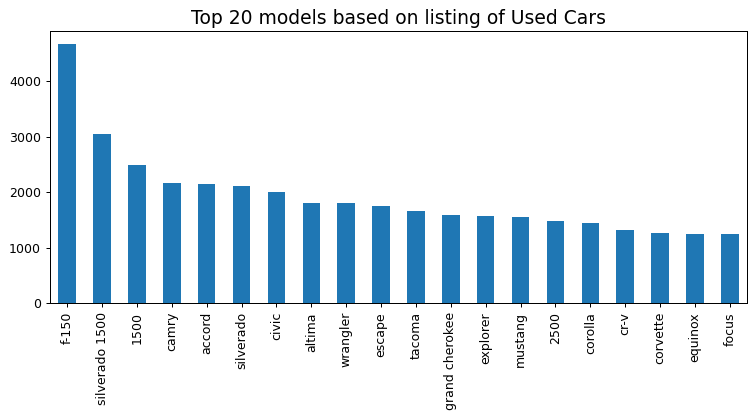

In [44]:
# as plotting 27000 + models is not feasible, we plot the top 10 models here to get an idea

# 3. Top 20 models for car1

plt.figure(figsize=(10,4),dpi=90) 
car['model'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 models based on listing of Used Cars',fontsize = 15)
plt.show()

##### Inference:
* f-150 model car is highest listed in the used car market 
  
  which belongs to Ford.

In [45]:
# 3. count of models
car2.model.nunique()

1583

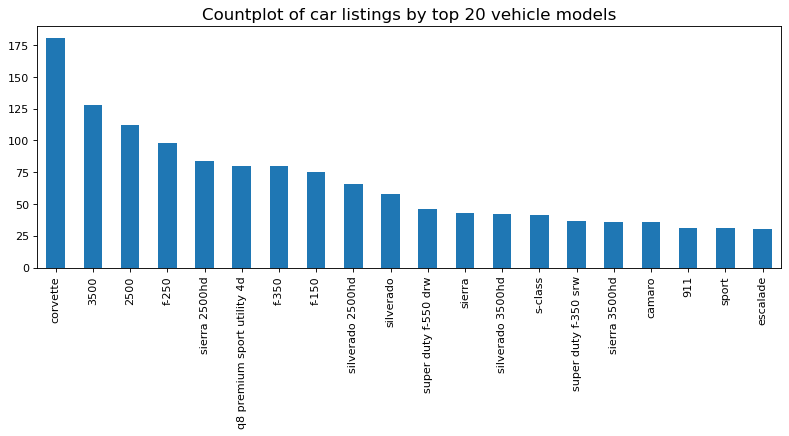

In [46]:
# 3. Top 20 models for car2

plt.figure(figsize=(12,4),dpi=80) 
car2['model'].value_counts()[:20].plot(kind='bar')
plt.title('Countplot of car listings by top 20 vehicle models',fontsize = 15)
plt.show()

##### Inference:
* In premium price cars, Corvette model is frequently appeared
  
  which belongs to Chevrolet.

#### 4. Condition

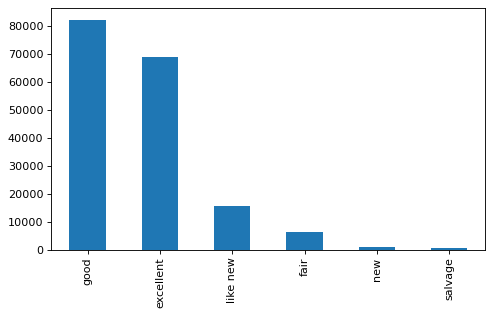

In [47]:
# Countplot for Condition of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['condition'].value_counts().plot(kind='bar')
# plt.title('Car conditions distribution',fontsize=15)
plt.show()

###### Inferences:
* Good condition car is most listed which contributed around 50% of the distribution

  followed by excellent condition which contriutes around 38%.

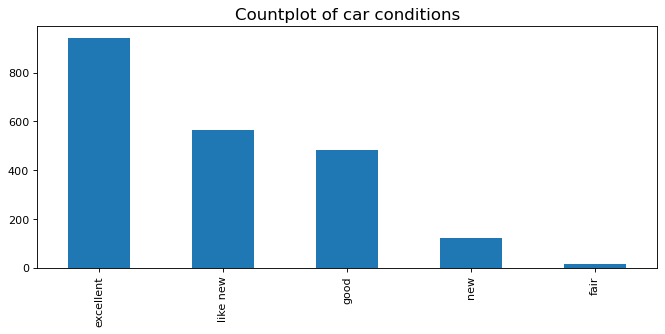

In [48]:
# Countplot for Condition of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['condition'].value_counts().plot(kind='bar')
plt.title('Countplot of car conditions',fontsize=15)
plt.show()

##### Inferences:
   * In premium cars most of the cars have excellent condition,
   
     which contributes around 48% of the total distribution of condition in used car market .

#### 5. Cylinders

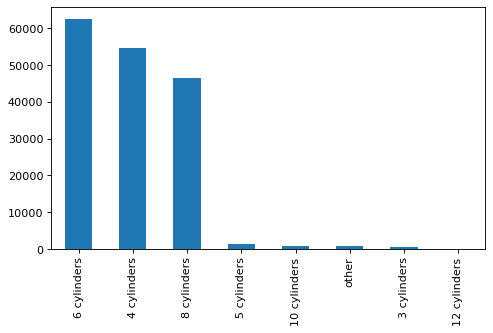

In [49]:
# Countplot for Cylinders of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['cylinders'].value_counts().plot(kind='bar')
# plt.title('Car cylinders distribution',fontsize=15)
plt.show()

##### Inferences:
   * Cars with 6, 4, and 8 cylinders are the most popular listed in used car market.
     
     This is expected because most cars are equipped with cylinders in that range.

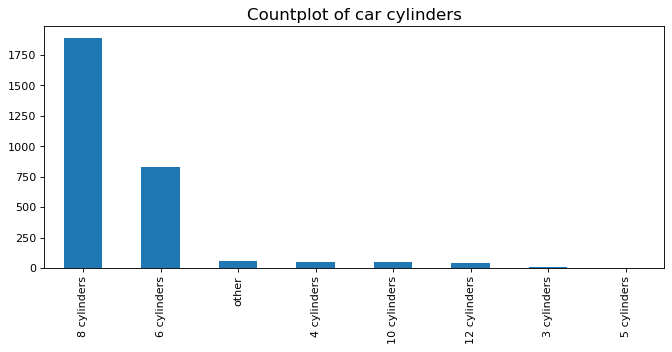

In [50]:
# Countplot for Cylinders of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['cylinders'].value_counts().plot(kind='bar')
plt.title('Countplot of car cylinders',fontsize=15)
plt.show()

##### Inferences:
   * Maximum premium cars have 8 cylinders.

#### 6. Fuel

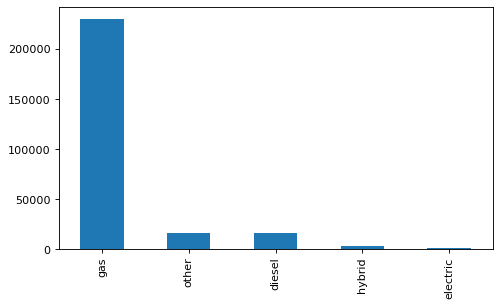

In [51]:
# Countplot for fuel for car1

plt.figure(figsize=(7,4),dpi=80)
car1['fuel'].value_counts().plot(kind='bar')
# plt.title('Cars fuel type distribution',fontsize=15)
plt.show()

##### Inferences :
   * Most of the cars whose price range is between 500 to 57000 have fuel type 'gas.
     
     As expected, gas or petrol is the most common type of fuel for the listed cars. 
   
   
   * Very few of them are electric cars.

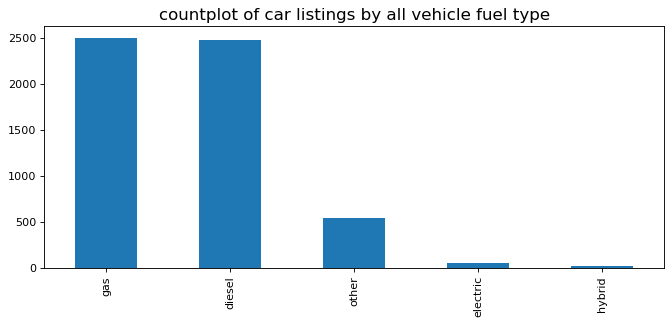

In [52]:
# Countplot for fuel for car2

plt.figure(figsize=(10,4),dpi=80)
car2['fuel'].value_counts().plot(kind='bar')
plt.title('countplot of car listings by all vehicle fuel type',fontsize=15)
plt.show()

##### Inferences:
   * Most of the Premium cars have  fuel type 'gas'.
   * There are less electric and hybrid premium cars in premium segment.

#### 7. Title Status

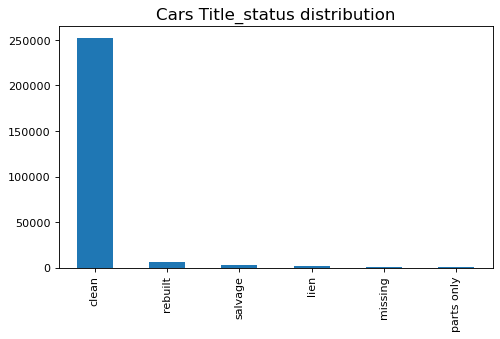

In [53]:
# Countplot for title_status for car1

plt.figure(figsize=(7,4),dpi=80)
car1['title_status'].value_counts().plot(kind='bar')
plt.title("Cars Title_status distribution",fontsize=15)
plt.show()

##### Inferences:
* Most of the cars status is clean.
* Cars having price range between 500 to 57000 have car's title_status in following order :-
                  clean > rebuilt > salvage > lien > missing > parts only

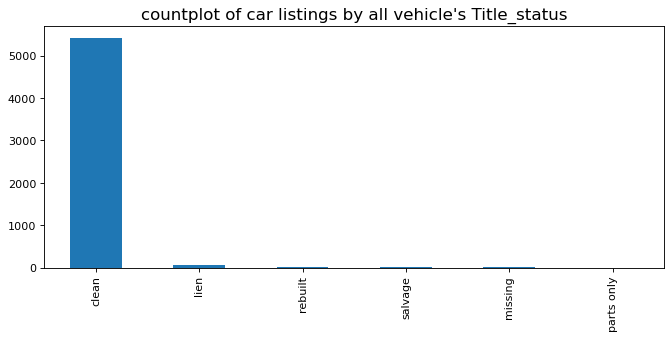

In [54]:
# Countplot for title_status for car2

plt.figure(figsize=(10,4),dpi=80)
car2['title_status'].value_counts().plot(kind='bar')
plt.title("countplot of car listings by all vehicle's Title_status",fontsize=15)
plt.show()

##### Inferences:
* Most of the premium cars have status clean.
* Premium cars title_status is in following order :-
            clean > missing > salvage > rebuilt > lien > parts only

#### 8. Transmission

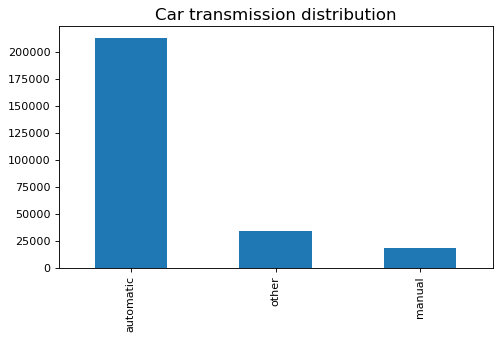

In [55]:
# countplot of the transmission varibale of car1

plt.figure(figsize=(7,4),dpi = 80) 
car1['transmission'].value_counts().plot(kind='bar')
plt.title('Car transmission distribution',fontsize = 15)
plt.show()

##### Inference:
* The most common car transmission type is automatic as expected.
* Manual cars are the least

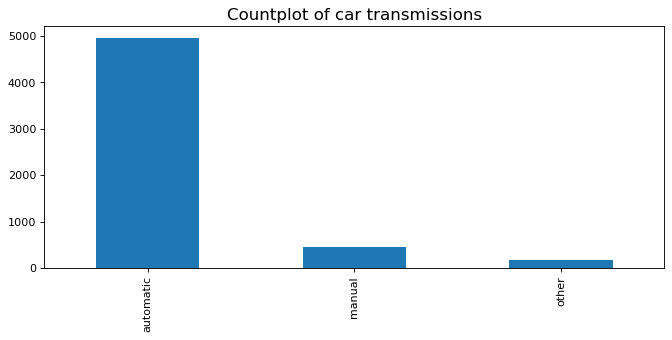

In [56]:
# countplot the transmission varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['transmission'].value_counts().plot(kind='bar')
plt.title('Countplot of car transmissions',fontsize = 15)
plt.show()

##### Inference:
* In premium cars too ,Automatic cars are found the most.
* And  Manual cars are the least 

#### 9. Drive

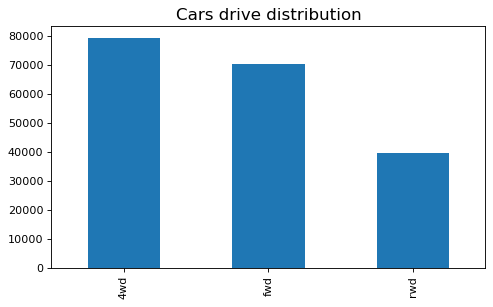

In [57]:
# countplot of the drive varibale of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['drive'].value_counts().plot(kind='bar')
plt.title('Cars drive distribution',fontsize = 15)
plt.show()

##### Inference:
* 4 wheel drive is the most  commonly found car drive followed by front wheel drive 
* Rear wheel drive is the least found cra drive in used car market 1

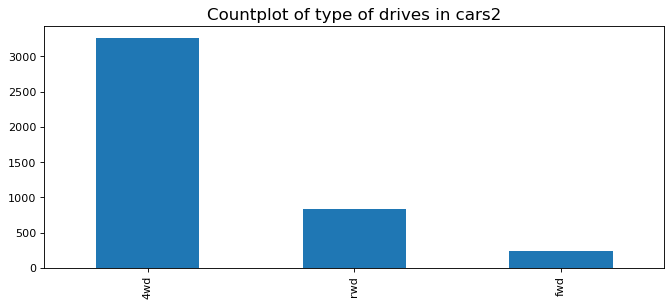

In [58]:
# countplot of the drive varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['drive'].value_counts().plot(kind='bar')
plt.title('Countplot of type of drives in cars2',fontsize = 15)
plt.show()

##### Inference:
* 4 wheel drive is the most  commonly found car by a large margin in premium cars
* Rear wheel drive and Front wheel drive counts are very low in used premium car market

#### 10. Size

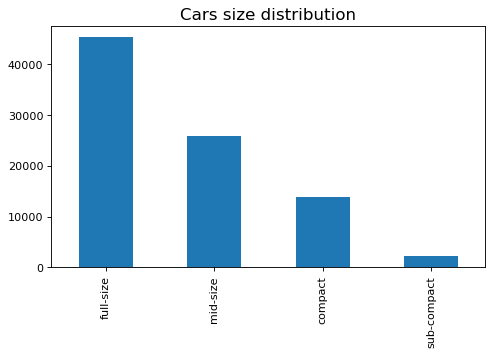

In [59]:
# countplot of the size varibale of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['size'].value_counts().plot(kind='bar')
plt.title('Cars size distribution',fontsize = 15)
plt.show()

##### Inferences:
* Full-size cars are most listed in used car market.
  
  Genearlly, sedan type cars are considerd as full-sized cars in USA. 

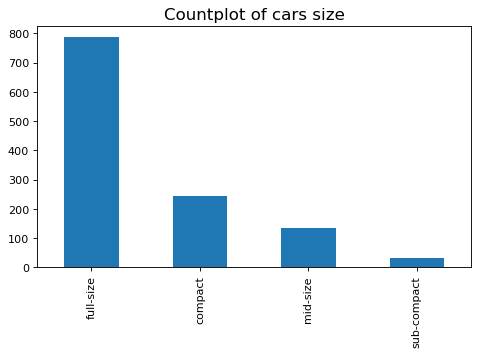

In [60]:
# countplot of the size varibale of car2

plt.figure(figsize=(7,4),dpi=80) 
car2['size'].value_counts().plot(kind='bar')
plt.title('Countplot of cars size',fontsize = 15)
plt.show()

##### Inferences:
* Full size cars have the most and sub-compact size are least popular in listed premium used car.

#### 11. Type

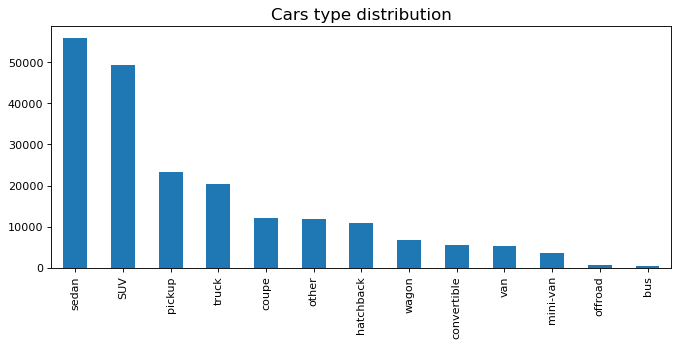

In [61]:
# countplot of the type varibale of car1

plt.figure(figsize=(10,4),dpi=80) 
car1['type'].value_counts().plot(kind='bar')
plt.title('Cars type distribution',fontsize = 15)
plt.show()

##### Inferences:
* Sedans, SUVs are the two most popular car listings followed by pickups and trucks.

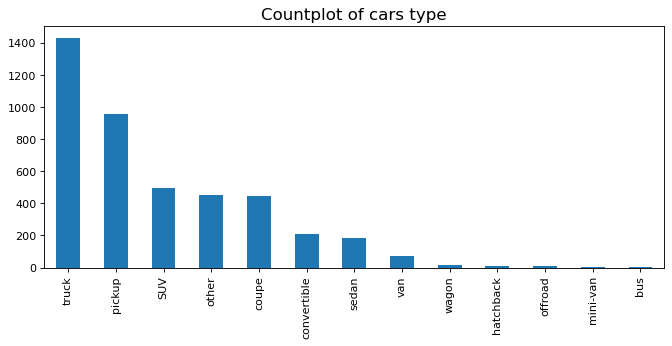

In [62]:
# countplot of the type varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['type'].value_counts().plot(kind='bar')
plt.title('Countplot of cars type',fontsize = 15)
plt.show()

##### Inferences:
* In premium cars, Trucks are the most listed cars in the used car market followed by pickup.

#### 12. Paint

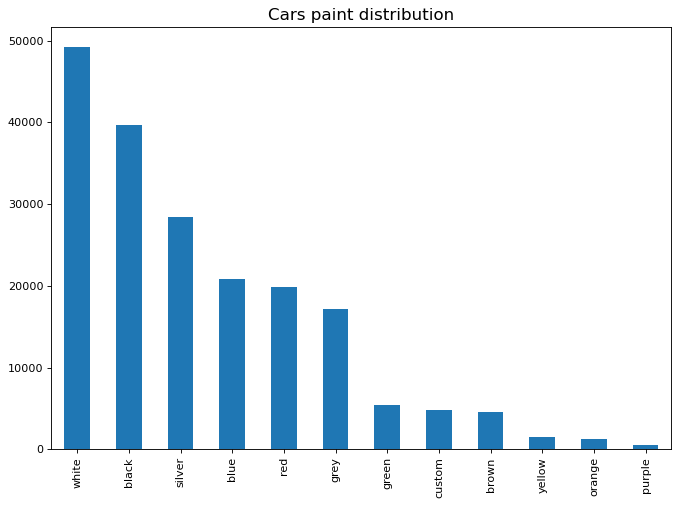

In [63]:
# countplot of the paint varibale of car1

plt.figure(figsize=(10,7),dpi=80) 
car1['paint_color'].value_counts().plot(kind='bar')
plt.title('Cars paint distribution',fontsize = 15)
plt.show()

##### Inferences:
* White and black are the two most popular colors of cars being listed, followed by silver.

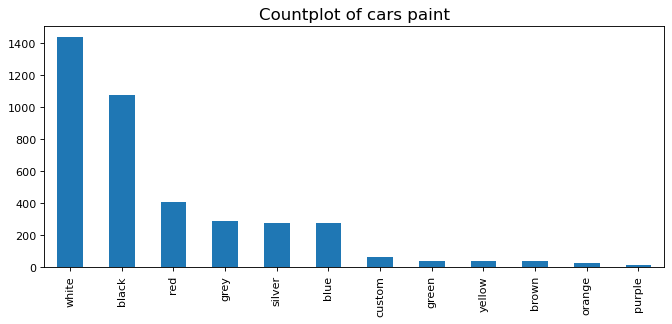

In [64]:
# countplot of the paint varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['paint_color'].value_counts().plot(kind='bar')
plt.title('Countplot of cars paint',fontsize = 15)
plt.show()

##### Inferences:
* In premium cars, white and black colour cars are most frequently listed.

#### 13. State

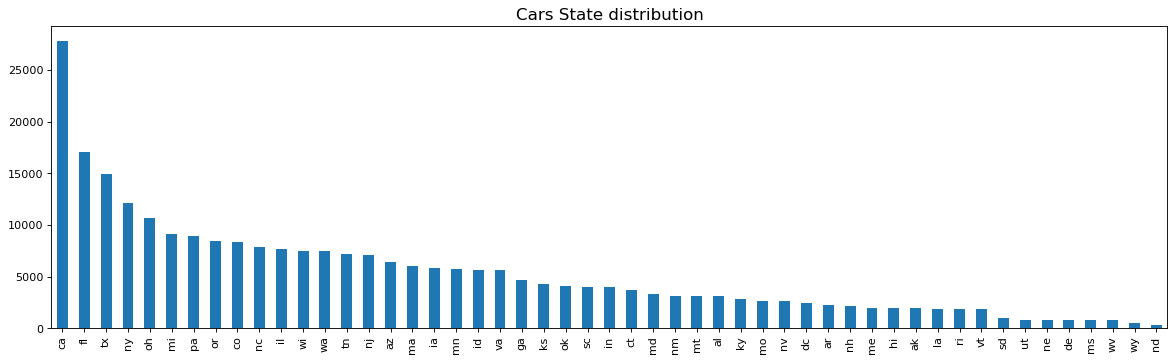

In [65]:
# countplot of the state varibale where cars are available in used car market.

plt.figure(figsize=(18,5),dpi = 80) 
car1['state'].value_counts().plot(kind='bar')
plt.title('Cars State distribution',fontsize = 15)
plt.show()

##### Inferences:
* In used car market most of the cars are from california.
* top 5 states are California, Florida, Texas, New York, Ohio in used car market. 

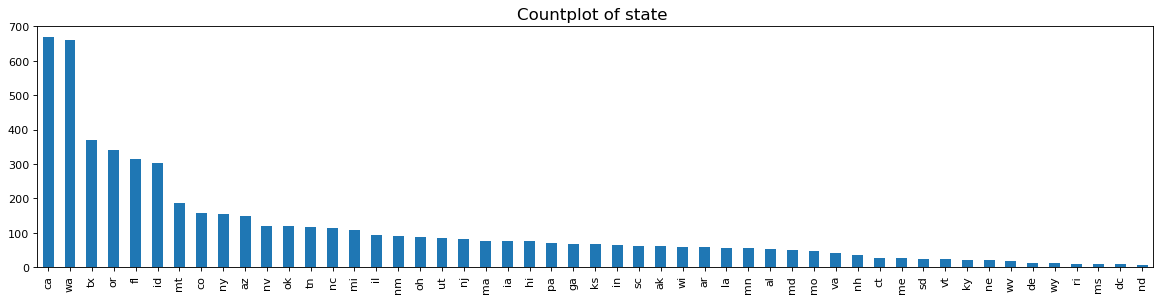

In [66]:
# countplot of the state varibale where cars are available in used car market.

plt.figure(figsize=(18,4),dpi=80) 
car2['state'].value_counts().plot(kind='bar')
plt.title('Countplot of state ',fontsize = 15)
plt.show()

##### Inferences:
* In premium used car market most of the cars are from Callifornia closely followed by Washington.
* Top 5 states are California,Washington,Texas,Oregon and florida in used car market.

### Bivariate Analysis (target vs numerical)

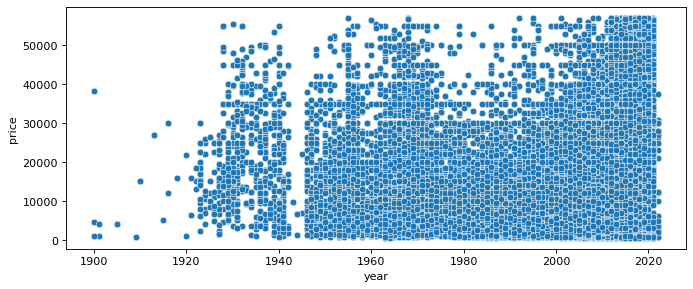

In [67]:
# year Vs price(target) for car1.

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car1.year, car1.price)
plt.show()

## Inferences :-
* Ourdataset contains minimal cars data before 1920.
* There is an increasing trend in car prices after 1980.

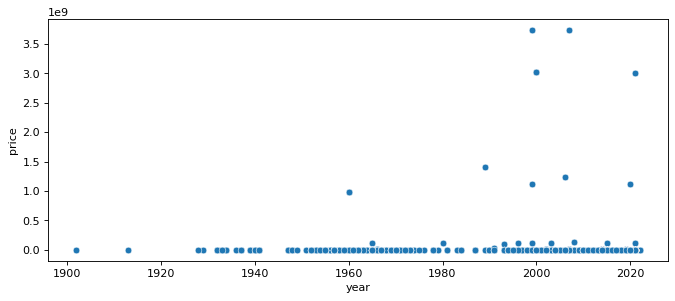

In [68]:
# year Vs price(target) for car2.

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car2.year, car2.price)
plt.show()

##### Inferences:
* Cars with least distance travelled have higher prices.

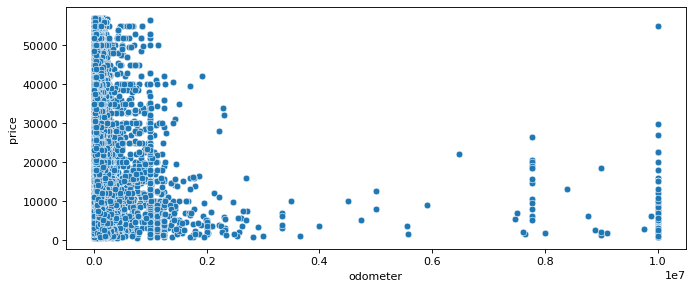

In [70]:
# Odometer vs Price for car1

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car1.odometer, car1.price)
plt.show()

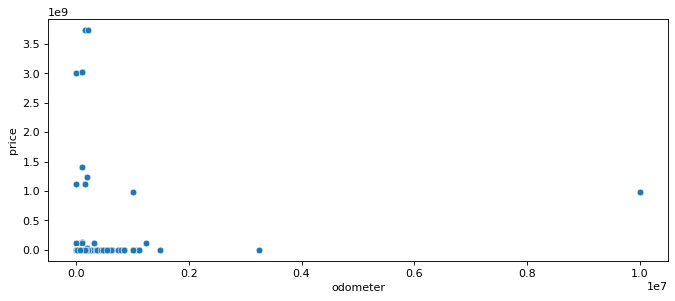

In [71]:
# Odometer vs Price for car2

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car2.odometer, car2.price)
plt.show()

##### Inferences:-
* 99 percent of the cars have travelled low distance.

### Bivariate Analysis (target vs categorical)

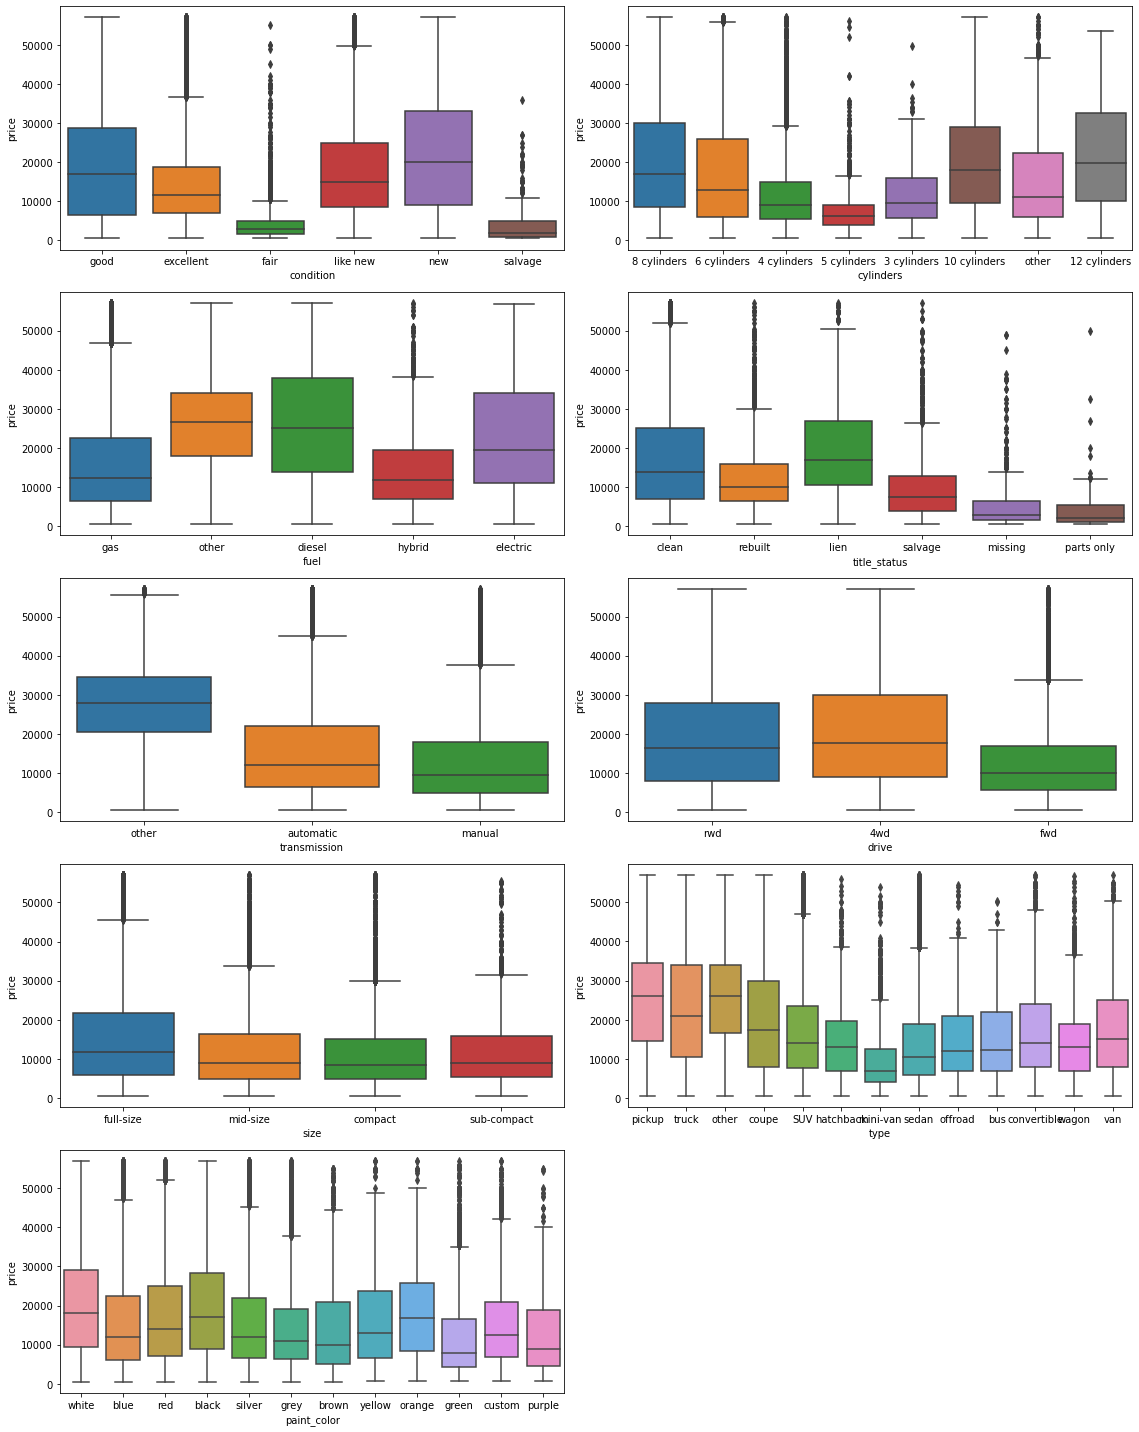

In [72]:
# car1
cat_cols = ['condition','cylinders','fuel','title_status', 'transmission','drive','size','type', 'paint_color']

plt.figure(figsize=(16,20))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(car1[i], car1.price)
    t+=1
plt.tight_layout()
plt.show()

### Inferences:
**1. 'condition' vs 'price'**
* Newly purchased cars have higher Average price.
* Salvaged cars have the least Average price.
* There are outliers present in Excellent, fair, like new and salvage condition categories.

**2. 'cylinder' vs 'price'**
* Cars having 12 cylinders have maximum average price followed by 10 and 8 cylinders.
* There are outliers present in each of the cylinder categories except 8, 10 and 12.

**3. 'fuel' vs 'price'**
* As we can see Average cost of 'other' category fuels is the highest and as all the major fuel types are already displayed, we can   interpret that 'other' category fuels may contain exotic/costly fuels.
* 'Diesel' has 2nd highest Average price in fuel type.
* The fuel types with Least Average price are gas and hybrid.
* There are outliers present in gas and hybrid fuel categories.

**4. 'title_status' vs 'price**
* Cars with title_status 'lien' has the highest average price.
* There are outliers present in each of the title_status categories.

**5. 'transmission' vs 'price'**
* 'Automatic' has higher average price than 'manual' cars
* In transmission category 'other' has the highest average price.
* There are outliers present in each of the transmission categories.

**6. 'drive' vs 'price'**
* 4wd (4 wheel drive) has the highest average price.
* From buisness understanding we can say that 4wd are commonly found in SUV's and pickup trucks which are usually on the      higher price side.
* There are outliers present in fwd  drive category.

**7. 'size' vs 'price'**
* 'full-size' cars have the highest average price.
* There are outliers present in each of the size categories.

**8. 'type' vs 'price'**
* Cars type 'pickup' has the highest average price.
* Mini-van has the least average price..
* There are outliers present in each of the type categories except pickup, truck, coupe.

**9. 'paint_color' vs 'price'**
* Cars with 'paint_color' white and black have the highest average price.
* There are outliers present in each of the paint_color categories except white and black.
* Cars with paint-color green has the least average price.

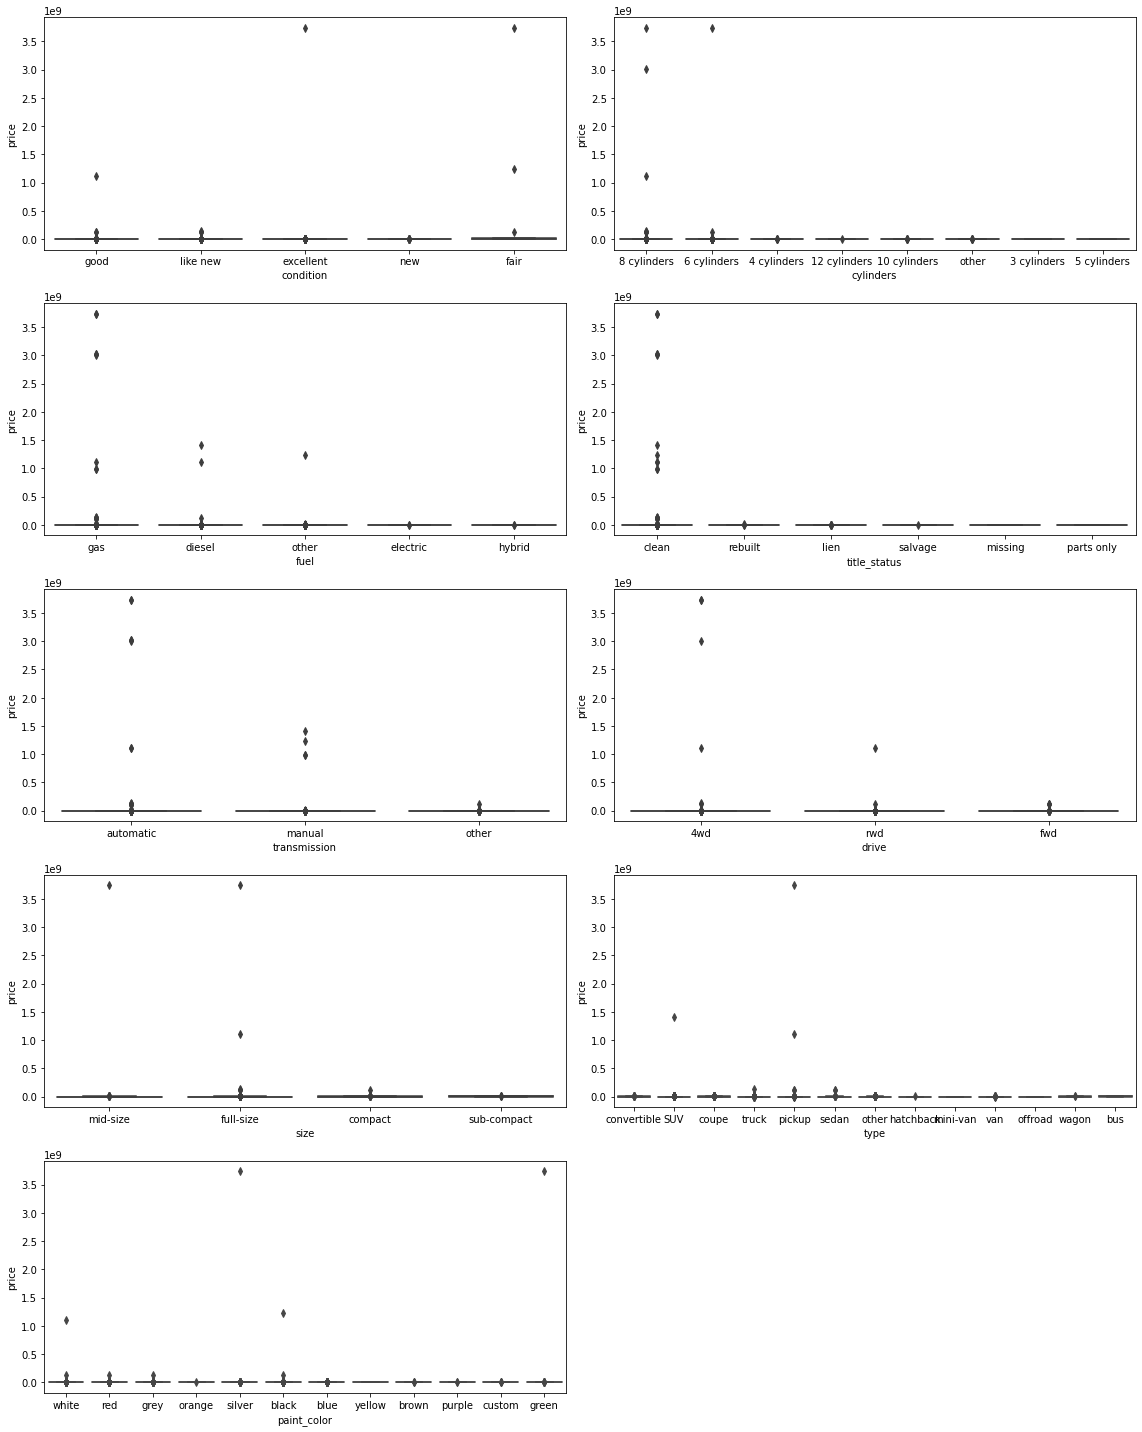

In [73]:
# car2

cat_cols = ['condition','cylinders','fuel','title_status', 'transmission','drive','size','type', 'paint_color']

plt.figure(figsize=(16,20))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(car2[i], car2.price)
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:-
* As the cars2 dataset has very low amount of data, we can not make viable inferences from the graphs.

# 

## Missing Values dealing

In [74]:
car.isnull().sum()[car.isnull().sum()!=0]

year               796
manufacturer     12331
model             3820
condition       100709
cylinders       105333
fuel              1567
odometer          1307
title_status      4346
transmission      1179
VIN             125038
drive            81782
size            189881
type             64617
paint_color      79731
description          2
dtype: int64

#### 1.Year

In [75]:
car[car.year.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
194,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,33990,NaN,NaN,lac XT5 Crossover,NaN,6 cylinders,gas,48784.0,clean,automatic,1GYKNERSXJZ160440,fwd,NaN,SUV,black,2018 *Cadillac* *XT5 Crossover* FWD 4dr Premiu...,al,2021-05-04 15:11:04+00:00
350,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,35495,NaN,NaN,Series,NaN,4 cylinders,gas,14000.0,clean,automatic,3MW5R1J08L8B21625,rwd,NaN,sedan,white,"2020 *BMW* *3 Series* 330i Sedan - $35,495Call...",al,2021-05-01 09:40:22+00:00
578,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,32995,NaN,NaN,r XF,NaN,4 cylinders,gas,22105.0,clean,automatic,SAJBD4FX6JCY57725,rwd,NaN,sedan,white,2018 *Jaguar* *XF* 25t Premium RWD Sedan - $32...,al,2021-04-27 15:10:59+00:00


In [76]:
# Writing the function to fetch the years from url.

def url_year(x):
    a = x.split('-')   #------------------ it is splitting the url by '-'
    for i in a:     #----------------- for loop for in a to check for year like 19xx and 20xx.
        if len(i)==4:    #---------------- fetching only those words which contain 4 words only.
            if i[0]=='2' or i[0]=='1':   #-------------- taking those words which starts with 1 &2.
                if i.isdigit():   #------------------checking that word is number or not.
                    if float(i)>1900 and float(i)<2021:   #---------------- taking only b/w 1900 and 2021.
                        return float(i)   # -----------------returning the year.
                    

In [77]:
# filling the null values of year from url_year (we made above).

car['year']=np.where(car.year.isnull(),car.url.apply(url_year),car.year) 

In [78]:
car.year.isnull().sum()

55

Now we deal with these 55 values using python Vin function.

In [79]:
from vininfo import Vin # Vin is used for cars info.

In [80]:
# Function to fetch the year from vin number.
def vin_year(x):
    if type(x)!=float:
        if len(x)==17:         #---------------Checking for length of VIN. Because all the cars have length of vin number is 17.
            for i in ['I','O','Q']:   #----------running loop to see if there is I,O,Q. Because in VIN no. there is No i,O,Q.
                y = x.find(i, 0, 16)    #---------finding the I,O,Q in VIN. returns index when present gives -1.
                if y != -1:     #--------------if y is not y means I,O,Q is/are present in VIN.
                    return np.nan   
            v =Vin(x).years   # ----------------python function returns year of VIN. It returns list.
            if len(v)>0:   #-----------------taking only those list which have atleast one value.
                return v[0]  #-----------------returning year.
        else:
            return np.nan  #------------returning nan for VIN which don't have 17 length.
    else:
        return np.nan  #------- it returns nan for already nan values in VIN

In [81]:
# Filling the remaining nan values by finding year from the VIN Number.

car['year']=np.where(car.year.isnull(),car['VIN'].apply(vin_year),car.year)

In [82]:
car.year.isnull().sum()

9

So we have only 9 nan values. Its a very small proportion of the data so we can impute these with the median value.

In [83]:
# We fill remaining nan values with median.

car['year']=np.where(car.year.isnull(),car.year.mode(),car.year)

In [84]:
# Some cars have model year is 2022 but posting date is 2021. So these are misleading values and we treat them as 2021.
car['year'] = np.where(car.year==2022,2021,car.year)

In [85]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [86]:
car.year.isnull().sum()

0

# 

#### 2. Manufacturer

In [87]:
car[car.manufacturer.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
97,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,Carvana is the safer way to buy a car During t...,al,2021-04-19 15:51:13+00:00
122,https://auburn.craigslist.org/cto/d/west-point...,auburn,6800,2005.0,NaN,blue bird bus,excellent,6 cylinders,diesel,180000.0,clean,automatic,NaN,rwd,full-size,bus,yellow,"2005 Blue Bird 12 window, 72 passenger bus tha...",al,2021-04-13 16:20:25+00:00
135,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,14990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,65203.0,clean,other,JTNKARJE4GJ508198,fwd,NaN,hatchback,red,Carvana is the safer way to buy a car During t...,al,2021-04-11 15:11:14+00:00


In [88]:
# Null values in the Manufacturer variable.

car.manufacturer.isnull().sum()

12331

We have 12331 null values in manufacturer.

In [89]:
# Function to fetch the manufacturer from vin number.
def vin_manu(x):
    if type(x)!=float:
        if len(x)==17:
            for i in ['I','O','Q']:    #----------running loop to see if there is I,O,Q. Because in VIN no. there is No i,O,Q.
                y = x.find(i, 0, 16)  #---------finding the I,O,Q in VIN. returns index when present gives -1.
                if y != -1:     #--------------if y is not y means I,O,Q is/are present in VIN.
                    return np.nan
            v =Vin(x)      # ----------------python function returns year of VIN. It returns list.
            return v.manufacturer  #------------- returns manufacturer name.
        else:
            return np.nan  #------------returning nan for VIN which don't have 17 length.
    else:
        return np.nan

In [90]:
# Filling the null values by fetching the manufacturer from VIN number.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.VIN.apply(vin_manu),car.manufacturer)

In [91]:
car.manufacturer.isnull().sum()

7771

In [92]:
# DataFrame of not null values of manufacturer and model.

df = car.loc[(car.manufacturer.notnull())& (car.model.notnull()),['model','manufacturer']]

In [93]:
# Dictionary having keys as model and values are manufacturer.

manu_dict = dict(zip(df.model,df.manufacturer))

In [94]:
# Now map the dictionary to find the manufacturer for that model.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.model.map(manu_dict),car.manufacturer)

In [95]:
car.manufacturer.isnull().sum()

5819

In [96]:
# array of Unique values for manufacturer.

manu_uni = car.manufacturer.unique()

In [97]:
# Defining the function to find the manufacturer from url.

def url_manu(x):
    a = x.split('-')   #------------------ it is splitting the url by '-'
    for i in range(0,len(a)):     #----------------- for loop for in a to check for year like 19xx and 20xx.
        if len(a[i])==4:    #---------------- fetching only those words which contain 4 words only.
            if a[i][0]=='2' or a[i][0]=='1':   #-------------- taking those words which starts with 1 &2.
                if a[i].isdigit():   #------------------checking that word is number or not.
                    if float(a[i])>1900 and float(a[i])<2021:   #---------------- taking only b/w 1900 and 2021.
                        if a[i+1] in manu_uni:  # ------------checking the just next value of year is in manu_list.
                            return (a[i+1])   # -----------------returning the year.
                        else:
                            return np.nan

In [98]:
# Filling the null values of manufacturer using above function from url.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.url.apply(url_manu),car.manufacturer)

In [99]:
car.manufacturer.isnull().sum()

4995

Still we have 4995 entreis null in manufacturer and we don't have any further information to fill so we fill the manufacturer with unknown.

In [100]:
# Filling the remaining null values with unknown  as we don't have further information.

car['manufacturer']=np.where(car.manufacturer.isnull(),'unknown',car.manufacturer)

In [101]:
car.manufacturer.isnull().sum()

0

In [102]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 3. Model

In [103]:
car[car.model.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
96,https://auburn.craigslist.org/cto/d/valley-one...,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,al,2021-04-19 17:55:06+00:00
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,NaN,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00
280,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,2021-05-02 18:24:09+00:00


In [104]:
car.model.isnull().sum()

3820

In [105]:
# As we have many model for every manufacturer so we don't have specific information for that model. so we impute the values
# as 'unknown'.

car['model']=np.where(car.model.isnull(),'unknown',car.model)

In [106]:
car.model.isnull().sum()

0

In [107]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 4. Condition

In [108]:
car[car.condition.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,unknown,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00
171,https://bham.craigslist.org/cto/d/helena-2001-...,birmingham,5900,2001.0,unknown,F-350,NaN,8 cylinders,diesel,200000.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,"The infamous , invincible million Mille 7.3 po...",al,2021-05-04 19:04:39+00:00
187,https://bham.craigslist.org/ctd/d/dolomite-200...,birmingham,4500,2008.0,ford,mustang,NaN,6 cylinders,gas,187016.0,clean,automatic,1ZVHT80N885207297,rwd,NaN,coupe,red,"2008 *Ford* *Mustang* 2dr Coupe Deluxe - $4,50...",al,2021-05-04 18:20:30+00:00


In [109]:
car.condition.isnull().sum()

100709

In [110]:
#Condition gives us some misleading results as title_status is salvage than a car has excellent ,good,etc. conditions.
# So we fill these values with salvage.
# Because title_status has 97% clean.and govt. approved.
# And we see if there is condition is slavage then title_status is only 1 type salvage.

In [111]:
# Filling the misleading and null values with salvage where title_status is salvage.

car['condition']=np.where(car.title_status=='salvage','salvage',car.condition)

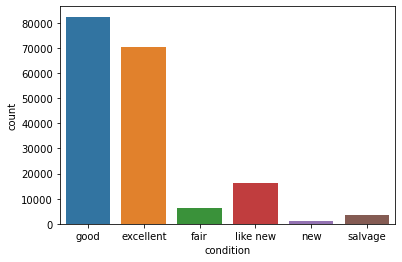

In [112]:
# countplot for types of conditions

sns.countplot(car.condition)
plt.show()

In [113]:
# Sort the dataframe on year and filling them as forward fill as we don't have any other specific information about the 
# Condition of the car.

car['condition']=car.sort_values(by='year')['condition'].ffill(axis=0)

In [114]:
car.condition.isnull().sum()

0

In [115]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


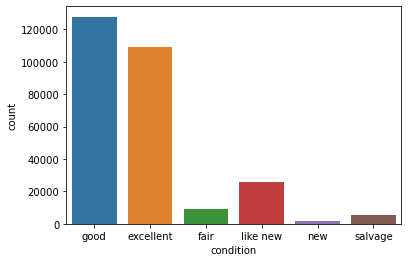

In [116]:
# countplot for types of conditions

sns.countplot(car.condition)
plt.show()

After imputing the null values of condition by forward fill we still have the same distribution of condition.

# 

#### 5. Fuel

In [117]:
car[car.fuel.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
225,https://bham.craigslist.org/ctd/d/gadsden-2011...,birmingham,20995,2011.0,chevrolet,silverado 1500 ltz crew cab 4wd,good,NaN,NaN,137701.0,NaN,automatic,3GCPKTE30BG264332,4wd,NaN,pickup,NaN,2011 Chevrolet Silverado 1500 LTZ Crew Cab 4WD...,al,2021-05-03 20:06:42+00:00
226,https://bham.craigslist.org/ctd/d/gadsden-2015...,birmingham,25995,2015.0,chevrolet,silverado 1500 lt crew cab 4wd,good,NaN,NaN,151681.0,NaN,automatic,3GCUKREC2FG257362,4wd,NaN,pickup,NaN,2015 Chevrolet Silverado 1500 LT Crew Cab 4WD ...,al,2021-05-03 20:05:09+00:00
227,https://bham.craigslist.org/ctd/d/gadsden-2014...,birmingham,31995,2014.0,chevrolet,silverado 1500 2lt crew cab long box 4wd,excellent,NaN,NaN,66738.0,NaN,automatic,3GCUKREC8EG123888,4wd,NaN,pickup,NaN,2014 Chevrolet Silverado 1500 2LT Crew Cab Lon...,al,2021-05-03 20:03:33+00:00


In [118]:
car.fuel.isnull().sum()

1567

In [119]:
import scipy.stats as stats

# Defining the mode function to take the mode values.

def mode_1(x):
    return stats.mode(x)[0]

In [120]:
# taking the mode value for every value. and filling the missing values according to the model.

df =car[car.fuel.notnull()].pivot_table(index=['model'],aggfunc={'fuel':mode_1}).reset_index()
df['fuel'] = df['fuel'].apply(lambda x: x[0])


# making the dictionary of model and fuel.
fuel_dict=dict(zip(df.model,df.fuel))


# filling the mode value according to the model in the fuel.
car['fuel']=np.where(car.fuel.isnull(),car.model.map(fuel_dict),car.fuel)

In [121]:
car.fuel.isnull().sum()

984

In [122]:
# taking the mode value for every value. and filling the missing values according to the manufacturer.

df =car[car.fuel.notnull()].pivot_table(index=['manufacturer'],aggfunc={'fuel':mode_1}).reset_index()
df['fuel'] = df['fuel'].apply(lambda x: x[0])


# making the dictionary of manufacturer and fuel.
fuel_dict=dict(zip(df.manufacturer,df.fuel))


# filling the mode value according to the model in the fuel.
car['fuel']=np.where(car.fuel.isnull(),car.manufacturer.map(fuel_dict),car.fuel)

In [123]:
car.fuel.isnull().sum()

1

In [124]:
car[car.fuel.isnull()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
5506,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,19995,1999.0,Western Star,Western Star Conventional,excellent,6 cylinders,NaN,123456.0,clean,manual,2WKEDDCJ5XK959166,rwd,NaN,other,custom,This Western Star Conventional can be yours t...,ak,2021-04-30 04:01:30+00:00


In [125]:
# Western star is a heavy truck and its fuel type is obivously diesel so we fill it with diesel.
car.fuel = np.where(car.fuel.isnull(),'diesel',car.fuel)

In [126]:
car.fuel.isnull().sum()

0

# 

#### 6. Odometer

In [127]:
car[car.odometer.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
541,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,18950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,2009 Jeep Wrangler Unlimited Sahara NO DEAL...,al,2021-04-27 22:45:11+00:00
772,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,14950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,silver,2007 Jeep Wrangler Unlimited NO DEALER FEES...,al,2021-04-23 17:45:58+00:00
1030,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,19950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,black,2008 Jeep Wrangler Unlimited X NO DEALER FE...,al,2021-04-19 18:30:15+00:00


In [128]:
car.odometer.describe()

count    2.780770e+05
mean     1.045384e+05
std      2.246309e+05
min      0.000000e+00
25%      4.160100e+04
50%      9.237500e+04
75%      1.400650e+05
max      1.000000e+07
Name: odometer, dtype: float64

* We have some 0 values in the odometer so we deal with 0 and null values.
* As we know the max range of odometer of car is 9,99,999. So we fill them as maximum.

In [129]:
# Filling the misleading values with maximum reading of the possible odometer value.

car.odometer=np.where(car.odometer>999999,999999,car.odometer)

In [130]:
car.odometer.describe()

count    278077.000000
mean      99922.790349
std       82973.997913
min           0.000000
25%       41601.000000
50%       92375.000000
75%      140065.000000
max      999999.000000
Name: odometer, dtype: float64

In [131]:
# Creating the dictionary of not null values in the odometer with the model.
odo_dict = car.loc[car.odometer.notnull()].groupby('model')['odometer'].mean().to_dict()


# Filling the null values with the above dictionary.
car.odometer=np.where(car.odometer.isnull(),car.model.map(odo_dict),car.odometer)


# Filling the 0 values with the above dictionary.
car.odometer=np.where(car.odometer==0,car.model.map(odo_dict),car.odometer)

In [132]:
car.odometer.describe()

count    279240.000000
mean     100097.978987
std       82746.912405
min           0.000000
25%       42000.000000
50%       92767.000000
75%      140000.000000
max      999999.000000
Name: odometer, dtype: float64

In [133]:
# Finding the median of the odometer values.
x = round(car.odometer.median(),2)


# Filling the null values with median.
car.odometer=np.where(car.odometer.isnull(),x,car.odometer)


# Filling the 0 values with the median values.
car.odometer=np.where(car.odometer==0,x,car.odometer)

In [134]:
car.odometer.describe()

count    279384.000000
mean     100161.936862
std       82681.733940
min           1.000000
25%       42045.000000
50%       92767.000000
75%      140000.000000
max      999999.000000
Name: odometer, dtype: float64

In [135]:
car[car.odometer<50].shape

(2528, 20)

There are some values less than 50 are present in odometer.

In [136]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 7.Transmission

In [137]:
car[car.transmission.isnull()].head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
2961,https://huntsville.craigslist.org/ctd/d/columb...,huntsville / decatur,14499,2016.0,nissan,murano,good,NaN,gas,124543.0,clean,NaN,5N1AZ2MHXGN164337,4wd,NaN,wagon,black,2016 Nissan Murano SV Offered by: AUTOVERS...,al,2021-04-26 16:44:03+00:00
5088,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,39995,2012.0,ford,f-550,excellent,NaN,gas,50740.0,clean,NaN,1FDUF5HY1CEB83922,4wd,NaN,other,red,2012 Ford F-550 Super Duty 4X4 2dr Regular Cab...,ak,2021-05-03 22:05:37+00:00
5250,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,8900,2006.0,lexus,gs,like new,6 cylinders,gas,147583.0,clean,NaN,JTHCH96SX60019262,NaN,NaN,sedan,silver,Bad Credit - No Credit... We Can Help! 907.280...,ak,2021-05-02 02:06:32+00:00
5284,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,24995,2006.0,ford,f-550,fair,NaN,diesel,112939.0,clean,NaN,1FDAX57P36ED52397,4wd,NaN,other,white,2006 Ford F-550 Super Duty 4X4 4dr SuperCab 16...,ak,2021-05-01 22:50:32+00:00
5384,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,28245,2005.0,chevrolet,corvette,good,8 cylinders,gas,26823.0,clean,NaN,1G1YY22UX55129650,NaN,NaN,other,silver,This Chevrolet Corvette can be yours today!If ...,ak,2021-05-01 03:03:27+00:00


In [138]:
car.transmission.isnull().sum()

1179

In [139]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.transmission.notnull()].pivot_table(index=['model'],aggfunc={'transmission':mode_1}).reset_index()
df['transmission'] = df['transmission'].apply(lambda x: x[0])


# making the dictionary of model and transmission.
trans_dict=dict(zip(df.model,df.transmission))


# filling the mode value according to the model in the transmission.
car['transmission']=np.where(car.transmission.isnull(),car.model.map(trans_dict),car.transmission)

In [140]:
car.transmission.isnull().sum()

73

In [141]:
# Now taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.transmission.notnull()].pivot_table(index=['manufacturer'],aggfunc={'transmission':mode_1}).reset_index()
df['transmission'] = df['transmission'].apply(lambda x: x[0])


# making the dictionary of manufacturer and transmission.
trans_dict=dict(zip(df.manufacturer,df.transmission))

# filling the mode value according to the manufacturer in the transmission.
car['transmission']=np.where(car.transmission.isnull(),car.manufacturer.map(trans_dict),car.transmission)

In [142]:
car.transmission.isnull().sum()

0

In [143]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 8. Type

In [144]:
car[car.type.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
37,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al,2021-05-03 12:38:05+00:00
96,https://auburn.craigslist.org/cto/d/valley-one...,auburn,80,2004.0,honda,unknown,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,al,2021-04-19 17:55:06+00:00
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,unknown,excellent,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00


In [145]:
car.type.isnull().sum()

64617

In [146]:
# taking the mode value for every Model. and filling the missing values according to the model.
df =car[car.type.notnull()].pivot_table(index=['model'],aggfunc={'type':mode_1}).reset_index()
df['type'] = df['type'].apply(lambda x: x[0])


# making the dictionary of model and type.
type_dict=dict(zip(df.model,df.type))


# filling the mode value according to the model in the type.
car['type']=np.where(car.type.isnull(),car.model.map(type_dict),car.type)

In [147]:
car.type.isnull().sum()

6769

In [148]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.type.notnull()].pivot_table(index=['manufacturer'],aggfunc={'type':mode_1}).reset_index()
df['type'] = df['type'].apply(lambda x: x[0])

# making the dictionary of manufacturer and type.
trans_dict=dict(zip(df.manufacturer,df.type))

# filling the mode value according to the manufacturer in the type.
car['type']=np.where(car.type.isnull(),car.manufacturer.map(trans_dict),car.type)

In [149]:
car.type.isnull().sum()

4

In [150]:
# filling the mode value according to the mode of type.
car['type']=np.where(car.type.isnull(),car.type.mode(),car.type)

In [151]:
car.type.isnull().sum()

0

In [152]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 9. Drive

In [153]:
car[car.drive.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [154]:
car.drive.isnull().sum()

81782

In [155]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.drive.notnull()].pivot_table(index=['model'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of model and drive.
drive_dict=dict(zip(df.model,df.drive))


# filling the mode value according to the model in the drive.
car['drive']=np.where(car.drive.isnull(),car.model.map(drive_dict),car.drive)

In [156]:
car.drive.isnull().sum()

14104

In [157]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.drive.notnull()].pivot_table(index=['manufacturer'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of manufacturer and drive.
trans_dict=dict(zip(df.manufacturer,df.drive))

# filling the mode value according to the manufacturer in the drive.
car['drive']=np.where(car.drive.isnull(),car.manufacturer.map(trans_dict),car.drive)

In [158]:
car.drive.isnull().sum()

32

In [159]:
# taking the mode value for every type. and filling the missing values according to the type.
df =car[car.drive.notnull()].pivot_table(index=['type'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of drive and type.
trans_dict=dict(zip(df.type,df.drive))


# filling the mode value according to the type in the drive.
car['drive']=np.where(car.drive.isnull(),car.type.map(trans_dict),car.drive)

In [160]:
car.drive.isnull().sum()

0

In [161]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 10. Size

In [162]:
car[car['size'].isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [163]:
car['size'].isnull().sum()

189881

In [164]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car['size'].notnull()].pivot_table(index=['model'],aggfunc={'size':mode_1}).reset_index()
df['size'] = df['size'].apply(lambda x: x[0])


# making the dictionary of model and size.
size_dict=dict(zip(df.model,df['size']))


# filling the mode value according to the model in the size.
car['size']=np.where(car['size'].isnull(),car.model.map(size_dict),car['size'])

In [165]:
car['size'].isnull().sum()

51115

In [166]:
# taking the mode value for every type. and filling the missing values according to the type.
df =car[car['size'].notnull()].pivot_table(index=['type'],aggfunc={'size':mode_1}).reset_index()
df['size'] = df['size'].apply(lambda x: x[0])


# making the dictionary of type and size.
size_dict=dict(zip(df.type,df['size']))

# filling the mode value according to the type in the size.
car['size']=np.where(car['size'].isnull(),car.type.map(size_dict),car['size'])

In [167]:
car['size'].isnull().sum()

0

In [168]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,full-size,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,full-size,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 11. Paint color

In [169]:
car[car.paint_color.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
37,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,mid-size,SUV,NaN,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al,2021-05-03 12:38:05+00:00
50,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,4wd,full-size,pickup,NaN,Carvana is the safer way to buy a car During t...,al,2021-04-30 15:11:00+00:00
52,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,31590,2020.0,mazda,mx-5 miata club,good,NaN,gas,2195.0,clean,other,JM1NDAC74L0413665,rwd,full-size,other,NaN,Carvana is the safer way to buy a car During t...,al,2021-04-29 23:11:10+00:00


In [170]:
car.paint_color.isnull().sum()

79731

In [171]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.paint_color.notnull()].pivot_table(index=['model'],aggfunc={'paint_color':mode_1}).reset_index()
df['paint_color'] = df['paint_color'].apply(lambda x: x[0])


# making the dictionary of model and paint color.
paint_dict=dict(zip(df.model,df.paint_color))


# filling the mode value according to the model in the paint color.
car['paint_color']=np.where(car.paint_color.isnull(),car.model.map(paint_dict),car.paint_color)

In [172]:
car.paint_color.isnull().sum()

9717

In [173]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.paint_color.notnull()].pivot_table(index=['manufacturer'],aggfunc={'paint_color':mode_1}).reset_index()
df['paint_color'] = df['paint_color'].apply(lambda x: x[0])


# making the dictionary of manufacturer and paint color.
paint_dict=dict(zip(df.manufacturer,df.paint_color))

# filling the mode value according to the manufacturer in the paint color.
car['paint_color']=np.where(car.paint_color.isnull(),car.manufacturer.map(paint_dict),car.paint_color)

In [174]:
car.paint_color.isnull().sum()

3

In [175]:
car[car.paint_color.isnull()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
56373,https://sandiego.craigslist.org/csd/cto/d/el-c...,san diego,5999,2005.0,NUMMI,Corolla,excellent,NaN,gas,89000.0,clean,automatic,1NXBR32EX5Z519187,fwd,mid-size,sedan,NaN,2005 Toyota Corolla Clean title 89 k mile Auto...,ca,2021-05-01 12:52:44+00:00
64634,https://stockton.craigslist.org/ctd/d/tracy-20...,stockton,5495,2005.0,NUMMI,Toytoa Corolla LE,good,NaN,gas,103400.0,clean,automatic,1NXBR32E95Z548471,fwd,mid-size,sedan,NaN,GREAT CONDITION VERY CLEAN CLEAN BODY CLEAN IN...,ca,2021-04-27 20:47:59+00:00
412072,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,8880,2018.0,Mitsubishi Thailand,bishi Mirage,good,3 cylinders,gas,54527.0,clean,automatic,ML32A3HJ4JH003929,fwd,mid-size,sedan,NaN,"2018 *Mitsubishi* *Mirage* ES CVT Sedan - $8,8...",wa,2021-04-05 15:30:59+00:00


In [176]:
# Filling the remaining the null values with the mode of paint color.

car.paint_color = np.where(car.paint_color.isnull(),car.paint_color.mode(),car.paint_color)

In [177]:
car.paint_color.isnull().sum()

0

# 

#### 12. Cylinders

In [178]:
car[car.fuel=='electric']['cylinders'].unique()

array([nan, '4 cylinders', 'other', '8 cylinders', '6 cylinders'],
      dtype=object)

From domain knowledge we know that electric cars don't have cylinders so the above values are misleading values. So we fill all these values as other.

In [179]:
car.cylinders=np.where(car.fuel=='electric','other',car.cylinders)

In [180]:
car.cylinders.isnull().sum()

104464

In [181]:
# Definig the function for fetching the cylinders from the description.

def cyl_draw(x):
    if type(x)!=float:   #------------ checking the description is null or not
        y = x.split(' ')  #-----------------split the description in words.
        for i in range(0,len(y)):   #------------- loop to check for every word.
            if y[i] in ['cylinder','Cylinder','cylinders','Cylinders','CYL']:  #----------------- checking the word in list.
                if len(y[i-1])>1:   #------------ check len of previous word is greater than 1. ex- V6, V8, V12.
                    if y[i-1][-1] in ['3','4','5','6','8']:  #-------
                        return (str(y[i-1][-1])+' cylinders') #---------return the cylinders.
                    elif y[i-1][-2:] in ['10','12']:
                        return (str(y[i-1][-2:])+' cylinders')
                    elif y[i-1] == 'other':  #-------- checking for other cylinders.
                        return (y[i-1])    # returning other
                    else:
                        return np.nan
                else:
                    if y[i-1] in ['3','4','5','6','8','10','12']:   #-------------checking the previous word in the list.
                        return (str(y[i-1])+' cylinders')   #----------- returning the cylinders.
                    elif y[i-1] in [',','.','other']:    #------------checking the previous word in list. ex- V6, CYL
                        if len(y[i-2])>1:   #-------------checking for len of 2nd previous word is greater than 1.
                            if y[i-2][-1] in ['3','4','5','6','8']:  #-------
                                return (str(y[i-2][-1])+' cylinders')  #-----------returning the cylinders.
                            elif y[i-1][-2:] in ['10','12']:
                                return (str(y[i-1][-2:])+' cylinders')
                            elif y[i-2] == 'other':   #--------- checking for other cylinders 
                                return (y[i-2])   #---------- returning the cyliners.
                            else:
                                return np.nan
                        else:
                            return np.nan
                    else:
                        return np.nan
        else:
            return np.nan
    else:
        return np.nan

In [182]:
# Fetching all the values and store them in a variable.
x = car['description'].apply(cyl_draw)


# Filling the missing values with the values we got.
car.cylinders = np.where(car.cylinders.isnull(),x,car.cylinders)

In [183]:
car.cylinders.isnull().sum()

98852

In [184]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.cylinders.notnull()].pivot_table(index=['model'],aggfunc={'cylinders':mode_1}).reset_index()
df['cylinders'] = df['cylinders'].apply(lambda x: x[0])


# making the dictionary of model and cylinders.
cyl_dict=dict(zip(df.model,df.cylinders))


# filling the mode value according to the model in the cylinders.
car['cylinders']=np.where(car.cylinders.isnull(),car.model.map(cyl_dict),car.cylinders)

In [185]:
car.cylinders.isnull().sum()

21447

In [186]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.cylinders.notnull()].pivot_table(index=['manufacturer'],aggfunc={'cylinders':mode_1}).reset_index()
df['cylinders'] = df['cylinders'].apply(lambda x: x[0])


# making the dictionary of manufacturer and cylinders.
cyl_dict=dict(zip(df.manufacturer,df.cylinders))


# filling the mode value according to the manufacturer in the cylinders.
car['cylinders']=np.where(car.cylinders.isnull(),car.manufacturer.map(cyl_dict),car.cylinders)

In [187]:
car.cylinders.isnull().sum()

28

In [188]:
# filling the remaining null values with the mode of the cylinders.

car.cylinders = np.where(car.cylinders.isnull(),car.cylinders.mode(),car.cylinders)

In [189]:
car.cylinders.isnull().sum()

0

Now we got the information from the VIN, title_status, url so we drop these columns.

In [190]:
# Dropping the columns that we dont need further.
car.drop(['title_status','VIN','description','url'],axis = 1, inplace = True)

In [191]:
# Checking the null values in the data set.
car.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

# 

# Feature Engineering

In [192]:
car.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,4wd,full-size,pickup,red,al,2021-05-04 15:41:31+00:00
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,al,2021-05-03 19:02:03+00:00


In [193]:
# Dividing the states in the zones.

state_zone = {'NORTHEAST': ['ct', 'me', 'ma', 'nh', 'ri', 'vt', 'pa', 'ny', 'nj'],
                     'SOUTH': ['ok', 'tx', 'ar','la', 'al', 'ms', 'tn', 'ky','ga', 'sc', 'nc', 'va','de', 'dc', 'md',
                              'wv', 'fl' , ''],
                     'MIDWEST': ['sd', 'ne', 'ks', 'mn', 'ia','mo', 'wi', 'il', 'in', 'mi', 'oh', 'nd'],
              
                     'WEST': ['ak', 'az', 'ca', 'co', 'hi', 'id', 'mt', 'nv', 'nm', 'or', 'ut', 'wa', 'wy']}

In [194]:
def states_to_zone(x): 
    for i,k in state_zone.items():  # ------- accessing the items in the dictionary items.
        for m in k:     # --------------- iterating through the states.
            if x==m:  #----------------checking the the state is matches with which list state.
                return i  #------------------- returning the key value (i.e. zone) 

# making new column state zone by applying above function.
car['State_Zone']=car.state.apply(states_to_zone)

In [195]:
# Statistical test for state zone.
model = sfa.ols('price~State_Zone',car).fit()
print(anova_lm(model))

                  df        sum_sq       mean_sq         F    PR(>F)
State_Zone       3.0  4.358157e+14  1.452719e+14  0.640661  0.588757
Residual    279380.0  6.335026e+19  2.267530e+14       NaN       NaN


Here p value > alpha. But from domain knowledge we take this feature because state has an effect on price

In [196]:
# Age of car

car['age'] = car.posting_date.dt.year - car.year

In [197]:
# Statistical test for age.
levene(car.age, car.price)

LeveneResult(statistic=12.058128181453757, pvalue=0.000515709412523519)

Here p value < alpha. So Age has an effect on price.

In [198]:
def vintage(x):    # ---------------- function to define car is vintage/antique/classic or modern according to the age.
    if x <1930:  # -----------car manufactured before 1930 then it is vintage.
        return ('vintage')
    elif x < 1977:   # -----------if it manufactured between 1930 and 1977 then its antique.
        return ('antique')
    elif x <2002:  # --------------- if it manufactured between 1977 and 2002 then it is classic.
        return ('classic')
    else:   #---------------- if it manufactured  after 2002 then it is modern.
        return('modern')
    
car['vint_car']=car.year.apply(vintage)

In [199]:
# Statistical test for vint_car.
model = sfa.ols('price~vint_car',car).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
vint_car       3.0  5.943332e+15  1.981111e+15  8.737626  0.000009
Residual  279380.0  6.334475e+19  2.267333e+14       NaN       NaN


Here p value < alpha. So vint_car has an effect on price.

In [200]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00,SOUTH,7.0,modern
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00,SOUTH,11.0,modern
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00,SOUTH,1.0,modern


In [201]:
# state have tax or not.

tax_list = ['ak','or','mt','de','nh']  # List of states where no tax.

def tax(x):  
    if x in tax_list:   #---------- if state in the tax list then return 1.
        return 0
    else: 
        return 1
    
car['is_tax']= car.state.apply(tax)

In [202]:
# statistical test for is_tax.

zero = car.loc[car.is_tax==0,'price']
one = car.loc[car.is_tax==1,'price']
print('levene',levene(zero,one))
print('t-test',stats.ttest_ind(zero, one))

levene LeveneResult(statistic=6.751426574556424, pvalue=0.009367767601209704)
t-test Ttest_indResult(statistic=2.5908273449063817, pvalue=0.009575048853021137)


Here p value < alpha. So is_tax has an effect on the price.

In [203]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car,is_tax
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00,SOUTH,7.0,modern,1
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00,SOUTH,11.0,modern,1
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00,SOUTH,1.0,modern,1


# 

In [204]:
# paint binning

car.paint_color.value_counts()

white     82471
black     63627
silver    42373
blue      26774
red       24107
grey      20094
green      5981
custom     5242
brown      5048
yellow     1673
orange     1422
purple      572
Name: paint_color, dtype: int64

In [205]:
# paint color  with high frequency.

paint_bin_list = ['white','black','silver','blue','red','grey']   

def paint_bin(x):
    if x in paint_bin_list:  # if paint color in the above list then it return the same else other.
        return x
    else:
        return ('other')

In [206]:
car.paint_color = car.paint_color.apply(paint_bin)

# 

### Statistical tests of predictors vs target variable.

In [207]:
# 1. year

# HYPOTHESIS :-
# Ho: That the Samples have Equal Variance
# Ha: That the Samples DONT have Equal Variance
    
# Levene's Test (To check the variance)
statistic, p_value = levene(car.year, car.price, center='mean')

print('Levene test statistic:', statistic)
print('p-value:', p_value)

Levene test statistic: 38.18407243627024
p-value: 6.441993880619696e-10


* Here our pvalue < alpha so, we reject our Ho.
* Hence we can say that our feature year does'nt have equal variance.
* Here our Ho is rejected so we can't apply t-test, hence we will be applying 'Man_whiteny U test'

In [208]:
# Apply Mann-Whitney U test

# HYPOTHESIS:
# H0 : feature year has no effect on price
# Ha : feature year has effect on price
    
statistic, p_value = mannwhitneyu(car.price, car.year, alternative='two-sided')

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 73736939593.5
p-value: 0.0


  * Here our pvalue < alpha so, we reject our Ho.
  * Hence we can say that our feautre year has effect on price.  

In [209]:
# 2. odometer

# HYPOTHESIS :-
# Ho: That the Samples have Equal Variance
# Ha: That the Samples DONT have Equal Variance

# Levene's Test (To check the variance)
statistic, p_value = levene(car.odometer, car.price, center='mean')

print('Levene test statistic:', statistic)
print('p-value:', p_value)

Levene test statistic: 17.750986898692087
p-value: 2.5182626575168832e-05


* Here our pvalue < alpha so, we reject our Ho.
* Hence we can say that our feature odometer does'nt have equal variance.
* Here our Ho is reject so we can't apply t-test, hence we will be applying 'Man_whiteny U test'


In [210]:
# Apply Mann-Whitney U test

# HYPOTHESIS:
#  H0 : feature odometer has no effect on price
#  Ha : feature odometer has effect on price

statistic, p_value = mannwhitneyu(car.price, car.odometer, alternative='two-sided')

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 8312420657.5
p-value: 0.0


  * Here our pvalue < alpha so, we reject our Ho.
  * Hence we can say that our feautre odometer has effect on price.  

In [211]:
cols = ['region','manufacturer', 'condition','cylinders', 'fuel','transmission', 'drive', 'size','type',
        'paint_color', 'state']


#  HYPOTHESIS :-
#   H0 : Predictor has no effect on price
#   Ha : Predictor has effect on price


for i in cols:
    model = sfa.ols('price~{}'.format(i),car).fit()
    print(i,':\n',anova_lm(model),'\n\n')

region :
                 df        sum_sq       mean_sq         F  PR(>F)
region       403.0  6.087992e+16  1.510668e+14  0.665899     1.0
Residual  278980.0  6.328981e+19  2.268615e+14       NaN     NaN 


manufacturer :
                     df        sum_sq       mean_sq         F  PR(>F)
manufacturer     143.0  7.219215e+15  5.048402e+13  0.222551     1.0
Residual      279240.0  6.334347e+19  2.268424e+14       NaN     NaN 


condition :
                  df        sum_sq       mean_sq         F    PR(>F)
condition       5.0  8.027188e+15  1.605438e+15  7.080913  0.000001
Residual   279378.0  6.334266e+19  2.267275e+14       NaN       NaN 


cylinders :
                  df        sum_sq       mean_sq         F    PR(>F)
cylinders       7.0  1.672763e+15  2.389661e+14  1.053866  0.390706
Residual   279376.0  6.334902e+19  2.267518e+14       NaN       NaN 


fuel :
                 df        sum_sq       mean_sq         F    PR(>F)
fuel           4.0  1.330191e+14  3.325477e+13  0.1

* Features have p value > alpha. So Region, manufacturer , cylinders, fuel, transmission, drive, size, type, paint color have no effect on the target variable.
* Features have p value < alpha. So condition, state have an effect on the target variable.

# 

## Encoding

#### Label Encoding

In [212]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# region
car['region']=le.fit_transform(car['region'])

# manufacturer
car['manufacturer']=le.fit_transform(car['manufacturer'])

# type
car['type']=le.fit_transform(car['type'])

# paint_color
car['paint_color']=le.fit_transform(car['paint_color'])

# state
car['state']=le.fit_transform(car['state'])

# state_zone
car['State_Zone']=le.fit_transform(car['State_Zone'])

#### Ordinal Encoding

In [213]:
# Cylinders

car['cylinders'].replace({'other':0,'3 cylinders':3, '4 cylinders':4, '5 cylinders':5, '6 cylinders':6
                           , '8 cylinders':8, '10 cylinders':10, '12 cylinders':12},inplace = True)

In [214]:
# Condition

car.condition.replace({'salvage':0,'fair':1,'good':2,'excellent':3,'like new':4,'new':5},inplace = True)

In [215]:
# Size

car['size'].replace({'sub-compact':0,'compact':1,'mid-size':2,'full-size':3},inplace = True)

#### Target Encoding

In [216]:
car.model = car.groupby('model')['price'].transform('mean')

In [217]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car,is_tax
27,16,33590,2014.0,115,36471.632653,2,8,gas,57923.0,other,4wd,3,8,6,1,2021-05-04 17:31:18+00:00,2,7.0,modern,1
28,16,22590,2010.0,108,22197.093565,2,8,gas,71229.0,other,4wd,3,8,1,1,2021-05-04 17:31:08+00:00,2,11.0,modern,1
29,16,39590,2020.0,108,35221.088106,2,8,gas,19160.0,other,4wd,3,8,4,1,2021-05-04 17:31:25+00:00,2,1.0,modern,1


#### One hot encoding

In [218]:
car_dum = pd.get_dummies(car)

In [219]:
car_dum.head(3)

,region,price,year,manufacturer,model,condition,cylinders,odometer,size,type,paint_color,state,posting_date,State_Zone,age,is_tax,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,vint_car_antique,vint_car_classic,vint_car_modern,vint_car_vintage
27,16,33590,2014.0,115,36471.632653,2,8,57923.0,3,8,6,1,2021-05-04 17:31:18+00:00,2,7.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
28,16,22590,2010.0,108,22197.093565,2,8,71229.0,3,8,1,1,2021-05-04 17:31:08+00:00,2,11.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
29,16,39590,2020.0,108,35221.088106,2,8,19160.0,3,8,4,1,2021-05-04 17:31:25+00:00,2,1.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [220]:
# Dropping the columns after binning.

car_dum.drop(['posting_date'],axis = 1,inplace = True)

In [221]:
car_dum.head(3)

,region,price,year,manufacturer,model,condition,cylinders,odometer,size,type,paint_color,state,State_Zone,age,is_tax,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,vint_car_antique,vint_car_classic,vint_car_modern,vint_car_vintage
27,16,33590,2014.0,115,36471.632653,2,8,57923.0,3,8,6,1,2,7.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
28,16,22590,2010.0,108,22197.093565,2,8,71229.0,3,8,1,1,2,11.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
29,16,39590,2020.0,108,35221.088106,2,8,19160.0,3,8,4,1,2,1.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0


# 

# 

# Modeling

In [222]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [223]:
cols=['Model Name','Train R2 Score','Test R2 Score','Train RMSE','Test RMSE','MAPE']

result=pd.DataFrame(columns=cols)

### Without outlier model

In [224]:
# Removing the outliers (as we already see above in the file.)
car_wo = car_dum.loc[car_dum.price<57000]

In [225]:
x = car_wo.drop('price',axis =1)
y = car_wo.price

In [226]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .30, random_state = 42)

# Checking the shape or train and test data.
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((191600, 29), (82115, 29), (191600,), (82115,))

#### Correlation with Target

In [227]:
pd.DataFrame(car_wo.corr().iloc[1,:])

,price
region,-0.072851
price,1.000000
year,0.344641
manufacturer,-0.078222
model,-0.004239
condition,0.028708
cylinders,0.244160
odometer,-0.412041
size,0.184555
type,0.035677


### Decision Tree

In [229]:
dt=DecisionTreeRegressor(random_state = 42)


# Model fitting
model_dt = dt.fit(xtrain,ytrain)


# Model prediction
pred_test = model_dt.predict(xtest)
pred_train = model_dt.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [230]:
mlrmodel=pd.Series({'Model Name':'Decision Tree','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.5272,40.538615


### Ridge

In [231]:
ridge=Ridge()

# Model fitting
model_ridge = ridge.fit(xtrain,ytrain)


# Model prediction
pred_test = model_ridge.predict(xtest)
pred_train = model_ridge.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [232]:
mlrmodel=pd.Series({'Model Name':'Ridge','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941


# 

### Lasso

In [233]:
lasso = Lasso()


# Model fitting
model_lasso = lasso.fit(xtrain,ytrain)


# Model prediction
pred_test = model_lasso.predict(xtest)
pred_train = model_lasso.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [234]:
mlrmodel=pd.Series({'Model Name':'Lasso','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329


# 

### Elastic Net

In [235]:
en = ElasticNet()


# Model fitting
model_en = en.fit(xtrain,ytrain)


# Model prediction
pred_test = model_en.predict(xtest)
pred_train = model_en.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [236]:
mlrmodel=pd.Series({'Model Name':'Elastic Net','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979


# 

### Random Forest

In [237]:
rf = RandomForestRegressor(random_state=0)


# Model fitting
model_rf = rf.fit(xtrain,ytrain)


# Model prediction
pred_test = model_rf.predict(xtest)
pred_train = model_rf.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [238]:
mlrmodel=pd.Series({'Model Name':'Random Forest','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481


# 

### AdaBoost Regressor

In [239]:
ada = AdaBoostRegressor(random_state=0)


# Model fitting
model_ada = ada.fit(xtrain,ytrain)


# Model prediction
pred_test = model_ada.predict(xtest)
pred_train = model_ada.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [240]:
mlrmodel=pd.Series({'Model Name':'AdaBoost','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481
5,AdaBoost,0.635130,0.635568,7508.906508,7468.054537,60.193155


# 

### Gradient Boosting Regressor

In [241]:
gbm = GradientBoostingRegressor(random_state=0)


# Model fitting
model_gbm = gbm.fit(xtrain,ytrain)


# Model prediction
pred_test = model_gbm.predict(xtest)
pred_train = model_gbm.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [242]:
mlrmodel=pd.Series({'Model Name':'Gradient Boost','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481
5,AdaBoost,0.635130,0.635568,7508.906508,7468.054537,60.193155
6,Gradient Boost,0.781405,0.783581,5812.027572,5755.016932,50.773069


# 

### XGBoost Regressor

In [243]:
xgb = XGBRegressor()


# Model fitting
model_xgb = xgb.fit(xtrain,ytrain)


# Model prediction
pred_test = model_xgb.predict(xtest)
pred_train = model_xgb.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

In [244]:
mlrmodel=pd.Series({'Model Name':'XGBoost','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481
5,AdaBoost,0.635130,0.635568,7508.906508,7468.054537,60.193155
6,Gradient Boost,0.781405,0.783581,5812.027572,5755.016932,50.773069
7,XGBoost,0.856421,0.837678,4710.345448,4984.118219,42.128192


# 

### CatBoost Regressor

In [245]:
cat = CatBoostRegressor(random_state=0)


# Model fitting
model_cat = cat.fit(xtrain,ytrain)


# Model prediction
pred_test = model_cat.predict(xtest)
pred_train = model_cat.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

Learning rate set to 0.093929
0:	learn: 11682.8963883	total: 190ms	remaining: 3m 9s
1:	learn: 11036.3897352	total: 222ms	remaining: 1m 50s
2:	learn: 10476.9511841	total: 252ms	remaining: 1m 23s
3:	learn: 9951.7067124	total: 272ms	remaining: 1m 7s
4:	learn: 9490.7589786	total: 290ms	remaining: 57.7s
5:	learn: 9084.4737861	total: 308ms	remaining: 50.9s
6:	learn: 8724.4139107	total: 324ms	remaining: 45.9s
7:	learn: 8407.7440319	total: 341ms	remaining: 42.3s
8:	learn: 8126.7329321	total: 358ms	remaining: 39.4s
9:	learn: 7882.8545284	total: 374ms	remaining: 37s
10:	learn: 7671.9294181	total: 390ms	remaining: 35s
11:	learn: 7482.6745785	total: 410ms	remaining: 33.8s
12:	learn: 7316.7353176	total: 429ms	remaining: 32.6s
13:	learn: 7172.0043018	total: 448ms	remaining: 31.5s
14:	learn: 7044.1360965	total: 469ms	remaining: 30.8s
15:	learn: 6933.1468750	total: 486ms	remaining: 29.9s
16:	learn: 6833.0307833	total: 506ms	remaining: 29.2s
17:	learn: 6748.2866862	total: 522ms	remaining: 28.5s
18:	lea

152:	learn: 5481.8053274	total: 2.88s	remaining: 16s
153:	learn: 5479.0618823	total: 2.91s	remaining: 16s
154:	learn: 5475.9227431	total: 2.93s	remaining: 16s
155:	learn: 5474.2811584	total: 2.94s	remaining: 15.9s
156:	learn: 5471.3011073	total: 2.96s	remaining: 15.9s
157:	learn: 5469.1574970	total: 2.97s	remaining: 15.9s
158:	learn: 5466.9795542	total: 2.99s	remaining: 15.8s
159:	learn: 5464.8322213	total: 3s	remaining: 15.8s
160:	learn: 5463.0054531	total: 3.02s	remaining: 15.8s
161:	learn: 5460.2506209	total: 3.04s	remaining: 15.7s
162:	learn: 5457.9141845	total: 3.06s	remaining: 15.7s
163:	learn: 5454.9364886	total: 3.08s	remaining: 15.7s
164:	learn: 5452.7234003	total: 3.1s	remaining: 15.7s
165:	learn: 5449.2555355	total: 3.12s	remaining: 15.7s
166:	learn: 5447.6089204	total: 3.14s	remaining: 15.6s
167:	learn: 5445.6529372	total: 3.15s	remaining: 15.6s
168:	learn: 5443.7199206	total: 3.17s	remaining: 15.6s
169:	learn: 5441.2711606	total: 3.19s	remaining: 15.6s
170:	learn: 5439.126

310:	learn: 5221.9248948	total: 6.09s	remaining: 13.5s
311:	learn: 5220.6139269	total: 6.12s	remaining: 13.5s
312:	learn: 5219.5926068	total: 6.14s	remaining: 13.5s
313:	learn: 5218.7902759	total: 6.17s	remaining: 13.5s
314:	learn: 5218.2058079	total: 6.19s	remaining: 13.5s
315:	learn: 5216.8381216	total: 6.21s	remaining: 13.4s
316:	learn: 5215.3138419	total: 6.22s	remaining: 13.4s
317:	learn: 5214.2222187	total: 6.24s	remaining: 13.4s
318:	learn: 5213.4452278	total: 6.26s	remaining: 13.4s
319:	learn: 5212.4454029	total: 6.28s	remaining: 13.3s
320:	learn: 5211.7755064	total: 6.31s	remaining: 13.4s
321:	learn: 5210.8649528	total: 6.33s	remaining: 13.3s
322:	learn: 5208.7891376	total: 6.35s	remaining: 13.3s
323:	learn: 5208.1494279	total: 6.37s	remaining: 13.3s
324:	learn: 5207.2193964	total: 6.39s	remaining: 13.3s
325:	learn: 5206.2790402	total: 6.41s	remaining: 13.3s
326:	learn: 5205.6037537	total: 6.43s	remaining: 13.2s
327:	learn: 5204.0951041	total: 6.45s	remaining: 13.2s
328:	learn

466:	learn: 5079.5509768	total: 9.85s	remaining: 11.2s
467:	learn: 5078.9886199	total: 9.88s	remaining: 11.2s
468:	learn: 5077.7971620	total: 9.9s	remaining: 11.2s
469:	learn: 5076.7598830	total: 9.93s	remaining: 11.2s
470:	learn: 5076.0914402	total: 9.94s	remaining: 11.2s
471:	learn: 5075.5621536	total: 9.96s	remaining: 11.1s
472:	learn: 5074.7317401	total: 9.98s	remaining: 11.1s
473:	learn: 5073.8549184	total: 9.99s	remaining: 11.1s
474:	learn: 5073.2626798	total: 10s	remaining: 11.1s
475:	learn: 5072.4928729	total: 10s	remaining: 11s
476:	learn: 5071.8283199	total: 10s	remaining: 11s
477:	learn: 5071.2644607	total: 10.1s	remaining: 11s
478:	learn: 5070.9900197	total: 10.1s	remaining: 11s
479:	learn: 5069.6595061	total: 10.1s	remaining: 10.9s
480:	learn: 5069.3061053	total: 10.1s	remaining: 10.9s
481:	learn: 5068.6650453	total: 10.1s	remaining: 10.9s
482:	learn: 5067.8718354	total: 10.2s	remaining: 10.9s
483:	learn: 5067.1404230	total: 10.2s	remaining: 10.8s
484:	learn: 5065.2901188	

623:	learn: 4974.2269351	total: 13.3s	remaining: 8.04s
624:	learn: 4973.9952632	total: 13.4s	remaining: 8.02s
625:	learn: 4973.3827987	total: 13.4s	remaining: 8s
626:	learn: 4973.0832099	total: 13.4s	remaining: 7.97s
627:	learn: 4972.7178345	total: 13.4s	remaining: 7.95s
628:	learn: 4971.9640413	total: 13.4s	remaining: 7.92s
629:	learn: 4971.5557456	total: 13.5s	remaining: 7.9s
630:	learn: 4971.1632978	total: 13.5s	remaining: 7.88s
631:	learn: 4970.2720915	total: 13.5s	remaining: 7.85s
632:	learn: 4969.6586852	total: 13.5s	remaining: 7.83s
633:	learn: 4968.8908335	total: 13.5s	remaining: 7.8s
634:	learn: 4968.1419359	total: 13.5s	remaining: 7.79s
635:	learn: 4967.8630169	total: 13.6s	remaining: 7.77s
636:	learn: 4966.9274194	total: 13.6s	remaining: 7.75s
637:	learn: 4966.3627027	total: 13.6s	remaining: 7.73s
638:	learn: 4966.1138479	total: 13.6s	remaining: 7.71s
639:	learn: 4965.0927924	total: 13.7s	remaining: 7.69s
640:	learn: 4964.4659772	total: 13.7s	remaining: 7.67s
641:	learn: 496

782:	learn: 4885.3505919	total: 17.3s	remaining: 4.79s
783:	learn: 4884.9078767	total: 17.3s	remaining: 4.77s
784:	learn: 4884.3935637	total: 17.3s	remaining: 4.75s
785:	learn: 4883.9038747	total: 17.4s	remaining: 4.72s
786:	learn: 4883.2806779	total: 17.4s	remaining: 4.7s
787:	learn: 4882.7340550	total: 17.4s	remaining: 4.68s
788:	learn: 4882.3197404	total: 17.4s	remaining: 4.66s
789:	learn: 4881.9367188	total: 17.4s	remaining: 4.63s
790:	learn: 4881.4942414	total: 17.4s	remaining: 4.61s
791:	learn: 4880.8146173	total: 17.5s	remaining: 4.59s
792:	learn: 4880.0170653	total: 17.5s	remaining: 4.56s
793:	learn: 4879.5126662	total: 17.5s	remaining: 4.55s
794:	learn: 4879.0829545	total: 17.6s	remaining: 4.53s
795:	learn: 4878.8014617	total: 17.6s	remaining: 4.5s
796:	learn: 4878.3981382	total: 17.6s	remaining: 4.48s
797:	learn: 4877.9728031	total: 17.6s	remaining: 4.45s
798:	learn: 4877.6570510	total: 17.6s	remaining: 4.43s
799:	learn: 4877.2394549	total: 17.6s	remaining: 4.41s
800:	learn: 

932:	learn: 4818.2732834	total: 21.3s	remaining: 1.53s
933:	learn: 4817.6872121	total: 21.4s	remaining: 1.51s
934:	learn: 4817.3357423	total: 21.4s	remaining: 1.49s
935:	learn: 4817.0605659	total: 21.4s	remaining: 1.47s
936:	learn: 4816.4044704	total: 21.5s	remaining: 1.44s
937:	learn: 4816.1415310	total: 21.5s	remaining: 1.42s
938:	learn: 4815.4783910	total: 21.5s	remaining: 1.4s
939:	learn: 4815.0949116	total: 21.6s	remaining: 1.38s
940:	learn: 4814.6272798	total: 21.6s	remaining: 1.35s
941:	learn: 4814.3980354	total: 21.6s	remaining: 1.33s
942:	learn: 4814.1371102	total: 21.7s	remaining: 1.31s
943:	learn: 4813.5310940	total: 21.7s	remaining: 1.29s
944:	learn: 4813.3200831	total: 21.7s	remaining: 1.26s
945:	learn: 4812.9461524	total: 21.8s	remaining: 1.24s
946:	learn: 4812.5625437	total: 21.8s	remaining: 1.22s
947:	learn: 4812.1680175	total: 21.8s	remaining: 1.2s
948:	learn: 4811.8046184	total: 21.9s	remaining: 1.17s
949:	learn: 4811.2902050	total: 21.9s	remaining: 1.15s
950:	learn: 

In [246]:
mlrmodel=pd.Series({'Model Name':'CatBoost','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481
5,AdaBoost,0.635130,0.635568,7508.906508,7468.054537,60.193155
6,Gradient Boost,0.781405,0.783581,5812.027572,5755.016932,50.773069
7,XGBoost,0.856421,0.837678,4710.345448,4984.118219,42.128192
8,CatBoost,0.851534,0.841018,4789.844196,4932.564387,42.989694


# 

##### Parameter tuning for Catboost regressor

In [257]:
param_grid = {'learning_rate': [0.09,0.1,0.2,0.3,0.4,0.5]}


grid= GridSearchCV(estimator=cat, param_grid=param_grid, scoring='neg_mean_squared_error' ,cv=3)
grid.fit(xtrain,ytrain)

0:	learn: 11702.7367149	total: 70.9ms	remaining: 1m 10s
1:	learn: 11069.5037318	total: 125ms	remaining: 1m 2s
2:	learn: 10511.4059902	total: 164ms	remaining: 54.6s
3:	learn: 10015.1564525	total: 205ms	remaining: 51s
4:	learn: 9572.1462845	total: 250ms	remaining: 49.7s
5:	learn: 9173.0226688	total: 293ms	remaining: 48.6s
6:	learn: 8824.8703635	total: 329ms	remaining: 46.6s
7:	learn: 8498.9950641	total: 367ms	remaining: 45.4s
8:	learn: 8219.7439487	total: 406ms	remaining: 44.7s
9:	learn: 7978.0633731	total: 443ms	remaining: 43.9s
10:	learn: 7765.4120573	total: 478ms	remaining: 43s
11:	learn: 7575.7965336	total: 518ms	remaining: 42.6s
12:	learn: 7405.5168053	total: 553ms	remaining: 42s
13:	learn: 7251.9806461	total: 591ms	remaining: 41.6s
14:	learn: 7121.7148239	total: 627ms	remaining: 41.2s
15:	learn: 7004.9153051	total: 663ms	remaining: 40.8s
16:	learn: 6902.8845268	total: 702ms	remaining: 40.6s
17:	learn: 6812.9868786	total: 743ms	remaining: 40.5s
18:	learn: 6727.4267607	total: 775ms	r

152:	learn: 5473.4554324	total: 5.21s	remaining: 28.8s
153:	learn: 5470.6565364	total: 5.24s	remaining: 28.8s
154:	learn: 5469.0885470	total: 5.27s	remaining: 28.7s
155:	learn: 5466.9246034	total: 5.3s	remaining: 28.7s
156:	learn: 5465.0008728	total: 5.33s	remaining: 28.6s
157:	learn: 5462.4493136	total: 5.36s	remaining: 28.6s
158:	learn: 5458.5082214	total: 5.4s	remaining: 28.6s
159:	learn: 5456.9660707	total: 5.43s	remaining: 28.5s
160:	learn: 5454.4359007	total: 5.46s	remaining: 28.5s
161:	learn: 5450.3894068	total: 5.5s	remaining: 28.4s
162:	learn: 5448.0381276	total: 5.53s	remaining: 28.4s
163:	learn: 5445.5999271	total: 5.56s	remaining: 28.4s
164:	learn: 5442.7754634	total: 5.59s	remaining: 28.3s
165:	learn: 5441.3601168	total: 5.63s	remaining: 28.3s
166:	learn: 5438.4045983	total: 5.66s	remaining: 28.2s
167:	learn: 5436.8197994	total: 5.69s	remaining: 28.2s
168:	learn: 5434.1553051	total: 5.73s	remaining: 28.2s
169:	learn: 5431.6597032	total: 5.76s	remaining: 28.1s
170:	learn: 5

303:	learn: 5203.6617292	total: 10.3s	remaining: 23.5s
304:	learn: 5202.4873753	total: 10.3s	remaining: 23.5s
305:	learn: 5201.4166309	total: 10.3s	remaining: 23.4s
306:	learn: 5200.0041719	total: 10.4s	remaining: 23.4s
307:	learn: 5198.3546747	total: 10.4s	remaining: 23.4s
308:	learn: 5197.5581800	total: 10.4s	remaining: 23.3s
309:	learn: 5196.6221879	total: 10.5s	remaining: 23.3s
310:	learn: 5195.2765977	total: 10.5s	remaining: 23.3s
311:	learn: 5194.5980382	total: 10.5s	remaining: 23.2s
312:	learn: 5193.6988393	total: 10.6s	remaining: 23.2s
313:	learn: 5191.8348682	total: 10.6s	remaining: 23.2s
314:	learn: 5190.6605324	total: 10.6s	remaining: 23.1s
315:	learn: 5189.5570959	total: 10.7s	remaining: 23.1s
316:	learn: 5187.1584865	total: 10.7s	remaining: 23.1s
317:	learn: 5186.1611926	total: 10.7s	remaining: 23s
318:	learn: 5184.9472813	total: 10.8s	remaining: 23s
319:	learn: 5182.9805706	total: 10.8s	remaining: 23s
320:	learn: 5181.4100310	total: 10.8s	remaining: 23s
321:	learn: 5180.3

457:	learn: 5045.0155742	total: 15.7s	remaining: 18.5s
458:	learn: 5044.0051396	total: 15.7s	remaining: 18.5s
459:	learn: 5042.8470554	total: 15.7s	remaining: 18.5s
460:	learn: 5041.4775029	total: 15.8s	remaining: 18.5s
461:	learn: 5040.7631707	total: 15.8s	remaining: 18.4s
462:	learn: 5039.8783799	total: 15.9s	remaining: 18.4s
463:	learn: 5039.1729568	total: 15.9s	remaining: 18.4s
464:	learn: 5038.0384389	total: 15.9s	remaining: 18.3s
465:	learn: 5037.3511709	total: 16s	remaining: 18.3s
466:	learn: 5036.4836665	total: 16s	remaining: 18.3s
467:	learn: 5035.6131881	total: 16s	remaining: 18.2s
468:	learn: 5034.9668862	total: 16.1s	remaining: 18.2s
469:	learn: 5033.8509415	total: 16.1s	remaining: 18.2s
470:	learn: 5032.9683302	total: 16.1s	remaining: 18.1s
471:	learn: 5032.0259629	total: 16.2s	remaining: 18.1s
472:	learn: 5031.4832562	total: 16.2s	remaining: 18.1s
473:	learn: 5030.3226991	total: 16.2s	remaining: 18s
474:	learn: 5029.5537489	total: 16.3s	remaining: 18s
475:	learn: 5029.183

611:	learn: 4935.3063910	total: 21s	remaining: 13.3s
612:	learn: 4934.5921234	total: 21s	remaining: 13.3s
613:	learn: 4934.0116109	total: 21s	remaining: 13.2s
614:	learn: 4933.2844796	total: 21.1s	remaining: 13.2s
615:	learn: 4932.7411103	total: 21.1s	remaining: 13.2s
616:	learn: 4931.9937503	total: 21.1s	remaining: 13.1s
617:	learn: 4931.2952576	total: 21.2s	remaining: 13.1s
618:	learn: 4930.4228114	total: 21.2s	remaining: 13.1s
619:	learn: 4929.7186573	total: 21.2s	remaining: 13s
620:	learn: 4929.0214395	total: 21.3s	remaining: 13s
621:	learn: 4928.6222998	total: 21.3s	remaining: 13s
622:	learn: 4927.9300938	total: 21.3s	remaining: 12.9s
623:	learn: 4927.2652421	total: 21.4s	remaining: 12.9s
624:	learn: 4926.8987048	total: 21.4s	remaining: 12.8s
625:	learn: 4926.0624982	total: 21.5s	remaining: 12.8s
626:	learn: 4925.4380726	total: 21.5s	remaining: 12.8s
627:	learn: 4925.0345006	total: 21.5s	remaining: 12.7s
628:	learn: 4924.0629570	total: 21.6s	remaining: 12.7s
629:	learn: 4923.04721

762:	learn: 4844.8270390	total: 26.2s	remaining: 8.14s
763:	learn: 4843.9441155	total: 26.3s	remaining: 8.11s
764:	learn: 4843.0917501	total: 26.3s	remaining: 8.07s
765:	learn: 4841.9235182	total: 26.3s	remaining: 8.04s
766:	learn: 4841.5714572	total: 26.4s	remaining: 8.01s
767:	learn: 4840.9533188	total: 26.4s	remaining: 7.97s
768:	learn: 4840.4174231	total: 26.4s	remaining: 7.94s
769:	learn: 4840.1037915	total: 26.5s	remaining: 7.9s
770:	learn: 4839.6003635	total: 26.5s	remaining: 7.87s
771:	learn: 4838.8978079	total: 26.5s	remaining: 7.83s
772:	learn: 4838.3174572	total: 26.6s	remaining: 7.8s
773:	learn: 4837.8499794	total: 26.6s	remaining: 7.76s
774:	learn: 4837.1677672	total: 26.6s	remaining: 7.73s
775:	learn: 4836.7407852	total: 26.7s	remaining: 7.7s
776:	learn: 4836.1221526	total: 26.7s	remaining: 7.66s
777:	learn: 4835.8395623	total: 26.7s	remaining: 7.63s
778:	learn: 4835.4806182	total: 26.8s	remaining: 7.59s
779:	learn: 4835.0859416	total: 26.8s	remaining: 7.56s
780:	learn: 4

915:	learn: 4769.3335286	total: 31.3s	remaining: 2.87s
916:	learn: 4768.7301736	total: 31.3s	remaining: 2.83s
917:	learn: 4768.0350981	total: 31.3s	remaining: 2.8s
918:	learn: 4767.6812623	total: 31.4s	remaining: 2.77s
919:	learn: 4767.2886443	total: 31.4s	remaining: 2.73s
920:	learn: 4766.7023291	total: 31.4s	remaining: 2.7s
921:	learn: 4766.2426890	total: 31.5s	remaining: 2.66s
922:	learn: 4765.5593201	total: 31.5s	remaining: 2.63s
923:	learn: 4765.0724953	total: 31.6s	remaining: 2.6s
924:	learn: 4764.7226316	total: 31.6s	remaining: 2.56s
925:	learn: 4764.3563362	total: 31.6s	remaining: 2.53s
926:	learn: 4764.0111366	total: 31.7s	remaining: 2.49s
927:	learn: 4763.4121836	total: 31.7s	remaining: 2.46s
928:	learn: 4762.9418618	total: 31.7s	remaining: 2.42s
929:	learn: 4762.3008395	total: 31.8s	remaining: 2.39s
930:	learn: 4761.6032827	total: 31.8s	remaining: 2.36s
931:	learn: 4761.0050705	total: 31.8s	remaining: 2.32s
932:	learn: 4760.6168011	total: 31.9s	remaining: 2.29s
933:	learn: 4

67:	learn: 5813.7330999	total: 2.4s	remaining: 32.9s
68:	learn: 5810.7025817	total: 2.43s	remaining: 32.8s
69:	learn: 5802.2059223	total: 2.46s	remaining: 32.8s
70:	learn: 5797.9773215	total: 2.5s	remaining: 32.7s
71:	learn: 5790.1831516	total: 2.54s	remaining: 32.7s
72:	learn: 5785.0133037	total: 2.57s	remaining: 32.6s
73:	learn: 5778.4107380	total: 2.6s	remaining: 32.5s
74:	learn: 5772.7686480	total: 2.63s	remaining: 32.5s
75:	learn: 5768.9550664	total: 2.67s	remaining: 32.5s
76:	learn: 5764.3743498	total: 2.7s	remaining: 32.4s
77:	learn: 5759.9662781	total: 2.73s	remaining: 32.3s
78:	learn: 5756.1249759	total: 2.77s	remaining: 32.3s
79:	learn: 5751.3891849	total: 2.8s	remaining: 32.2s
80:	learn: 5748.1608729	total: 2.83s	remaining: 32.1s
81:	learn: 5742.9915357	total: 2.86s	remaining: 32.1s
82:	learn: 5739.1659297	total: 2.9s	remaining: 32s
83:	learn: 5731.1626303	total: 2.93s	remaining: 31.9s
84:	learn: 5726.9820838	total: 2.96s	remaining: 31.8s
85:	learn: 5722.4051343	total: 2.99s

220:	learn: 5352.8166383	total: 7.61s	remaining: 26.8s
221:	learn: 5351.4098084	total: 7.64s	remaining: 26.8s
222:	learn: 5349.8531490	total: 7.67s	remaining: 26.7s
223:	learn: 5348.6479173	total: 7.7s	remaining: 26.7s
224:	learn: 5347.6891265	total: 7.73s	remaining: 26.6s
225:	learn: 5345.5118186	total: 7.77s	remaining: 26.6s
226:	learn: 5344.2547786	total: 7.8s	remaining: 26.6s
227:	learn: 5342.5421951	total: 7.84s	remaining: 26.5s
228:	learn: 5341.1111311	total: 7.87s	remaining: 26.5s
229:	learn: 5338.9717735	total: 7.9s	remaining: 26.5s
230:	learn: 5337.2213094	total: 7.93s	remaining: 26.4s
231:	learn: 5335.6729572	total: 7.96s	remaining: 26.4s
232:	learn: 5333.7316626	total: 8s	remaining: 26.3s
233:	learn: 5332.6300123	total: 8.04s	remaining: 26.3s
234:	learn: 5331.3078766	total: 8.07s	remaining: 26.3s
235:	learn: 5329.8297044	total: 8.1s	remaining: 26.2s
236:	learn: 5329.1173435	total: 8.13s	remaining: 26.2s
237:	learn: 5327.4503242	total: 8.17s	remaining: 26.2s
238:	learn: 5325.

370:	learn: 5155.7475404	total: 12.7s	remaining: 21.5s
371:	learn: 5154.7259255	total: 12.7s	remaining: 21.5s
372:	learn: 5153.9527905	total: 12.8s	remaining: 21.4s
373:	learn: 5152.8079708	total: 12.8s	remaining: 21.4s
374:	learn: 5151.7367679	total: 12.8s	remaining: 21.4s
375:	learn: 5150.0950283	total: 12.9s	remaining: 21.3s
376:	learn: 5149.4701154	total: 12.9s	remaining: 21.3s
377:	learn: 5148.1128026	total: 12.9s	remaining: 21.3s
378:	learn: 5147.4749821	total: 13s	remaining: 21.2s
379:	learn: 5145.6252752	total: 13s	remaining: 21.2s
380:	learn: 5145.0132576	total: 13s	remaining: 21.2s
381:	learn: 5143.7470276	total: 13.1s	remaining: 21.1s
382:	learn: 5142.4851016	total: 13.1s	remaining: 21.1s
383:	learn: 5141.4341003	total: 13.1s	remaining: 21.1s
384:	learn: 5140.8578684	total: 13.2s	remaining: 21s
385:	learn: 5140.3367277	total: 13.2s	remaining: 21s
386:	learn: 5139.1738645	total: 13.2s	remaining: 21s
387:	learn: 5137.8889399	total: 13.3s	remaining: 20.9s
388:	learn: 5137.30931

521:	learn: 5030.0160317	total: 17.8s	remaining: 16.3s
522:	learn: 5029.5211679	total: 17.8s	remaining: 16.3s
523:	learn: 5028.6153283	total: 17.9s	remaining: 16.2s
524:	learn: 5028.0756548	total: 17.9s	remaining: 16.2s
525:	learn: 5027.6265742	total: 17.9s	remaining: 16.2s
526:	learn: 5027.2669111	total: 18s	remaining: 16.1s
527:	learn: 5026.7724706	total: 18s	remaining: 16.1s
528:	learn: 5026.3270446	total: 18s	remaining: 16s
529:	learn: 5025.6286777	total: 18.1s	remaining: 16s
530:	learn: 5025.0396600	total: 18.1s	remaining: 16s
531:	learn: 5024.5252561	total: 18.1s	remaining: 15.9s
532:	learn: 5023.7010718	total: 18.2s	remaining: 15.9s
533:	learn: 5023.2788333	total: 18.2s	remaining: 15.9s
534:	learn: 5022.3689272	total: 18.2s	remaining: 15.8s
535:	learn: 5020.4002428	total: 18.3s	remaining: 15.8s
536:	learn: 5019.6506266	total: 18.3s	remaining: 15.8s
537:	learn: 5018.8880633	total: 18.3s	remaining: 15.8s
538:	learn: 5018.3979247	total: 18.4s	remaining: 15.7s
539:	learn: 5017.46492

673:	learn: 4927.1131809	total: 22.9s	remaining: 11.1s
674:	learn: 4926.5560566	total: 23s	remaining: 11.1s
675:	learn: 4926.3240920	total: 23s	remaining: 11s
676:	learn: 4925.6623780	total: 23s	remaining: 11s
677:	learn: 4924.8856019	total: 23.1s	remaining: 11s
678:	learn: 4924.3043417	total: 23.1s	remaining: 10.9s
679:	learn: 4923.4933288	total: 23.1s	remaining: 10.9s
680:	learn: 4922.8482019	total: 23.2s	remaining: 10.9s
681:	learn: 4922.3854544	total: 23.2s	remaining: 10.8s
682:	learn: 4921.7909758	total: 23.2s	remaining: 10.8s
683:	learn: 4921.0500629	total: 23.3s	remaining: 10.7s
684:	learn: 4920.3737407	total: 23.3s	remaining: 10.7s
685:	learn: 4919.5452308	total: 23.3s	remaining: 10.7s
686:	learn: 4919.0057859	total: 23.4s	remaining: 10.6s
687:	learn: 4918.2870761	total: 23.4s	remaining: 10.6s
688:	learn: 4917.6178611	total: 23.4s	remaining: 10.6s
689:	learn: 4916.9912836	total: 23.5s	remaining: 10.5s
690:	learn: 4916.4649901	total: 23.5s	remaining: 10.5s
691:	learn: 4916.00432

828:	learn: 4843.0909541	total: 28.1s	remaining: 5.8s
829:	learn: 4842.5429394	total: 28.2s	remaining: 5.77s
830:	learn: 4842.2675956	total: 28.2s	remaining: 5.73s
831:	learn: 4841.3758510	total: 28.2s	remaining: 5.7s
832:	learn: 4840.7951029	total: 28.3s	remaining: 5.66s
833:	learn: 4840.1268576	total: 28.3s	remaining: 5.63s
834:	learn: 4839.4708482	total: 28.3s	remaining: 5.6s
835:	learn: 4839.1196314	total: 28.4s	remaining: 5.56s
836:	learn: 4838.5724176	total: 28.4s	remaining: 5.53s
837:	learn: 4838.0087626	total: 28.4s	remaining: 5.5s
838:	learn: 4837.6213159	total: 28.5s	remaining: 5.46s
839:	learn: 4837.0262711	total: 28.5s	remaining: 5.43s
840:	learn: 4836.5428502	total: 28.5s	remaining: 5.39s
841:	learn: 4835.9944574	total: 28.6s	remaining: 5.36s
842:	learn: 4835.3938525	total: 28.6s	remaining: 5.33s
843:	learn: 4834.9672054	total: 28.6s	remaining: 5.29s
844:	learn: 4834.5449834	total: 28.7s	remaining: 5.26s
845:	learn: 4834.0511281	total: 28.7s	remaining: 5.23s
846:	learn: 48

981:	learn: 4767.6753579	total: 33.3s	remaining: 610ms
982:	learn: 4767.3828972	total: 33.3s	remaining: 576ms
983:	learn: 4766.9406283	total: 33.3s	remaining: 542ms
984:	learn: 4766.4426250	total: 33.4s	remaining: 508ms
985:	learn: 4765.9846634	total: 33.4s	remaining: 474ms
986:	learn: 4765.2176880	total: 33.4s	remaining: 441ms
987:	learn: 4764.8186587	total: 33.5s	remaining: 407ms
988:	learn: 4764.4024723	total: 33.5s	remaining: 373ms
989:	learn: 4763.6804039	total: 33.6s	remaining: 339ms
990:	learn: 4762.8926138	total: 33.6s	remaining: 305ms
991:	learn: 4762.6819227	total: 33.6s	remaining: 271ms
992:	learn: 4762.0767266	total: 33.7s	remaining: 237ms
993:	learn: 4761.5118737	total: 33.7s	remaining: 203ms
994:	learn: 4761.1969383	total: 33.7s	remaining: 169ms
995:	learn: 4760.6970197	total: 33.8s	remaining: 136ms
996:	learn: 4760.2344691	total: 33.8s	remaining: 102ms
997:	learn: 4759.7057181	total: 33.8s	remaining: 67.8ms
998:	learn: 4759.2866250	total: 33.9s	remaining: 33.9ms
999:	lea

138:	learn: 5542.5225024	total: 4.82s	remaining: 29.9s
139:	learn: 5538.7540103	total: 4.86s	remaining: 29.8s
140:	learn: 5536.6851478	total: 4.89s	remaining: 29.8s
141:	learn: 5533.3996224	total: 4.93s	remaining: 29.8s
142:	learn: 5529.9890183	total: 4.96s	remaining: 29.7s
143:	learn: 5528.1666481	total: 4.99s	remaining: 29.7s
144:	learn: 5525.1407676	total: 5.03s	remaining: 29.7s
145:	learn: 5522.4961207	total: 5.06s	remaining: 29.6s
146:	learn: 5519.3149070	total: 5.09s	remaining: 29.6s
147:	learn: 5515.3178891	total: 5.13s	remaining: 29.5s
148:	learn: 5513.4921476	total: 5.16s	remaining: 29.5s
149:	learn: 5511.1854772	total: 5.19s	remaining: 29.4s
150:	learn: 5507.5058654	total: 5.22s	remaining: 29.4s
151:	learn: 5504.7626862	total: 5.26s	remaining: 29.3s
152:	learn: 5502.7882867	total: 5.3s	remaining: 29.3s
153:	learn: 5499.8796500	total: 5.33s	remaining: 29.3s
154:	learn: 5498.1271716	total: 5.36s	remaining: 29.2s
155:	learn: 5495.6227535	total: 5.4s	remaining: 29.2s
156:	learn: 

291:	learn: 5255.8435219	total: 10s	remaining: 24.3s
292:	learn: 5254.1463063	total: 10s	remaining: 24.2s
293:	learn: 5253.4103261	total: 10.1s	remaining: 24.2s
294:	learn: 5251.8205761	total: 10.1s	remaining: 24.1s
295:	learn: 5250.0756688	total: 10.1s	remaining: 24.1s
296:	learn: 5248.0760806	total: 10.2s	remaining: 24.1s
297:	learn: 5247.1618965	total: 10.2s	remaining: 24s
298:	learn: 5245.8185709	total: 10.2s	remaining: 24s
299:	learn: 5244.3162120	total: 10.3s	remaining: 24s
300:	learn: 5243.1128264	total: 10.3s	remaining: 23.9s
301:	learn: 5241.6279776	total: 10.3s	remaining: 23.9s
302:	learn: 5240.5735004	total: 10.4s	remaining: 23.9s
303:	learn: 5239.7000202	total: 10.4s	remaining: 23.8s
304:	learn: 5238.3429697	total: 10.4s	remaining: 23.8s
305:	learn: 5236.6027110	total: 10.5s	remaining: 23.8s
306:	learn: 5235.9153093	total: 10.5s	remaining: 23.7s
307:	learn: 5234.4270822	total: 10.5s	remaining: 23.7s
308:	learn: 5233.6034479	total: 10.6s	remaining: 23.6s
309:	learn: 5232.822

444:	learn: 5090.8367657	total: 15.2s	remaining: 19s
445:	learn: 5089.8477109	total: 15.3s	remaining: 19s
446:	learn: 5089.0754644	total: 15.3s	remaining: 18.9s
447:	learn: 5088.0639734	total: 15.3s	remaining: 18.9s
448:	learn: 5087.0786098	total: 15.4s	remaining: 18.9s
449:	learn: 5086.1237472	total: 15.4s	remaining: 18.8s
450:	learn: 5085.0848975	total: 15.4s	remaining: 18.8s
451:	learn: 5084.2028321	total: 15.5s	remaining: 18.8s
452:	learn: 5083.2075730	total: 15.5s	remaining: 18.7s
453:	learn: 5081.6555748	total: 15.6s	remaining: 18.7s
454:	learn: 5080.4668126	total: 15.6s	remaining: 18.7s
455:	learn: 5079.7639548	total: 15.6s	remaining: 18.6s
456:	learn: 5078.7171492	total: 15.7s	remaining: 18.6s
457:	learn: 5077.8815925	total: 15.7s	remaining: 18.6s
458:	learn: 5077.2320673	total: 15.7s	remaining: 18.5s
459:	learn: 5076.3684999	total: 15.8s	remaining: 18.5s
460:	learn: 5075.8782218	total: 15.8s	remaining: 18.5s
461:	learn: 5074.8217664	total: 15.8s	remaining: 18.4s
462:	learn: 50

598:	learn: 4966.9360321	total: 20.7s	remaining: 13.8s
599:	learn: 4966.3401949	total: 20.7s	remaining: 13.8s
600:	learn: 4965.5381589	total: 20.7s	remaining: 13.8s
601:	learn: 4965.1665411	total: 20.8s	remaining: 13.7s
602:	learn: 4964.6015729	total: 20.8s	remaining: 13.7s
603:	learn: 4963.7572144	total: 20.8s	remaining: 13.7s
604:	learn: 4962.8315411	total: 20.9s	remaining: 13.6s
605:	learn: 4962.3083431	total: 20.9s	remaining: 13.6s
606:	learn: 4961.6421145	total: 20.9s	remaining: 13.6s
607:	learn: 4961.0198790	total: 21s	remaining: 13.5s
608:	learn: 4960.0073503	total: 21s	remaining: 13.5s
609:	learn: 4959.3103017	total: 21s	remaining: 13.4s
610:	learn: 4958.5220589	total: 21.1s	remaining: 13.4s
611:	learn: 4958.0105069	total: 21.1s	remaining: 13.4s
612:	learn: 4957.2938545	total: 21.1s	remaining: 13.3s
613:	learn: 4956.4332236	total: 21.2s	remaining: 13.3s
614:	learn: 4955.4763654	total: 21.2s	remaining: 13.3s
615:	learn: 4954.6303008	total: 21.2s	remaining: 13.2s
616:	learn: 4953

750:	learn: 4871.8909761	total: 25.9s	remaining: 8.59s
751:	learn: 4871.3085714	total: 25.9s	remaining: 8.55s
752:	learn: 4870.9971798	total: 26s	remaining: 8.52s
753:	learn: 4870.5681404	total: 26s	remaining: 8.48s
754:	learn: 4869.9574820	total: 26s	remaining: 8.45s
755:	learn: 4869.6041827	total: 26.1s	remaining: 8.41s
756:	learn: 4868.7765968	total: 26.1s	remaining: 8.38s
757:	learn: 4868.3402747	total: 26.1s	remaining: 8.35s
758:	learn: 4867.9345612	total: 26.2s	remaining: 8.31s
759:	learn: 4867.2047105	total: 26.2s	remaining: 8.28s
760:	learn: 4866.9072073	total: 26.2s	remaining: 8.24s
761:	learn: 4866.2201573	total: 26.3s	remaining: 8.21s
762:	learn: 4865.9208010	total: 26.3s	remaining: 8.17s
763:	learn: 4865.4023608	total: 26.3s	remaining: 8.14s
764:	learn: 4864.9341686	total: 26.4s	remaining: 8.1s
765:	learn: 4864.1547506	total: 26.4s	remaining: 8.07s
766:	learn: 4863.7021177	total: 26.4s	remaining: 8.03s
767:	learn: 4862.9378388	total: 26.5s	remaining: 8s
768:	learn: 4862.268

901:	learn: 4797.7182751	total: 31s	remaining: 3.37s
902:	learn: 4797.2782619	total: 31s	remaining: 3.33s
903:	learn: 4796.6322456	total: 31.1s	remaining: 3.3s
904:	learn: 4796.2228097	total: 31.1s	remaining: 3.26s
905:	learn: 4795.7871129	total: 31.1s	remaining: 3.23s
906:	learn: 4795.4259281	total: 31.2s	remaining: 3.19s
907:	learn: 4794.6599862	total: 31.2s	remaining: 3.16s
908:	learn: 4794.2665388	total: 31.2s	remaining: 3.13s
909:	learn: 4793.6485141	total: 31.3s	remaining: 3.09s
910:	learn: 4792.8770178	total: 31.3s	remaining: 3.06s
911:	learn: 4792.5719770	total: 31.3s	remaining: 3.02s
912:	learn: 4792.0991109	total: 31.4s	remaining: 2.99s
913:	learn: 4791.6570278	total: 31.4s	remaining: 2.95s
914:	learn: 4791.1470093	total: 31.4s	remaining: 2.92s
915:	learn: 4790.5933925	total: 31.5s	remaining: 2.88s
916:	learn: 4789.8863821	total: 31.5s	remaining: 2.85s
917:	learn: 4789.4587296	total: 31.5s	remaining: 2.82s
918:	learn: 4789.1401855	total: 31.6s	remaining: 2.78s
919:	learn: 478

56:	learn: 5824.2406403	total: 1.95s	remaining: 32.2s
57:	learn: 5813.3300271	total: 1.98s	remaining: 32.2s
58:	learn: 5805.6324472	total: 2.02s	remaining: 32.2s
59:	learn: 5796.9477950	total: 2.05s	remaining: 32.1s
60:	learn: 5789.8935130	total: 2.08s	remaining: 32.1s
61:	learn: 5780.5860940	total: 2.12s	remaining: 32.1s
62:	learn: 5774.8045112	total: 2.16s	remaining: 32.1s
63:	learn: 5767.9864301	total: 2.19s	remaining: 32s
64:	learn: 5763.1544871	total: 2.22s	remaining: 32s
65:	learn: 5757.4869930	total: 2.25s	remaining: 31.9s
66:	learn: 5749.5698712	total: 2.29s	remaining: 31.9s
67:	learn: 5744.3653535	total: 2.32s	remaining: 31.8s
68:	learn: 5740.8215917	total: 2.35s	remaining: 31.8s
69:	learn: 5735.0226482	total: 2.39s	remaining: 31.8s
70:	learn: 5730.1390342	total: 2.42s	remaining: 31.7s
71:	learn: 5725.2420642	total: 2.46s	remaining: 31.7s
72:	learn: 5718.4726914	total: 2.49s	remaining: 31.7s
73:	learn: 5711.9424883	total: 2.52s	remaining: 31.6s
74:	learn: 5708.0490101	total: 2

209:	learn: 5311.0024657	total: 7.22s	remaining: 27.2s
210:	learn: 5308.2722255	total: 7.25s	remaining: 27.1s
211:	learn: 5305.7614277	total: 7.29s	remaining: 27.1s
212:	learn: 5303.6254296	total: 7.32s	remaining: 27.1s
213:	learn: 5299.8266297	total: 7.36s	remaining: 27s
214:	learn: 5297.4866399	total: 7.4s	remaining: 27s
215:	learn: 5296.0428462	total: 7.43s	remaining: 27s
216:	learn: 5293.6230340	total: 7.47s	remaining: 27s
217:	learn: 5291.9717741	total: 7.5s	remaining: 26.9s
218:	learn: 5290.1051986	total: 7.54s	remaining: 26.9s
219:	learn: 5288.4674411	total: 7.58s	remaining: 26.9s
220:	learn: 5287.0699112	total: 7.62s	remaining: 26.9s
221:	learn: 5285.6103015	total: 7.66s	remaining: 26.8s
222:	learn: 5284.0594496	total: 7.69s	remaining: 26.8s
223:	learn: 5283.0201316	total: 7.73s	remaining: 26.8s
224:	learn: 5279.7141922	total: 7.77s	remaining: 26.8s
225:	learn: 5277.5391475	total: 7.8s	remaining: 26.7s
226:	learn: 5275.9478405	total: 7.84s	remaining: 26.7s
227:	learn: 5274.6171

359:	learn: 5097.9054449	total: 12.5s	remaining: 22.2s
360:	learn: 5096.5466294	total: 12.5s	remaining: 22.2s
361:	learn: 5095.5112448	total: 12.6s	remaining: 22.1s
362:	learn: 5094.8885500	total: 12.6s	remaining: 22.1s
363:	learn: 5093.9361145	total: 12.6s	remaining: 22s
364:	learn: 5092.9837204	total: 12.6s	remaining: 22s
365:	learn: 5091.7750093	total: 12.7s	remaining: 22s
366:	learn: 5090.4912571	total: 12.7s	remaining: 21.9s
367:	learn: 5089.7730261	total: 12.7s	remaining: 21.9s
368:	learn: 5088.9147106	total: 12.8s	remaining: 21.9s
369:	learn: 5088.1105484	total: 12.8s	remaining: 21.8s
370:	learn: 5087.2719061	total: 12.8s	remaining: 21.8s
371:	learn: 5086.5860823	total: 12.9s	remaining: 21.7s
372:	learn: 5084.8967173	total: 12.9s	remaining: 21.7s
373:	learn: 5084.1141090	total: 13s	remaining: 21.7s
374:	learn: 5083.1829018	total: 13s	remaining: 21.6s
375:	learn: 5082.1569897	total: 13s	remaining: 21.6s
376:	learn: 5081.1838856	total: 13.1s	remaining: 21.6s
377:	learn: 5079.60139

513:	learn: 4964.2916092	total: 17.8s	remaining: 16.8s
514:	learn: 4963.4017437	total: 17.8s	remaining: 16.8s
515:	learn: 4962.8355056	total: 17.9s	remaining: 16.8s
516:	learn: 4962.5887405	total: 17.9s	remaining: 16.7s
517:	learn: 4962.1439560	total: 17.9s	remaining: 16.7s
518:	learn: 4961.1616058	total: 18s	remaining: 16.6s
519:	learn: 4960.2708148	total: 18s	remaining: 16.6s
520:	learn: 4959.1757282	total: 18s	remaining: 16.6s
521:	learn: 4958.2312875	total: 18.1s	remaining: 16.6s
522:	learn: 4957.3910376	total: 18.1s	remaining: 16.5s
523:	learn: 4956.7307604	total: 18.1s	remaining: 16.5s
524:	learn: 4955.8621478	total: 18.2s	remaining: 16.4s
525:	learn: 4954.7981311	total: 18.2s	remaining: 16.4s
526:	learn: 4954.5427353	total: 18.2s	remaining: 16.4s
527:	learn: 4953.7465867	total: 18.3s	remaining: 16.3s
528:	learn: 4952.8416316	total: 18.3s	remaining: 16.3s
529:	learn: 4952.1670664	total: 18.3s	remaining: 16.3s
530:	learn: 4951.6860613	total: 18.4s	remaining: 16.2s
531:	learn: 4951

665:	learn: 4859.0396285	total: 23s	remaining: 11.6s
666:	learn: 4858.1703137	total: 23.1s	remaining: 11.5s
667:	learn: 4857.5574253	total: 23.1s	remaining: 11.5s
668:	learn: 4856.9849367	total: 23.1s	remaining: 11.4s
669:	learn: 4856.2312207	total: 23.2s	remaining: 11.4s
670:	learn: 4855.8464391	total: 23.2s	remaining: 11.4s
671:	learn: 4855.3270811	total: 23.2s	remaining: 11.3s
672:	learn: 4854.9869851	total: 23.3s	remaining: 11.3s
673:	learn: 4854.3033447	total: 23.3s	remaining: 11.3s
674:	learn: 4853.2497117	total: 23.3s	remaining: 11.2s
675:	learn: 4852.4808974	total: 23.4s	remaining: 11.2s
676:	learn: 4852.0001113	total: 23.4s	remaining: 11.2s
677:	learn: 4851.2184899	total: 23.4s	remaining: 11.1s
678:	learn: 4850.5942577	total: 23.5s	remaining: 11.1s
679:	learn: 4849.7549500	total: 23.5s	remaining: 11.1s
680:	learn: 4849.0108945	total: 23.5s	remaining: 11s
681:	learn: 4848.3794568	total: 23.6s	remaining: 11s
682:	learn: 4847.8650836	total: 23.6s	remaining: 11s
683:	learn: 4847.4

817:	learn: 4771.5247212	total: 28.3s	remaining: 6.3s
818:	learn: 4771.0636198	total: 28.3s	remaining: 6.26s
819:	learn: 4770.6116760	total: 28.4s	remaining: 6.23s
820:	learn: 4770.1551364	total: 28.4s	remaining: 6.2s
821:	learn: 4769.5640091	total: 28.5s	remaining: 6.16s
822:	learn: 4768.9576438	total: 28.5s	remaining: 6.13s
823:	learn: 4768.0386163	total: 28.5s	remaining: 6.09s
824:	learn: 4767.2922435	total: 28.6s	remaining: 6.06s
825:	learn: 4766.7593588	total: 28.6s	remaining: 6.02s
826:	learn: 4766.0561807	total: 28.6s	remaining: 5.99s
827:	learn: 4765.8699780	total: 28.6s	remaining: 5.95s
828:	learn: 4765.2638686	total: 28.7s	remaining: 5.92s
829:	learn: 4764.7207163	total: 28.7s	remaining: 5.88s
830:	learn: 4764.1119314	total: 28.8s	remaining: 5.85s
831:	learn: 4763.4268786	total: 28.8s	remaining: 5.81s
832:	learn: 4762.9487557	total: 28.8s	remaining: 5.78s
833:	learn: 4762.3757452	total: 28.9s	remaining: 5.74s
834:	learn: 4762.0332892	total: 28.9s	remaining: 5.71s
835:	learn: 

969:	learn: 4695.0582455	total: 33.7s	remaining: 1.04s
970:	learn: 4694.5750775	total: 33.7s	remaining: 1.01s
971:	learn: 4694.2458832	total: 33.7s	remaining: 972ms
972:	learn: 4693.5738326	total: 33.8s	remaining: 937ms
973:	learn: 4692.8609278	total: 33.8s	remaining: 903ms
974:	learn: 4692.4679725	total: 33.9s	remaining: 868ms
975:	learn: 4692.1569799	total: 33.9s	remaining: 833ms
976:	learn: 4691.6632805	total: 33.9s	remaining: 799ms
977:	learn: 4691.2978824	total: 34s	remaining: 764ms
978:	learn: 4690.8618510	total: 34s	remaining: 729ms
979:	learn: 4690.4996685	total: 34s	remaining: 694ms
980:	learn: 4690.0545261	total: 34.1s	remaining: 660ms
981:	learn: 4689.5500663	total: 34.1s	remaining: 625ms
982:	learn: 4689.3597229	total: 34.1s	remaining: 590ms
983:	learn: 4688.7369728	total: 34.2s	remaining: 555ms
984:	learn: 4688.3634417	total: 34.2s	remaining: 521ms
985:	learn: 4687.9756453	total: 34.2s	remaining: 486ms
986:	learn: 4687.3432423	total: 34.3s	remaining: 451ms
987:	learn: 4686

121:	learn: 5548.2070325	total: 4.29s	remaining: 30.9s
122:	learn: 5543.9121424	total: 4.33s	remaining: 30.8s
123:	learn: 5540.1877913	total: 4.36s	remaining: 30.8s
124:	learn: 5537.2026471	total: 4.4s	remaining: 30.8s
125:	learn: 5534.5663657	total: 4.43s	remaining: 30.7s
126:	learn: 5531.0954994	total: 4.46s	remaining: 30.7s
127:	learn: 5528.3302635	total: 4.5s	remaining: 30.6s
128:	learn: 5524.4258571	total: 4.53s	remaining: 30.6s
129:	learn: 5520.6678845	total: 4.56s	remaining: 30.5s
130:	learn: 5517.6243190	total: 4.6s	remaining: 30.5s
131:	learn: 5515.0563534	total: 4.63s	remaining: 30.5s
132:	learn: 5512.9417320	total: 4.67s	remaining: 30.4s
133:	learn: 5508.9901371	total: 4.7s	remaining: 30.4s
134:	learn: 5505.1577528	total: 4.74s	remaining: 30.4s
135:	learn: 5502.7587656	total: 4.77s	remaining: 30.3s
136:	learn: 5500.2320785	total: 4.81s	remaining: 30.3s
137:	learn: 5497.9239577	total: 4.84s	remaining: 30.2s
138:	learn: 5496.8071938	total: 4.87s	remaining: 30.2s
139:	learn: 54

276:	learn: 5231.2537746	total: 9.7s	remaining: 25.3s
277:	learn: 5229.9525755	total: 9.74s	remaining: 25.3s
278:	learn: 5228.2607393	total: 9.77s	remaining: 25.3s
279:	learn: 5226.4279803	total: 9.81s	remaining: 25.2s
280:	learn: 5225.6140124	total: 9.84s	remaining: 25.2s
281:	learn: 5224.1305032	total: 9.87s	remaining: 25.1s
282:	learn: 5222.7852034	total: 9.9s	remaining: 25.1s
283:	learn: 5221.8824950	total: 9.93s	remaining: 25s
284:	learn: 5220.9442807	total: 9.96s	remaining: 25s
285:	learn: 5219.2867422	total: 10s	remaining: 25s
286:	learn: 5218.1213164	total: 10s	remaining: 24.9s
287:	learn: 5216.2427008	total: 10.1s	remaining: 24.9s
288:	learn: 5215.3306330	total: 10.1s	remaining: 24.8s
289:	learn: 5213.9896546	total: 10.1s	remaining: 24.8s
290:	learn: 5213.0088430	total: 10.2s	remaining: 24.8s
291:	learn: 5212.2742223	total: 10.2s	remaining: 24.7s
292:	learn: 5211.3108348	total: 10.2s	remaining: 24.7s
293:	learn: 5210.0077367	total: 10.3s	remaining: 24.6s
294:	learn: 5208.37708

427:	learn: 5072.6866613	total: 14.9s	remaining: 19.9s
428:	learn: 5071.9516967	total: 15s	remaining: 19.9s
429:	learn: 5070.6191220	total: 15s	remaining: 19.9s
430:	learn: 5069.7346527	total: 15s	remaining: 19.8s
431:	learn: 5068.6662321	total: 15.1s	remaining: 19.8s
432:	learn: 5067.5734581	total: 15.1s	remaining: 19.8s
433:	learn: 5066.4238858	total: 15.1s	remaining: 19.7s
434:	learn: 5065.8097985	total: 15.2s	remaining: 19.7s
435:	learn: 5064.7572746	total: 15.2s	remaining: 19.7s
436:	learn: 5063.6817750	total: 15.2s	remaining: 19.6s
437:	learn: 5062.3613263	total: 15.3s	remaining: 19.6s
438:	learn: 5061.7477417	total: 15.3s	remaining: 19.6s
439:	learn: 5060.8802252	total: 15.3s	remaining: 19.5s
440:	learn: 5060.2451392	total: 15.4s	remaining: 19.5s
441:	learn: 5058.7957221	total: 15.4s	remaining: 19.4s
442:	learn: 5057.5368135	total: 15.4s	remaining: 19.4s
443:	learn: 5056.9398121	total: 15.5s	remaining: 19.4s
444:	learn: 5055.8667135	total: 15.5s	remaining: 19.4s
445:	learn: 5055

582:	learn: 4949.5503306	total: 20.3s	remaining: 14.5s
583:	learn: 4948.8585274	total: 20.3s	remaining: 14.5s
584:	learn: 4948.2181557	total: 20.4s	remaining: 14.5s
585:	learn: 4947.3901439	total: 20.4s	remaining: 14.4s
586:	learn: 4946.4982687	total: 20.4s	remaining: 14.4s
587:	learn: 4945.6955687	total: 20.5s	remaining: 14.3s
588:	learn: 4945.0881835	total: 20.5s	remaining: 14.3s
589:	learn: 4944.3963903	total: 20.6s	remaining: 14.3s
590:	learn: 4944.0147127	total: 20.6s	remaining: 14.2s
591:	learn: 4943.3631535	total: 20.6s	remaining: 14.2s
592:	learn: 4942.6458191	total: 20.7s	remaining: 14.2s
593:	learn: 4941.7786499	total: 20.7s	remaining: 14.1s
594:	learn: 4941.1806127	total: 20.7s	remaining: 14.1s
595:	learn: 4940.6073177	total: 20.8s	remaining: 14.1s
596:	learn: 4940.0416470	total: 20.8s	remaining: 14s
597:	learn: 4939.2979130	total: 20.8s	remaining: 14s
598:	learn: 4937.9226207	total: 20.9s	remaining: 14s
599:	learn: 4937.2823311	total: 20.9s	remaining: 13.9s
600:	learn: 4936

736:	learn: 4852.2460130	total: 25.7s	remaining: 9.16s
737:	learn: 4851.8546458	total: 25.7s	remaining: 9.13s
738:	learn: 4851.2655758	total: 25.8s	remaining: 9.1s
739:	learn: 4850.4195685	total: 25.8s	remaining: 9.06s
740:	learn: 4849.9091588	total: 25.8s	remaining: 9.03s
741:	learn: 4849.5547871	total: 25.9s	remaining: 9s
742:	learn: 4848.6792799	total: 25.9s	remaining: 8.96s
743:	learn: 4848.1919958	total: 25.9s	remaining: 8.93s
744:	learn: 4847.3780242	total: 26s	remaining: 8.89s
745:	learn: 4846.8354680	total: 26s	remaining: 8.86s
746:	learn: 4846.4142313	total: 26.1s	remaining: 8.82s
747:	learn: 4845.6809323	total: 26.1s	remaining: 8.79s
748:	learn: 4845.1739271	total: 26.1s	remaining: 8.75s
749:	learn: 4844.6074212	total: 26.2s	remaining: 8.72s
750:	learn: 4843.8763708	total: 26.2s	remaining: 8.68s
751:	learn: 4843.3242883	total: 26.2s	remaining: 8.65s
752:	learn: 4843.0036242	total: 26.3s	remaining: 8.61s
753:	learn: 4842.1732340	total: 26.3s	remaining: 8.57s
754:	learn: 4841.6

890:	learn: 4768.9294979	total: 30.9s	remaining: 3.78s
891:	learn: 4768.5779490	total: 31s	remaining: 3.75s
892:	learn: 4767.9684529	total: 31s	remaining: 3.71s
893:	learn: 4767.4891343	total: 31s	remaining: 3.68s
894:	learn: 4766.6896594	total: 31.1s	remaining: 3.64s
895:	learn: 4766.3166660	total: 31.1s	remaining: 3.61s
896:	learn: 4765.7616404	total: 31.1s	remaining: 3.58s
897:	learn: 4765.3933030	total: 31.2s	remaining: 3.54s
898:	learn: 4764.8599009	total: 31.2s	remaining: 3.5s
899:	learn: 4764.4743606	total: 31.2s	remaining: 3.47s
900:	learn: 4763.9127391	total: 31.3s	remaining: 3.44s
901:	learn: 4763.6076198	total: 31.3s	remaining: 3.4s
902:	learn: 4763.1018569	total: 31.3s	remaining: 3.37s
903:	learn: 4762.6904234	total: 31.4s	remaining: 3.33s
904:	learn: 4762.2217228	total: 31.4s	remaining: 3.3s
905:	learn: 4762.0041582	total: 31.4s	remaining: 3.26s
906:	learn: 4761.7201177	total: 31.5s	remaining: 3.23s
907:	learn: 4760.9672433	total: 31.5s	remaining: 3.19s
908:	learn: 4760.29

44:	learn: 5940.2896966	total: 1.75s	remaining: 37.2s
45:	learn: 5931.7776633	total: 1.78s	remaining: 37s
46:	learn: 5923.6660126	total: 1.82s	remaining: 36.9s
47:	learn: 5912.6984825	total: 1.85s	remaining: 36.7s
48:	learn: 5905.3895024	total: 1.88s	remaining: 36.5s
49:	learn: 5895.8684060	total: 1.92s	remaining: 36.4s
50:	learn: 5885.3183395	total: 1.95s	remaining: 36.3s
51:	learn: 5876.9560102	total: 1.98s	remaining: 36.2s
52:	learn: 5867.0473800	total: 2.02s	remaining: 36s
53:	learn: 5860.8365594	total: 2.04s	remaining: 35.8s
54:	learn: 5852.6281275	total: 2.08s	remaining: 35.7s
55:	learn: 5847.4641340	total: 2.11s	remaining: 35.5s
56:	learn: 5841.1233725	total: 2.14s	remaining: 35.4s
57:	learn: 5836.5613880	total: 2.17s	remaining: 35.3s
58:	learn: 5829.7149599	total: 2.2s	remaining: 35.1s
59:	learn: 5822.9789377	total: 2.24s	remaining: 35.1s
60:	learn: 5815.6899802	total: 2.27s	remaining: 35s
61:	learn: 5809.4459442	total: 2.31s	remaining: 34.9s
62:	learn: 5800.1145679	total: 2.34

198:	learn: 5353.7951574	total: 6.97s	remaining: 28.1s
199:	learn: 5351.8060957	total: 7s	remaining: 28s
200:	learn: 5350.3120616	total: 7.04s	remaining: 28s
201:	learn: 5347.9777036	total: 7.07s	remaining: 27.9s
202:	learn: 5346.1833137	total: 7.11s	remaining: 27.9s
203:	learn: 5344.3196950	total: 7.13s	remaining: 27.8s
204:	learn: 5342.9639843	total: 7.17s	remaining: 27.8s
205:	learn: 5340.8975896	total: 7.2s	remaining: 27.8s
206:	learn: 5338.5815088	total: 7.24s	remaining: 27.7s
207:	learn: 5337.2888030	total: 7.27s	remaining: 27.7s
208:	learn: 5335.7897186	total: 7.31s	remaining: 27.7s
209:	learn: 5334.1264357	total: 7.34s	remaining: 27.6s
210:	learn: 5332.1805202	total: 7.38s	remaining: 27.6s
211:	learn: 5329.7522518	total: 7.42s	remaining: 27.6s
212:	learn: 5328.2296466	total: 7.45s	remaining: 27.5s
213:	learn: 5326.4201575	total: 7.48s	remaining: 27.5s
214:	learn: 5324.3041130	total: 7.52s	remaining: 27.5s
215:	learn: 5322.5520256	total: 7.56s	remaining: 27.4s
216:	learn: 5320.3

352:	learn: 5132.3016866	total: 12.3s	remaining: 22.6s
353:	learn: 5131.1399625	total: 12.4s	remaining: 22.6s
354:	learn: 5130.4649259	total: 12.4s	remaining: 22.6s
355:	learn: 5129.4993376	total: 12.5s	remaining: 22.5s
356:	learn: 5128.7330467	total: 12.5s	remaining: 22.5s
357:	learn: 5127.6343697	total: 12.5s	remaining: 22.4s
358:	learn: 5126.8592460	total: 12.6s	remaining: 22.4s
359:	learn: 5125.7108504	total: 12.6s	remaining: 22.4s
360:	learn: 5124.2616740	total: 12.6s	remaining: 22.3s
361:	learn: 5123.1503401	total: 12.7s	remaining: 22.3s
362:	learn: 5122.3441331	total: 12.7s	remaining: 22.3s
363:	learn: 5121.1561163	total: 12.7s	remaining: 22.2s
364:	learn: 5120.1624136	total: 12.8s	remaining: 22.2s
365:	learn: 5119.6007245	total: 12.8s	remaining: 22.2s
366:	learn: 5118.5415301	total: 12.8s	remaining: 22.1s
367:	learn: 5117.2171929	total: 12.9s	remaining: 22.1s
368:	learn: 5116.0524593	total: 12.9s	remaining: 22.1s
369:	learn: 5114.9922508	total: 12.9s	remaining: 22s
370:	learn: 

505:	learn: 4988.5689252	total: 17.7s	remaining: 17.3s
506:	learn: 4987.9637426	total: 17.8s	remaining: 17.3s
507:	learn: 4987.1584435	total: 17.8s	remaining: 17.2s
508:	learn: 4986.0691958	total: 17.8s	remaining: 17.2s
509:	learn: 4985.1045933	total: 17.9s	remaining: 17.2s
510:	learn: 4984.4117571	total: 17.9s	remaining: 17.1s
511:	learn: 4983.7217100	total: 17.9s	remaining: 17.1s
512:	learn: 4982.5807711	total: 18s	remaining: 17.1s
513:	learn: 4981.5898771	total: 18s	remaining: 17s
514:	learn: 4980.9880816	total: 18s	remaining: 17s
515:	learn: 4980.4409895	total: 18.1s	remaining: 17s
516:	learn: 4980.0164972	total: 18.1s	remaining: 16.9s
517:	learn: 4979.0764097	total: 18.1s	remaining: 16.9s
518:	learn: 4978.2736174	total: 18.2s	remaining: 16.8s
519:	learn: 4976.4465256	total: 18.2s	remaining: 16.8s
520:	learn: 4975.7783887	total: 18.2s	remaining: 16.8s
521:	learn: 4975.0267744	total: 18.3s	remaining: 16.7s
522:	learn: 4974.4537675	total: 18.3s	remaining: 16.7s
523:	learn: 4973.64233

661:	learn: 4880.0049077	total: 23.1s	remaining: 11.8s
662:	learn: 4879.2051843	total: 23.2s	remaining: 11.8s
663:	learn: 4878.4619587	total: 23.2s	remaining: 11.7s
664:	learn: 4877.7413299	total: 23.2s	remaining: 11.7s
665:	learn: 4876.8292655	total: 23.3s	remaining: 11.7s
666:	learn: 4876.3790920	total: 23.3s	remaining: 11.6s
667:	learn: 4875.9358040	total: 23.3s	remaining: 11.6s
668:	learn: 4875.3024656	total: 23.4s	remaining: 11.6s
669:	learn: 4874.9100588	total: 23.4s	remaining: 11.5s
670:	learn: 4874.0472383	total: 23.4s	remaining: 11.5s
671:	learn: 4873.2083488	total: 23.5s	remaining: 11.5s
672:	learn: 4872.5396377	total: 23.5s	remaining: 11.4s
673:	learn: 4872.1991982	total: 23.5s	remaining: 11.4s
674:	learn: 4871.8626258	total: 23.6s	remaining: 11.3s
675:	learn: 4871.0193269	total: 23.6s	remaining: 11.3s
676:	learn: 4870.3251991	total: 23.6s	remaining: 11.3s
677:	learn: 4870.0953402	total: 23.7s	remaining: 11.2s
678:	learn: 4869.3599687	total: 23.7s	remaining: 11.2s
679:	learn

811:	learn: 4793.7154796	total: 28.4s	remaining: 6.58s
812:	learn: 4792.3821709	total: 28.4s	remaining: 6.54s
813:	learn: 4791.8328704	total: 28.5s	remaining: 6.51s
814:	learn: 4791.0771071	total: 28.5s	remaining: 6.47s
815:	learn: 4790.4307549	total: 28.5s	remaining: 6.44s
816:	learn: 4790.0309146	total: 28.6s	remaining: 6.4s
817:	learn: 4789.4546001	total: 28.6s	remaining: 6.37s
818:	learn: 4788.9296145	total: 28.7s	remaining: 6.33s
819:	learn: 4788.3519586	total: 28.7s	remaining: 6.3s
820:	learn: 4788.0689954	total: 28.7s	remaining: 6.26s
821:	learn: 4787.8013580	total: 28.8s	remaining: 6.23s
822:	learn: 4787.2344347	total: 28.8s	remaining: 6.19s
823:	learn: 4786.5096152	total: 28.8s	remaining: 6.16s
824:	learn: 4785.7441459	total: 28.9s	remaining: 6.13s
825:	learn: 4785.1505664	total: 28.9s	remaining: 6.09s
826:	learn: 4784.6220883	total: 29s	remaining: 6.06s
827:	learn: 4784.1444337	total: 29s	remaining: 6.02s
828:	learn: 4783.2145652	total: 29s	remaining: 5.99s
829:	learn: 4782.8

965:	learn: 4717.1856997	total: 33.7s	remaining: 1.19s
966:	learn: 4716.4321789	total: 33.7s	remaining: 1.15s
967:	learn: 4715.4609937	total: 33.8s	remaining: 1.12s
968:	learn: 4715.0662919	total: 33.8s	remaining: 1.08s
969:	learn: 4714.5151753	total: 33.9s	remaining: 1.05s
970:	learn: 4714.0605222	total: 33.9s	remaining: 1.01s
971:	learn: 4713.4655548	total: 33.9s	remaining: 977ms
972:	learn: 4712.8613762	total: 34s	remaining: 942ms
973:	learn: 4712.3916246	total: 34s	remaining: 907ms
974:	learn: 4711.7526531	total: 34s	remaining: 872ms
975:	learn: 4711.3858032	total: 34.1s	remaining: 838ms
976:	learn: 4710.9885042	total: 34.1s	remaining: 803ms
977:	learn: 4710.3228989	total: 34.1s	remaining: 768ms
978:	learn: 4709.9000255	total: 34.2s	remaining: 733ms
979:	learn: 4709.1050717	total: 34.2s	remaining: 698ms
980:	learn: 4708.5595029	total: 34.2s	remaining: 663ms
981:	learn: 4707.9497483	total: 34.3s	remaining: 628ms
982:	learn: 4707.7434096	total: 34.3s	remaining: 593ms
983:	learn: 4707

117:	learn: 5266.9045865	total: 4.1s	remaining: 30.7s
118:	learn: 5262.7692497	total: 4.14s	remaining: 30.7s
119:	learn: 5260.4141430	total: 4.17s	remaining: 30.6s
120:	learn: 5258.6411717	total: 4.21s	remaining: 30.6s
121:	learn: 5256.0127489	total: 4.24s	remaining: 30.5s
122:	learn: 5253.3941207	total: 4.28s	remaining: 30.5s
123:	learn: 5250.6452512	total: 4.31s	remaining: 30.4s
124:	learn: 5248.0786014	total: 4.35s	remaining: 30.4s
125:	learn: 5243.5617316	total: 4.38s	remaining: 30.4s
126:	learn: 5240.7354725	total: 4.42s	remaining: 30.4s
127:	learn: 5237.4094883	total: 4.46s	remaining: 30.4s
128:	learn: 5235.0887180	total: 4.49s	remaining: 30.3s
129:	learn: 5232.1976007	total: 4.53s	remaining: 30.3s
130:	learn: 5230.7548451	total: 4.56s	remaining: 30.2s
131:	learn: 5228.0404583	total: 4.59s	remaining: 30.2s
132:	learn: 5224.5698195	total: 4.63s	remaining: 30.2s
133:	learn: 5223.0725289	total: 4.66s	remaining: 30.1s
134:	learn: 5219.9546355	total: 4.7s	remaining: 30.1s
135:	learn: 

271:	learn: 4946.4562040	total: 9.45s	remaining: 25.3s
272:	learn: 4944.8706120	total: 9.48s	remaining: 25.3s
273:	learn: 4944.0410677	total: 9.52s	remaining: 25.2s
274:	learn: 4942.4543750	total: 9.55s	remaining: 25.2s
275:	learn: 4940.0336556	total: 9.59s	remaining: 25.2s
276:	learn: 4938.8121841	total: 9.62s	remaining: 25.1s
277:	learn: 4938.2172366	total: 9.65s	remaining: 25.1s
278:	learn: 4936.7101246	total: 9.69s	remaining: 25s
279:	learn: 4935.4325492	total: 9.72s	remaining: 25s
280:	learn: 4934.4870627	total: 9.75s	remaining: 25s
281:	learn: 4932.2540715	total: 9.79s	remaining: 24.9s
282:	learn: 4929.9746806	total: 9.83s	remaining: 24.9s
283:	learn: 4928.1127645	total: 9.86s	remaining: 24.9s
284:	learn: 4926.5909328	total: 9.9s	remaining: 24.8s
285:	learn: 4925.2616049	total: 9.93s	remaining: 24.8s
286:	learn: 4923.8637929	total: 9.96s	remaining: 24.7s
287:	learn: 4923.0939511	total: 9.99s	remaining: 24.7s
288:	learn: 4922.1798285	total: 10s	remaining: 24.7s
289:	learn: 4920.70

424:	learn: 4759.8114924	total: 14.9s	remaining: 20.2s
425:	learn: 4758.8828526	total: 14.9s	remaining: 20.1s
426:	learn: 4757.5447007	total: 15s	remaining: 20.1s
427:	learn: 4756.5693334	total: 15.1s	remaining: 20.2s
428:	learn: 4755.6160253	total: 15.2s	remaining: 20.2s
429:	learn: 4754.8191326	total: 15.2s	remaining: 20.2s
430:	learn: 4754.2683075	total: 15.3s	remaining: 20.2s
431:	learn: 4753.5832585	total: 15.3s	remaining: 20.2s
432:	learn: 4752.8801499	total: 15.4s	remaining: 20.2s
433:	learn: 4751.6318722	total: 15.5s	remaining: 20.2s
434:	learn: 4750.4384194	total: 15.5s	remaining: 20.1s
435:	learn: 4749.5518413	total: 15.6s	remaining: 20.1s
436:	learn: 4748.8490019	total: 15.6s	remaining: 20.2s
437:	learn: 4747.8245515	total: 15.7s	remaining: 20.2s
438:	learn: 4746.7503167	total: 15.8s	remaining: 20.2s
439:	learn: 4745.2423855	total: 15.8s	remaining: 20.2s
440:	learn: 4744.5762671	total: 15.9s	remaining: 20.2s
441:	learn: 4743.7270254	total: 16s	remaining: 20.2s
442:	learn: 47

575:	learn: 4623.1608519	total: 24.8s	remaining: 18.2s
576:	learn: 4621.8019656	total: 24.8s	remaining: 18.2s
577:	learn: 4620.6261017	total: 24.9s	remaining: 18.2s
578:	learn: 4620.3321656	total: 24.9s	remaining: 18.1s
579:	learn: 4619.4935394	total: 25s	remaining: 18.1s
580:	learn: 4618.8634228	total: 25.1s	remaining: 18.1s
581:	learn: 4617.2533138	total: 25.2s	remaining: 18.1s
582:	learn: 4616.6148043	total: 25.2s	remaining: 18.1s
583:	learn: 4615.3283984	total: 25.3s	remaining: 18s
584:	learn: 4614.7385514	total: 25.4s	remaining: 18s
585:	learn: 4614.2084138	total: 25.4s	remaining: 18s
586:	learn: 4613.4588001	total: 25.5s	remaining: 17.9s
587:	learn: 4612.6676055	total: 25.6s	remaining: 17.9s
588:	learn: 4611.8696387	total: 25.6s	remaining: 17.9s
589:	learn: 4611.3915646	total: 25.7s	remaining: 17.9s
590:	learn: 4610.7751208	total: 25.8s	remaining: 17.8s
591:	learn: 4609.3041188	total: 25.8s	remaining: 17.8s
592:	learn: 4608.1401246	total: 25.9s	remaining: 17.8s
593:	learn: 4606.9

728:	learn: 4500.1716921	total: 35s	remaining: 13s
729:	learn: 4499.6973035	total: 35.1s	remaining: 13s
730:	learn: 4498.9817662	total: 35.1s	remaining: 12.9s
731:	learn: 4498.3585038	total: 35.2s	remaining: 12.9s
732:	learn: 4497.8962211	total: 35.3s	remaining: 12.8s
733:	learn: 4497.0345430	total: 35.3s	remaining: 12.8s
734:	learn: 4496.3092227	total: 35.4s	remaining: 12.8s
735:	learn: 4495.7405434	total: 35.4s	remaining: 12.7s
736:	learn: 4495.1213689	total: 35.5s	remaining: 12.7s
737:	learn: 4494.6760648	total: 35.6s	remaining: 12.6s
738:	learn: 4494.0288870	total: 35.6s	remaining: 12.6s
739:	learn: 4493.1701822	total: 35.7s	remaining: 12.5s
740:	learn: 4492.6640506	total: 35.7s	remaining: 12.5s
741:	learn: 4491.8145506	total: 35.8s	remaining: 12.4s
742:	learn: 4491.5358192	total: 35.9s	remaining: 12.4s
743:	learn: 4490.3406322	total: 36s	remaining: 12.4s
744:	learn: 4489.4614015	total: 36s	remaining: 12.3s
745:	learn: 4488.8881701	total: 36.1s	remaining: 12.3s
746:	learn: 4488.236

882:	learn: 4398.1187551	total: 45.3s	remaining: 6.01s
883:	learn: 4397.5641240	total: 45.4s	remaining: 5.96s
884:	learn: 4396.8214347	total: 45.5s	remaining: 5.91s
885:	learn: 4396.1529118	total: 45.6s	remaining: 5.86s
886:	learn: 4395.2888231	total: 45.7s	remaining: 5.82s
887:	learn: 4394.8497109	total: 45.7s	remaining: 5.77s
888:	learn: 4394.3567057	total: 45.8s	remaining: 5.72s
889:	learn: 4393.7643495	total: 45.9s	remaining: 5.67s
890:	learn: 4393.0059797	total: 45.9s	remaining: 5.62s
891:	learn: 4392.3150621	total: 46s	remaining: 5.57s
892:	learn: 4391.6980647	total: 46.1s	remaining: 5.52s
893:	learn: 4391.2725083	total: 46.1s	remaining: 5.47s
894:	learn: 4390.7839379	total: 46.2s	remaining: 5.42s
895:	learn: 4390.3276087	total: 46.3s	remaining: 5.37s
896:	learn: 4389.9156664	total: 46.3s	remaining: 5.32s
897:	learn: 4389.3637679	total: 46.4s	remaining: 5.27s
898:	learn: 4388.9099396	total: 46.4s	remaining: 5.22s
899:	learn: 4388.5748016	total: 46.5s	remaining: 5.17s
900:	learn: 

35:	learn: 5759.5171277	total: 2.57s	remaining: 1m 8s
36:	learn: 5748.1814446	total: 2.63s	remaining: 1m 8s
37:	learn: 5735.5615070	total: 2.69s	remaining: 1m 8s
38:	learn: 5726.2299557	total: 2.75s	remaining: 1m 7s
39:	learn: 5715.1488158	total: 2.82s	remaining: 1m 7s
40:	learn: 5705.2940701	total: 2.88s	remaining: 1m 7s
41:	learn: 5696.6327534	total: 2.94s	remaining: 1m 7s
42:	learn: 5683.8051550	total: 3.01s	remaining: 1m 6s
43:	learn: 5677.0036850	total: 3.07s	remaining: 1m 6s
44:	learn: 5667.9569203	total: 3.14s	remaining: 1m 6s
45:	learn: 5659.5865245	total: 3.2s	remaining: 1m 6s
46:	learn: 5650.7648954	total: 3.29s	remaining: 1m 6s
47:	learn: 5640.8755855	total: 3.37s	remaining: 1m 6s
48:	learn: 5630.0800411	total: 3.45s	remaining: 1m 6s
49:	learn: 5624.7992804	total: 3.51s	remaining: 1m 6s
50:	learn: 5615.4223432	total: 3.58s	remaining: 1m 6s
51:	learn: 5605.9192466	total: 3.65s	remaining: 1m 6s
52:	learn: 5598.1970716	total: 3.72s	remaining: 1m 6s
53:	learn: 5592.2761004	total

188:	learn: 5124.3248974	total: 13.2s	remaining: 56.8s
189:	learn: 5121.0385774	total: 13.3s	remaining: 56.7s
190:	learn: 5119.4620626	total: 13.4s	remaining: 56.6s
191:	learn: 5118.2785709	total: 13.4s	remaining: 56.5s
192:	learn: 5117.2097916	total: 13.5s	remaining: 56.4s
193:	learn: 5115.3980605	total: 13.6s	remaining: 56.3s
194:	learn: 5112.9602940	total: 13.7s	remaining: 56.4s
195:	learn: 5111.1770154	total: 13.7s	remaining: 56.4s
196:	learn: 5109.6856984	total: 13.8s	remaining: 56.3s
197:	learn: 5108.1133374	total: 13.9s	remaining: 56.2s
198:	learn: 5106.8041554	total: 13.9s	remaining: 56.1s
199:	learn: 5105.1998255	total: 14s	remaining: 56s
200:	learn: 5104.0177711	total: 14.1s	remaining: 56s
201:	learn: 5102.5630880	total: 14.2s	remaining: 55.9s
202:	learn: 5100.3878010	total: 14.2s	remaining: 55.9s
203:	learn: 5098.0143029	total: 14.3s	remaining: 55.8s
204:	learn: 5095.7594132	total: 14.4s	remaining: 55.7s
205:	learn: 5094.6745283	total: 14.4s	remaining: 55.6s
206:	learn: 5092

341:	learn: 4892.4180589	total: 23.4s	remaining: 45s
342:	learn: 4889.6610620	total: 23.4s	remaining: 44.9s
343:	learn: 4887.9809359	total: 23.5s	remaining: 44.8s
344:	learn: 4886.7208213	total: 23.5s	remaining: 44.7s
345:	learn: 4885.3561078	total: 23.6s	remaining: 44.6s
346:	learn: 4884.5958668	total: 23.6s	remaining: 44.5s
347:	learn: 4883.7659290	total: 23.7s	remaining: 44.5s
348:	learn: 4882.5614765	total: 23.8s	remaining: 44.4s
349:	learn: 4880.9611079	total: 23.9s	remaining: 44.3s
350:	learn: 4879.5072648	total: 23.9s	remaining: 44.2s
351:	learn: 4878.1147250	total: 24s	remaining: 44.2s
352:	learn: 4875.9993346	total: 24.1s	remaining: 44.1s
353:	learn: 4875.0811176	total: 24.1s	remaining: 44s
354:	learn: 4873.8874495	total: 24.2s	remaining: 44s
355:	learn: 4872.9317531	total: 24.3s	remaining: 43.9s
356:	learn: 4871.5049467	total: 24.3s	remaining: 43.8s
357:	learn: 4870.5160255	total: 24.4s	remaining: 43.7s
358:	learn: 4869.7267187	total: 24.5s	remaining: 43.7s
359:	learn: 4868.2

496:	learn: 4725.7806017	total: 32.7s	remaining: 33.1s
497:	learn: 4724.8170668	total: 32.7s	remaining: 33s
498:	learn: 4723.6374324	total: 32.8s	remaining: 32.9s
499:	learn: 4723.1839277	total: 32.9s	remaining: 32.9s
500:	learn: 4721.5908665	total: 32.9s	remaining: 32.8s
501:	learn: 4720.6702754	total: 33s	remaining: 32.7s
502:	learn: 4720.4022417	total: 33s	remaining: 32.6s
503:	learn: 4719.5863293	total: 33.1s	remaining: 32.6s
504:	learn: 4718.6426239	total: 33.1s	remaining: 32.5s
505:	learn: 4717.3709940	total: 33.2s	remaining: 32.4s
506:	learn: 4716.7500988	total: 33.3s	remaining: 32.3s
507:	learn: 4716.2028820	total: 33.3s	remaining: 32.3s
508:	learn: 4715.5903623	total: 33.4s	remaining: 32.2s
509:	learn: 4714.9469585	total: 33.4s	remaining: 32.1s
510:	learn: 4714.4827299	total: 33.5s	remaining: 32s
511:	learn: 4713.4516394	total: 33.5s	remaining: 32s
512:	learn: 4712.6619992	total: 33.6s	remaining: 31.9s
513:	learn: 4711.7851968	total: 33.7s	remaining: 31.8s
514:	learn: 4711.106

648:	learn: 4597.7153767	total: 41.7s	remaining: 22.6s
649:	learn: 4596.6284956	total: 41.8s	remaining: 22.5s
650:	learn: 4596.2396944	total: 41.8s	remaining: 22.4s
651:	learn: 4595.7772286	total: 41.9s	remaining: 22.3s
652:	learn: 4595.2815695	total: 41.9s	remaining: 22.3s
653:	learn: 4594.8430097	total: 42s	remaining: 22.2s
654:	learn: 4593.7534451	total: 42.1s	remaining: 22.1s
655:	learn: 4592.8618147	total: 42.1s	remaining: 22.1s
656:	learn: 4592.1923332	total: 42.1s	remaining: 22s
657:	learn: 4591.7378906	total: 42.2s	remaining: 21.9s
658:	learn: 4590.9653060	total: 42.2s	remaining: 21.9s
659:	learn: 4590.1946236	total: 42.3s	remaining: 21.8s
660:	learn: 4589.6500637	total: 42.4s	remaining: 21.7s
661:	learn: 4589.2760869	total: 42.4s	remaining: 21.7s
662:	learn: 4588.8201224	total: 42.5s	remaining: 21.6s
663:	learn: 4588.2652756	total: 42.6s	remaining: 21.6s
664:	learn: 4587.4222916	total: 42.7s	remaining: 21.5s
665:	learn: 4586.0198073	total: 42.7s	remaining: 21.4s
666:	learn: 45

801:	learn: 4487.3833933	total: 50.6s	remaining: 12.5s
802:	learn: 4486.4863422	total: 50.6s	remaining: 12.4s
803:	learn: 4485.8129128	total: 50.7s	remaining: 12.4s
804:	learn: 4484.8362112	total: 50.7s	remaining: 12.3s
805:	learn: 4483.6803795	total: 50.8s	remaining: 12.2s
806:	learn: 4483.0805314	total: 50.8s	remaining: 12.2s
807:	learn: 4482.6979873	total: 50.9s	remaining: 12.1s
808:	learn: 4482.0283603	total: 51s	remaining: 12s
809:	learn: 4481.2023928	total: 51.1s	remaining: 12s
810:	learn: 4480.5159866	total: 51.1s	remaining: 11.9s
811:	learn: 4479.7545194	total: 51.2s	remaining: 11.9s
812:	learn: 4479.5688475	total: 51.3s	remaining: 11.8s
813:	learn: 4478.9425331	total: 51.3s	remaining: 11.7s
814:	learn: 4477.6967240	total: 51.4s	remaining: 11.7s
815:	learn: 4477.0344647	total: 51.5s	remaining: 11.6s
816:	learn: 4476.4280248	total: 51.5s	remaining: 11.5s
817:	learn: 4475.6860945	total: 51.6s	remaining: 11.5s
818:	learn: 4474.8306531	total: 51.6s	remaining: 11.4s
819:	learn: 4473

952:	learn: 4388.3842898	total: 59.8s	remaining: 2.95s
953:	learn: 4388.1070065	total: 59.9s	remaining: 2.89s
954:	learn: 4387.6094354	total: 60s	remaining: 2.83s
955:	learn: 4387.2659123	total: 1m	remaining: 2.76s
956:	learn: 4387.0205567	total: 1m	remaining: 2.7s
957:	learn: 4386.5854726	total: 1m	remaining: 2.64s
958:	learn: 4385.5152223	total: 1m	remaining: 2.58s
959:	learn: 4384.8122561	total: 1m	remaining: 2.51s
960:	learn: 4383.9601523	total: 1m	remaining: 2.45s
961:	learn: 4382.6342431	total: 1m	remaining: 2.39s
962:	learn: 4382.0237907	total: 1m	remaining: 2.32s
963:	learn: 4381.5804982	total: 1m	remaining: 2.26s
964:	learn: 4381.1415984	total: 1m	remaining: 2.2s
965:	learn: 4380.5835686	total: 1m	remaining: 2.13s
966:	learn: 4380.2130280	total: 1m	remaining: 2.07s
967:	learn: 4379.7079832	total: 1m	remaining: 2.01s
968:	learn: 4377.9828798	total: 1m	remaining: 1.95s
969:	learn: 4377.5962663	total: 1m	remaining: 1.89s
970:	learn: 4377.2794405	total: 1m	remaining: 1.82s
971:	le

105:	learn: 5353.4111407	total: 6.91s	remaining: 58.3s
106:	learn: 5348.5520611	total: 6.97s	remaining: 58.2s
107:	learn: 5346.6826736	total: 7.01s	remaining: 57.9s
108:	learn: 5344.1592382	total: 7.07s	remaining: 57.8s
109:	learn: 5341.9294834	total: 7.13s	remaining: 57.7s
110:	learn: 5338.8480454	total: 7.19s	remaining: 57.6s
111:	learn: 5334.4237596	total: 7.27s	remaining: 57.6s
112:	learn: 5331.7629819	total: 7.33s	remaining: 57.5s
113:	learn: 5328.7577838	total: 7.38s	remaining: 57.4s
114:	learn: 5324.8332332	total: 7.46s	remaining: 57.4s
115:	learn: 5321.6455450	total: 7.57s	remaining: 57.7s
116:	learn: 5318.1974548	total: 7.66s	remaining: 57.8s
117:	learn: 5312.6683845	total: 7.75s	remaining: 57.9s
118:	learn: 5309.2393002	total: 7.82s	remaining: 57.9s
119:	learn: 5307.3449151	total: 7.88s	remaining: 57.8s
120:	learn: 5305.4068377	total: 7.95s	remaining: 57.7s
121:	learn: 5302.2929680	total: 8.03s	remaining: 57.8s
122:	learn: 5299.5496817	total: 8.09s	remaining: 57.7s
123:	learn

259:	learn: 5005.5500655	total: 16.9s	remaining: 48.1s
260:	learn: 5003.6050559	total: 17s	remaining: 48s
261:	learn: 5002.1803868	total: 17s	remaining: 48s
262:	learn: 5001.0116817	total: 17.1s	remaining: 48s
263:	learn: 5000.0486505	total: 17.2s	remaining: 47.9s
264:	learn: 4998.3347536	total: 17.2s	remaining: 47.8s
265:	learn: 4996.8782485	total: 17.3s	remaining: 47.8s
266:	learn: 4994.2109173	total: 17.4s	remaining: 47.7s
267:	learn: 4991.9766193	total: 17.4s	remaining: 47.6s
268:	learn: 4991.3755897	total: 17.5s	remaining: 47.6s
269:	learn: 4990.1824274	total: 17.6s	remaining: 47.5s
270:	learn: 4989.0843009	total: 17.6s	remaining: 47.4s
271:	learn: 4987.1520420	total: 17.7s	remaining: 47.3s
272:	learn: 4985.9024102	total: 17.7s	remaining: 47.3s
273:	learn: 4984.6628270	total: 17.8s	remaining: 47.1s
274:	learn: 4983.2121377	total: 17.9s	remaining: 47.1s
275:	learn: 4981.3441976	total: 17.9s	remaining: 47s
276:	learn: 4980.3273540	total: 18s	remaining: 47s
277:	learn: 4978.3521087	t

410:	learn: 4809.5484448	total: 26.9s	remaining: 38.6s
411:	learn: 4808.8337693	total: 27s	remaining: 38.5s
412:	learn: 4807.6045816	total: 27s	remaining: 38.4s
413:	learn: 4806.9553739	total: 27.1s	remaining: 38.4s
414:	learn: 4806.0953297	total: 27.2s	remaining: 38.3s
415:	learn: 4804.7012504	total: 27.2s	remaining: 38.2s
416:	learn: 4803.6054816	total: 27.3s	remaining: 38.2s
417:	learn: 4802.8136195	total: 27.4s	remaining: 38.1s
418:	learn: 4800.5583069	total: 27.4s	remaining: 38s
419:	learn: 4799.6719094	total: 27.5s	remaining: 37.9s
420:	learn: 4799.2553703	total: 27.5s	remaining: 37.9s
421:	learn: 4797.7806686	total: 27.6s	remaining: 37.8s
422:	learn: 4797.0098858	total: 27.6s	remaining: 37.7s
423:	learn: 4795.8114891	total: 27.7s	remaining: 37.7s
424:	learn: 4794.6873931	total: 27.8s	remaining: 37.6s
425:	learn: 4793.6811334	total: 27.9s	remaining: 37.5s
426:	learn: 4792.8190765	total: 27.9s	remaining: 37.4s
427:	learn: 4792.2206064	total: 28s	remaining: 37.4s
428:	learn: 4791.5

561:	learn: 4664.8203571	total: 36.9s	remaining: 28.7s
562:	learn: 4664.4626610	total: 36.9s	remaining: 28.7s
563:	learn: 4663.2387234	total: 37s	remaining: 28.6s
564:	learn: 4662.7010758	total: 37s	remaining: 28.5s
565:	learn: 4661.9436041	total: 37.1s	remaining: 28.4s
566:	learn: 4660.8347861	total: 37.2s	remaining: 28.4s
567:	learn: 4660.1916593	total: 37.2s	remaining: 28.3s
568:	learn: 4659.3062549	total: 37.3s	remaining: 28.2s
569:	learn: 4658.3494553	total: 37.3s	remaining: 28.2s
570:	learn: 4657.3430967	total: 37.4s	remaining: 28.1s
571:	learn: 4656.2338466	total: 37.5s	remaining: 28s
572:	learn: 4655.5189670	total: 37.5s	remaining: 28s
573:	learn: 4655.1546100	total: 37.6s	remaining: 27.9s
574:	learn: 4654.0779905	total: 37.7s	remaining: 27.9s
575:	learn: 4653.2322808	total: 37.8s	remaining: 27.8s
576:	learn: 4652.5843517	total: 37.8s	remaining: 27.7s
577:	learn: 4651.9679208	total: 37.9s	remaining: 27.7s
578:	learn: 4650.8309160	total: 38s	remaining: 27.6s
579:	learn: 4649.884

715:	learn: 4549.4739980	total: 46.3s	remaining: 18.4s
716:	learn: 4548.7176554	total: 46.3s	remaining: 18.3s
717:	learn: 4547.4834336	total: 46.4s	remaining: 18.2s
718:	learn: 4546.8143857	total: 46.5s	remaining: 18.2s
719:	learn: 4546.4260216	total: 46.5s	remaining: 18.1s
720:	learn: 4545.3422143	total: 46.6s	remaining: 18s
721:	learn: 4544.8093258	total: 46.7s	remaining: 18s
722:	learn: 4543.9799666	total: 46.8s	remaining: 17.9s
723:	learn: 4543.0528741	total: 46.9s	remaining: 17.9s
724:	learn: 4542.4731308	total: 46.9s	remaining: 17.8s
725:	learn: 4541.7403109	total: 47s	remaining: 17.7s
726:	learn: 4540.7682076	total: 47.1s	remaining: 17.7s
727:	learn: 4540.2275826	total: 47.2s	remaining: 17.6s
728:	learn: 4539.7341963	total: 47.2s	remaining: 17.6s
729:	learn: 4539.1831056	total: 47.3s	remaining: 17.5s
730:	learn: 4538.3916191	total: 47.4s	remaining: 17.4s
731:	learn: 4537.5859875	total: 47.4s	remaining: 17.4s
732:	learn: 4536.9795039	total: 47.5s	remaining: 17.3s
733:	learn: 4536

868:	learn: 4445.0517707	total: 56.5s	remaining: 8.52s
869:	learn: 4444.8413212	total: 56.6s	remaining: 8.46s
870:	learn: 4444.2597843	total: 56.7s	remaining: 8.4s
871:	learn: 4442.8304107	total: 56.8s	remaining: 8.34s
872:	learn: 4441.9180482	total: 56.9s	remaining: 8.27s
873:	learn: 4441.2382560	total: 56.9s	remaining: 8.21s
874:	learn: 4440.7708246	total: 57s	remaining: 8.14s
875:	learn: 4440.5781085	total: 57s	remaining: 8.07s
876:	learn: 4439.7084649	total: 57.1s	remaining: 8.01s
877:	learn: 4439.4506305	total: 57.2s	remaining: 7.95s
878:	learn: 4438.7437033	total: 57.2s	remaining: 7.88s
879:	learn: 4438.3733148	total: 57.3s	remaining: 7.81s
880:	learn: 4437.7707252	total: 57.4s	remaining: 7.75s
881:	learn: 4436.8349368	total: 57.4s	remaining: 7.68s
882:	learn: 4436.1515977	total: 57.5s	remaining: 7.62s
883:	learn: 4435.3028304	total: 57.6s	remaining: 7.55s
884:	learn: 4434.7568299	total: 57.6s	remaining: 7.49s
885:	learn: 4433.8960142	total: 57.7s	remaining: 7.42s
886:	learn: 443

20:	learn: 5809.3468006	total: 1.48s	remaining: 1m 9s
21:	learn: 5780.8961262	total: 1.55s	remaining: 1m 8s
22:	learn: 5768.0061499	total: 1.62s	remaining: 1m 8s
23:	learn: 5751.7514840	total: 1.69s	remaining: 1m 8s
24:	learn: 5733.7177740	total: 1.74s	remaining: 1m 7s
25:	learn: 5724.9121206	total: 1.79s	remaining: 1m 7s
26:	learn: 5710.5245901	total: 1.85s	remaining: 1m 6s
27:	learn: 5697.5197698	total: 1.92s	remaining: 1m 6s
28:	learn: 5685.4787737	total: 1.98s	remaining: 1m 6s
29:	learn: 5669.5035258	total: 2.06s	remaining: 1m 6s
30:	learn: 5659.5549101	total: 2.14s	remaining: 1m 6s
31:	learn: 5651.7905234	total: 2.21s	remaining: 1m 6s
32:	learn: 5638.9324579	total: 2.28s	remaining: 1m 6s
33:	learn: 5630.8745381	total: 2.35s	remaining: 1m 6s
34:	learn: 5623.0753783	total: 2.4s	remaining: 1m 6s
35:	learn: 5610.3497613	total: 2.47s	remaining: 1m 6s
36:	learn: 5604.2297982	total: 2.53s	remaining: 1m 5s
37:	learn: 5595.4859874	total: 2.59s	remaining: 1m 5s
38:	learn: 5582.0525922	total

172:	learn: 4991.8700719	total: 11.7s	remaining: 55.9s
173:	learn: 4989.7591268	total: 11.8s	remaining: 55.9s
174:	learn: 4987.8821712	total: 11.8s	remaining: 55.8s
175:	learn: 4986.2944025	total: 11.9s	remaining: 55.6s
176:	learn: 4983.8528536	total: 11.9s	remaining: 55.5s
177:	learn: 4981.6745849	total: 12s	remaining: 55.4s
178:	learn: 4979.3992620	total: 12.1s	remaining: 55.3s
179:	learn: 4977.1776159	total: 12.1s	remaining: 55.2s
180:	learn: 4975.2819947	total: 12.2s	remaining: 55.1s
181:	learn: 4973.4975125	total: 12.2s	remaining: 55s
182:	learn: 4970.6915015	total: 12.3s	remaining: 55s
183:	learn: 4967.7798941	total: 12.4s	remaining: 55s
184:	learn: 4965.4980593	total: 12.5s	remaining: 55s
185:	learn: 4964.1018806	total: 12.5s	remaining: 54.9s
186:	learn: 4962.7558798	total: 12.6s	remaining: 54.8s
187:	learn: 4960.6647114	total: 12.7s	remaining: 54.6s
188:	learn: 4958.5647092	total: 12.7s	remaining: 54.6s
189:	learn: 4956.7923717	total: 12.8s	remaining: 54.5s
190:	learn: 4954.855

324:	learn: 4721.4541824	total: 21.3s	remaining: 44.3s
325:	learn: 4718.0542253	total: 21.4s	remaining: 44.2s
326:	learn: 4716.9516300	total: 21.5s	remaining: 44.1s
327:	learn: 4714.6030753	total: 21.5s	remaining: 44.1s
328:	learn: 4712.6897278	total: 21.6s	remaining: 44s
329:	learn: 4711.3645000	total: 21.6s	remaining: 43.9s
330:	learn: 4709.5096041	total: 21.7s	remaining: 43.9s
331:	learn: 4708.6183494	total: 21.8s	remaining: 43.8s
332:	learn: 4707.4501760	total: 21.8s	remaining: 43.7s
333:	learn: 4706.0468763	total: 21.9s	remaining: 43.7s
334:	learn: 4704.4434387	total: 22s	remaining: 43.6s
335:	learn: 4703.3237843	total: 22s	remaining: 43.5s
336:	learn: 4701.2427568	total: 22.1s	remaining: 43.4s
337:	learn: 4699.8589209	total: 22.1s	remaining: 43.3s
338:	learn: 4698.4832016	total: 22.2s	remaining: 43.2s
339:	learn: 4696.9074337	total: 22.2s	remaining: 43.1s
340:	learn: 4695.5812887	total: 22.3s	remaining: 43.1s
341:	learn: 4694.6892396	total: 22.3s	remaining: 43s
342:	learn: 4693.0

476:	learn: 4534.0045901	total: 31.3s	remaining: 34.4s
477:	learn: 4532.6434463	total: 31.4s	remaining: 34.3s
478:	learn: 4531.6234075	total: 31.5s	remaining: 34.2s
479:	learn: 4530.8058189	total: 31.5s	remaining: 34.2s
480:	learn: 4529.4701521	total: 31.6s	remaining: 34.1s
481:	learn: 4528.4711569	total: 31.7s	remaining: 34s
482:	learn: 4527.1915661	total: 31.8s	remaining: 34s
483:	learn: 4526.0808704	total: 31.9s	remaining: 34s
484:	learn: 4524.0186699	total: 31.9s	remaining: 33.9s
485:	learn: 4523.1481405	total: 32s	remaining: 33.8s
486:	learn: 4522.5612796	total: 32.1s	remaining: 33.8s
487:	learn: 4521.7082256	total: 32.1s	remaining: 33.7s
488:	learn: 4520.5660459	total: 32.2s	remaining: 33.6s
489:	learn: 4518.9458397	total: 32.2s	remaining: 33.6s
490:	learn: 4518.1014309	total: 32.3s	remaining: 33.5s
491:	learn: 4517.2762564	total: 32.3s	remaining: 33.4s
492:	learn: 4515.9343438	total: 32.4s	remaining: 33.3s
493:	learn: 4515.3392427	total: 32.5s	remaining: 33.3s
494:	learn: 4514.1

627:	learn: 4388.7513056	total: 40.8s	remaining: 24.2s
628:	learn: 4387.6838544	total: 40.8s	remaining: 24.1s
629:	learn: 4386.9981453	total: 40.9s	remaining: 24s
630:	learn: 4386.4422192	total: 41s	remaining: 24s
631:	learn: 4385.4122066	total: 41s	remaining: 23.9s
632:	learn: 4384.7646773	total: 41.1s	remaining: 23.8s
633:	learn: 4384.1847490	total: 41.1s	remaining: 23.8s
634:	learn: 4383.3980982	total: 41.2s	remaining: 23.7s
635:	learn: 4382.5485400	total: 41.3s	remaining: 23.6s
636:	learn: 4381.9261458	total: 41.3s	remaining: 23.6s
637:	learn: 4380.9574692	total: 41.4s	remaining: 23.5s
638:	learn: 4380.4359073	total: 41.5s	remaining: 23.4s
639:	learn: 4379.5757106	total: 41.5s	remaining: 23.3s
640:	learn: 4378.4569844	total: 41.5s	remaining: 23.3s
641:	learn: 4377.2453349	total: 41.6s	remaining: 23.2s
642:	learn: 4376.4222040	total: 41.7s	remaining: 23.1s
643:	learn: 4375.7196754	total: 41.7s	remaining: 23.1s
644:	learn: 4374.7700840	total: 41.8s	remaining: 23s
645:	learn: 4374.384

779:	learn: 4269.7741715	total: 50.8s	remaining: 14.3s
780:	learn: 4269.1121162	total: 50.9s	remaining: 14.3s
781:	learn: 4268.9055818	total: 50.9s	remaining: 14.2s
782:	learn: 4268.4940176	total: 51s	remaining: 14.1s
783:	learn: 4267.6838405	total: 51.1s	remaining: 14.1s
784:	learn: 4267.0217096	total: 51.1s	remaining: 14s
785:	learn: 4266.0300274	total: 51.2s	remaining: 13.9s
786:	learn: 4265.2010685	total: 51.2s	remaining: 13.9s
787:	learn: 4264.7169474	total: 51.3s	remaining: 13.8s
788:	learn: 4263.8445165	total: 51.4s	remaining: 13.7s
789:	learn: 4262.9355482	total: 51.4s	remaining: 13.7s
790:	learn: 4262.6594075	total: 51.5s	remaining: 13.6s
791:	learn: 4262.3844310	total: 51.6s	remaining: 13.6s
792:	learn: 4261.2936820	total: 51.7s	remaining: 13.5s
793:	learn: 4260.8057532	total: 51.8s	remaining: 13.4s
794:	learn: 4259.5613171	total: 51.8s	remaining: 13.4s
795:	learn: 4259.0611310	total: 51.9s	remaining: 13.3s
796:	learn: 4258.4697868	total: 52s	remaining: 13.2s
797:	learn: 4257

932:	learn: 4170.6689706	total: 1m	remaining: 4.37s
933:	learn: 4169.8921533	total: 1m	remaining: 4.3s
934:	learn: 4169.4703719	total: 1m	remaining: 4.23s
935:	learn: 4169.0100860	total: 1m	remaining: 4.17s
936:	learn: 4167.8330584	total: 1m 1s	remaining: 4.1s
937:	learn: 4167.2902377	total: 1m 1s	remaining: 4.04s
938:	learn: 4166.5451563	total: 1m 1s	remaining: 3.97s
939:	learn: 4165.9354042	total: 1m 1s	remaining: 3.9s
940:	learn: 4165.4336823	total: 1m 1s	remaining: 3.84s
941:	learn: 4164.8997254	total: 1m 1s	remaining: 3.78s
942:	learn: 4164.2187192	total: 1m 1s	remaining: 3.71s
943:	learn: 4162.9973832	total: 1m 1s	remaining: 3.65s
944:	learn: 4162.5395466	total: 1m 1s	remaining: 3.58s
945:	learn: 4161.8591795	total: 1m 1s	remaining: 3.52s
946:	learn: 4161.2904588	total: 1m 1s	remaining: 3.46s
947:	learn: 4160.3544368	total: 1m 1s	remaining: 3.39s
948:	learn: 4159.5503918	total: 1m 1s	remaining: 3.33s
949:	learn: 4159.1357940	total: 1m 1s	remaining: 3.26s
950:	learn: 4158.2496593	

86:	learn: 5286.5453190	total: 5.33s	remaining: 56s
87:	learn: 5278.1972633	total: 5.39s	remaining: 55.9s
88:	learn: 5273.5276659	total: 5.48s	remaining: 56.1s
89:	learn: 5269.5273145	total: 5.54s	remaining: 56.1s
90:	learn: 5264.1171520	total: 5.61s	remaining: 56.1s
91:	learn: 5260.2960300	total: 5.68s	remaining: 56.1s
92:	learn: 5254.9689359	total: 5.74s	remaining: 56s
93:	learn: 5251.8172997	total: 5.8s	remaining: 55.9s
94:	learn: 5249.6579440	total: 5.85s	remaining: 55.7s
95:	learn: 5245.4801864	total: 5.92s	remaining: 55.7s
96:	learn: 5241.7569609	total: 5.98s	remaining: 55.6s
97:	learn: 5237.6007699	total: 6.04s	remaining: 55.6s
98:	learn: 5234.3969257	total: 6.09s	remaining: 55.5s
99:	learn: 5229.9691721	total: 6.16s	remaining: 55.4s
100:	learn: 5225.4402879	total: 6.21s	remaining: 55.3s
101:	learn: 5221.9221241	total: 6.26s	remaining: 55.1s
102:	learn: 5218.3901919	total: 6.31s	remaining: 54.9s
103:	learn: 5214.9731337	total: 6.35s	remaining: 54.7s
104:	learn: 5210.7781287	tota

238:	learn: 4888.2480088	total: 14.6s	remaining: 46.6s
239:	learn: 4887.2785394	total: 14.7s	remaining: 46.6s
240:	learn: 4886.2720953	total: 14.8s	remaining: 46.6s
241:	learn: 4883.7263714	total: 14.8s	remaining: 46.5s
242:	learn: 4881.2584623	total: 14.9s	remaining: 46.4s
243:	learn: 4877.3718095	total: 14.9s	remaining: 46.3s
244:	learn: 4876.1166301	total: 15s	remaining: 46.2s
245:	learn: 4873.6774769	total: 15.1s	remaining: 46.1s
246:	learn: 4872.2631675	total: 15.1s	remaining: 46s
247:	learn: 4870.7504316	total: 15.2s	remaining: 46s
248:	learn: 4869.4509257	total: 15.2s	remaining: 46s
249:	learn: 4868.2580655	total: 15.3s	remaining: 46s
250:	learn: 4866.2333932	total: 15.4s	remaining: 46s
251:	learn: 4865.0215010	total: 15.5s	remaining: 46s
252:	learn: 4863.4713878	total: 15.6s	remaining: 46s
253:	learn: 4861.5295047	total: 15.6s	remaining: 45.9s
254:	learn: 4860.5373536	total: 15.7s	remaining: 45.9s
255:	learn: 4858.9508912	total: 15.8s	remaining: 45.8s
256:	learn: 4857.7974198	t

389:	learn: 4669.3472659	total: 24.2s	remaining: 37.9s
390:	learn: 4668.2394863	total: 24.3s	remaining: 37.9s
391:	learn: 4667.4113640	total: 24.4s	remaining: 37.8s
392:	learn: 4666.2613906	total: 24.4s	remaining: 37.7s
393:	learn: 4665.3003431	total: 24.5s	remaining: 37.7s
394:	learn: 4663.8351501	total: 24.6s	remaining: 37.6s
395:	learn: 4662.6304268	total: 24.7s	remaining: 37.6s
396:	learn: 4660.9337668	total: 24.7s	remaining: 37.5s
397:	learn: 4659.8950140	total: 24.8s	remaining: 37.5s
398:	learn: 4658.3749994	total: 24.9s	remaining: 37.4s
399:	learn: 4656.8974320	total: 24.9s	remaining: 37.4s
400:	learn: 4655.9442060	total: 25s	remaining: 37.3s
401:	learn: 4654.0009352	total: 25.1s	remaining: 37.3s
402:	learn: 4652.2160363	total: 25.1s	remaining: 37.2s
403:	learn: 4651.2425181	total: 25.2s	remaining: 37.1s
404:	learn: 4649.3539608	total: 25.2s	remaining: 37.1s
405:	learn: 4647.6441340	total: 25.3s	remaining: 37s
406:	learn: 4646.8679354	total: 25.4s	remaining: 37s
407:	learn: 4645

541:	learn: 4492.4345846	total: 33.8s	remaining: 28.6s
542:	learn: 4491.4836807	total: 33.9s	remaining: 28.5s
543:	learn: 4490.5451570	total: 33.9s	remaining: 28.5s
544:	learn: 4489.0352656	total: 34s	remaining: 28.4s
545:	learn: 4488.2626576	total: 34.1s	remaining: 28.3s
546:	learn: 4487.3442134	total: 34.1s	remaining: 28.3s
547:	learn: 4486.7681803	total: 34.2s	remaining: 28.2s
548:	learn: 4485.8179696	total: 34.3s	remaining: 28.1s
549:	learn: 4484.6960373	total: 34.3s	remaining: 28.1s
550:	learn: 4483.2472620	total: 34.4s	remaining: 28s
551:	learn: 4482.1146278	total: 34.5s	remaining: 28s
552:	learn: 4481.2874867	total: 34.5s	remaining: 27.9s
553:	learn: 4480.3528312	total: 34.6s	remaining: 27.8s
554:	learn: 4479.2211552	total: 34.6s	remaining: 27.8s
555:	learn: 4478.1839836	total: 34.7s	remaining: 27.7s
556:	learn: 4476.6621653	total: 34.8s	remaining: 27.7s
557:	learn: 4475.2101861	total: 34.8s	remaining: 27.6s
558:	learn: 4474.1797976	total: 34.9s	remaining: 27.5s
559:	learn: 4472

692:	learn: 4350.0139574	total: 43.2s	remaining: 19.1s
693:	learn: 4348.8600628	total: 43.2s	remaining: 19.1s
694:	learn: 4348.1447912	total: 43.3s	remaining: 19s
695:	learn: 4347.2977725	total: 43.3s	remaining: 18.9s
696:	learn: 4346.5988205	total: 43.4s	remaining: 18.9s
697:	learn: 4345.3890916	total: 43.5s	remaining: 18.8s
698:	learn: 4343.8992203	total: 43.5s	remaining: 18.7s
699:	learn: 4343.0972498	total: 43.6s	remaining: 18.7s
700:	learn: 4342.1976791	total: 43.6s	remaining: 18.6s
701:	learn: 4341.4333271	total: 43.7s	remaining: 18.5s
702:	learn: 4340.6286602	total: 43.7s	remaining: 18.5s
703:	learn: 4339.9632493	total: 43.8s	remaining: 18.4s
704:	learn: 4339.4663995	total: 43.8s	remaining: 18.3s
705:	learn: 4338.9606991	total: 43.9s	remaining: 18.3s
706:	learn: 4338.0928290	total: 44s	remaining: 18.2s
707:	learn: 4337.1633049	total: 44s	remaining: 18.2s
708:	learn: 4336.7494285	total: 44.1s	remaining: 18.1s
709:	learn: 4336.1069596	total: 44.1s	remaining: 18s
710:	learn: 4335.5

843:	learn: 4238.0327418	total: 52.1s	remaining: 9.64s
844:	learn: 4237.6370873	total: 52.2s	remaining: 9.58s
845:	learn: 4237.1077869	total: 52.3s	remaining: 9.52s
846:	learn: 4236.1426313	total: 52.4s	remaining: 9.46s
847:	learn: 4235.0705440	total: 52.5s	remaining: 9.4s
848:	learn: 4234.2229663	total: 52.5s	remaining: 9.34s
849:	learn: 4233.9813268	total: 52.6s	remaining: 9.28s
850:	learn: 4233.6731300	total: 52.6s	remaining: 9.22s
851:	learn: 4232.9894599	total: 52.7s	remaining: 9.15s
852:	learn: 4232.3555003	total: 52.8s	remaining: 9.09s
853:	learn: 4231.6409171	total: 52.8s	remaining: 9.03s
854:	learn: 4231.2332145	total: 52.9s	remaining: 8.97s
855:	learn: 4230.4737566	total: 52.9s	remaining: 8.9s
856:	learn: 4230.1050650	total: 53s	remaining: 8.84s
857:	learn: 4229.7390976	total: 53s	remaining: 8.78s
858:	learn: 4229.2768441	total: 53.1s	remaining: 8.71s
859:	learn: 4228.9245856	total: 53.1s	remaining: 8.65s
860:	learn: 4228.2548358	total: 53.2s	remaining: 8.59s
861:	learn: 4227

996:	learn: 4144.2047279	total: 1m 1s	remaining: 184ms
997:	learn: 4143.5315507	total: 1m 1s	remaining: 123ms
998:	learn: 4143.0915058	total: 1m 1s	remaining: 61.4ms
999:	learn: 4142.6662253	total: 1m 1s	remaining: 0us
0:	learn: 10164.6359742	total: 69.7ms	remaining: 1m 9s
1:	learn: 8738.1902341	total: 144ms	remaining: 1m 11s
2:	learn: 7780.4448709	total: 222ms	remaining: 1m 13s
3:	learn: 7184.4617008	total: 321ms	remaining: 1m 19s
4:	learn: 6806.5044597	total: 418ms	remaining: 1m 23s
5:	learn: 6571.9139407	total: 491ms	remaining: 1m 21s
6:	learn: 6414.5736488	total: 552ms	remaining: 1m 18s
7:	learn: 6304.3679821	total: 622ms	remaining: 1m 17s
8:	learn: 6219.2174180	total: 699ms	remaining: 1m 16s
9:	learn: 6151.4383189	total: 758ms	remaining: 1m 15s
10:	learn: 6105.0374355	total: 823ms	remaining: 1m 13s
11:	learn: 6059.2317157	total: 885ms	remaining: 1m 12s
12:	learn: 6025.9925848	total: 963ms	remaining: 1m 13s
13:	learn: 5987.3684370	total: 1s	remaining: 1m 10s
14:	learn: 5955.7062230

152:	learn: 5076.1414239	total: 9.88s	remaining: 54.7s
153:	learn: 5073.7220960	total: 9.93s	remaining: 54.6s
154:	learn: 5071.7234879	total: 9.99s	remaining: 54.5s
155:	learn: 5069.6928509	total: 10.1s	remaining: 54.4s
156:	learn: 5067.8617767	total: 10.1s	remaining: 54.3s
157:	learn: 5064.8103596	total: 10.2s	remaining: 54.4s
158:	learn: 5062.0997925	total: 10.3s	remaining: 54.4s
159:	learn: 5059.4779008	total: 10.3s	remaining: 54.3s
160:	learn: 5056.4045876	total: 10.4s	remaining: 54.3s
161:	learn: 5053.3972809	total: 10.5s	remaining: 54.2s
162:	learn: 5051.2837259	total: 10.5s	remaining: 54.1s
163:	learn: 5047.9336954	total: 10.6s	remaining: 54s
164:	learn: 5044.6912347	total: 10.7s	remaining: 54s
165:	learn: 5041.4989936	total: 10.7s	remaining: 54s
166:	learn: 5038.4040834	total: 10.8s	remaining: 53.9s
167:	learn: 5036.6942707	total: 10.8s	remaining: 53.7s
168:	learn: 5034.6884772	total: 10.9s	remaining: 53.6s
169:	learn: 5032.8377392	total: 11s	remaining: 53.6s
170:	learn: 5030.2

303:	learn: 4788.4275537	total: 19.4s	remaining: 44.4s
304:	learn: 4786.8657403	total: 19.5s	remaining: 44.3s
305:	learn: 4784.6418874	total: 19.5s	remaining: 44.3s
306:	learn: 4782.8343314	total: 19.6s	remaining: 44.2s
307:	learn: 4781.3714005	total: 19.7s	remaining: 44.2s
308:	learn: 4779.8322732	total: 19.7s	remaining: 44.1s
309:	learn: 4778.2541634	total: 19.8s	remaining: 44s
310:	learn: 4776.4638738	total: 19.8s	remaining: 44s
311:	learn: 4774.0546658	total: 19.9s	remaining: 43.9s
312:	learn: 4772.4563511	total: 20s	remaining: 43.8s
313:	learn: 4771.0673717	total: 20s	remaining: 43.7s
314:	learn: 4769.6758641	total: 20.1s	remaining: 43.7s
315:	learn: 4768.7887390	total: 20.2s	remaining: 43.6s
316:	learn: 4767.7724413	total: 20.2s	remaining: 43.6s
317:	learn: 4766.7026093	total: 20.3s	remaining: 43.6s
318:	learn: 4765.2096362	total: 20.4s	remaining: 43.5s
319:	learn: 4764.5215768	total: 20.4s	remaining: 43.5s
320:	learn: 4762.8946708	total: 20.5s	remaining: 43.4s
321:	learn: 4759.7

456:	learn: 4591.1368774	total: 29.2s	remaining: 34.7s
457:	learn: 4590.1987958	total: 29.4s	remaining: 34.7s
458:	learn: 4589.2091269	total: 29.4s	remaining: 34.7s
459:	learn: 4587.3482240	total: 29.5s	remaining: 34.6s
460:	learn: 4585.4544298	total: 29.6s	remaining: 34.6s
461:	learn: 4584.3285342	total: 29.6s	remaining: 34.5s
462:	learn: 4583.4368513	total: 29.7s	remaining: 34.4s
463:	learn: 4582.4630285	total: 29.8s	remaining: 34.4s
464:	learn: 4581.5463076	total: 29.8s	remaining: 34.3s
465:	learn: 4580.6669377	total: 29.9s	remaining: 34.2s
466:	learn: 4579.3000016	total: 29.9s	remaining: 34.2s
467:	learn: 4577.9691159	total: 30s	remaining: 34.1s
468:	learn: 4577.2393064	total: 30s	remaining: 34s
469:	learn: 4575.7508326	total: 30.1s	remaining: 33.9s
470:	learn: 4574.7260781	total: 30.2s	remaining: 33.9s
471:	learn: 4574.0527267	total: 30.2s	remaining: 33.8s
472:	learn: 4573.5381707	total: 30.3s	remaining: 33.7s
473:	learn: 4572.2236331	total: 30.3s	remaining: 33.7s
474:	learn: 4570

609:	learn: 4439.6902871	total: 39.1s	remaining: 25s
610:	learn: 4439.0679238	total: 39.1s	remaining: 24.9s
611:	learn: 4437.9405040	total: 39.2s	remaining: 24.9s
612:	learn: 4436.6721246	total: 39.3s	remaining: 24.8s
613:	learn: 4435.9133183	total: 39.3s	remaining: 24.7s
614:	learn: 4434.9532815	total: 39.4s	remaining: 24.7s
615:	learn: 4434.2237118	total: 39.4s	remaining: 24.6s
616:	learn: 4433.2518931	total: 39.5s	remaining: 24.5s
617:	learn: 4432.3039876	total: 39.6s	remaining: 24.5s
618:	learn: 4431.9752003	total: 39.7s	remaining: 24.4s
619:	learn: 4430.6788656	total: 39.7s	remaining: 24.3s
620:	learn: 4430.1027356	total: 39.8s	remaining: 24.3s
621:	learn: 4428.8654488	total: 39.8s	remaining: 24.2s
622:	learn: 4428.1742524	total: 39.9s	remaining: 24.1s
623:	learn: 4427.6158879	total: 39.9s	remaining: 24.1s
624:	learn: 4426.4606929	total: 40s	remaining: 24s
625:	learn: 4425.5865827	total: 40s	remaining: 23.9s
626:	learn: 4425.1242806	total: 40.1s	remaining: 23.9s
627:	learn: 4424.5

762:	learn: 4318.4624091	total: 48.8s	remaining: 15.2s
763:	learn: 4317.7777473	total: 48.9s	remaining: 15.1s
764:	learn: 4317.3350243	total: 49s	remaining: 15s
765:	learn: 4316.8914145	total: 49s	remaining: 15s
766:	learn: 4316.0505143	total: 49.1s	remaining: 14.9s
767:	learn: 4315.3704679	total: 49.2s	remaining: 14.8s
768:	learn: 4314.2216880	total: 49.2s	remaining: 14.8s
769:	learn: 4313.4592501	total: 49.3s	remaining: 14.7s
770:	learn: 4312.6079561	total: 49.3s	remaining: 14.7s
771:	learn: 4311.9352361	total: 49.4s	remaining: 14.6s
772:	learn: 4311.4419911	total: 49.5s	remaining: 14.5s
773:	learn: 4310.5957763	total: 49.5s	remaining: 14.5s
774:	learn: 4309.7015381	total: 49.6s	remaining: 14.4s
775:	learn: 4308.8665097	total: 49.6s	remaining: 14.3s
776:	learn: 4308.0601160	total: 49.7s	remaining: 14.3s
777:	learn: 4306.9372307	total: 49.8s	remaining: 14.2s
778:	learn: 4306.4611996	total: 49.9s	remaining: 14.1s
779:	learn: 4305.8127169	total: 49.9s	remaining: 14.1s
780:	learn: 4305.5

914:	learn: 4202.7343772	total: 58.7s	remaining: 5.45s
915:	learn: 4202.4847444	total: 58.8s	remaining: 5.39s
916:	learn: 4201.9865376	total: 58.8s	remaining: 5.33s
917:	learn: 4201.4296266	total: 58.9s	remaining: 5.26s
918:	learn: 4200.4048151	total: 59s	remaining: 5.2s
919:	learn: 4199.9101579	total: 59s	remaining: 5.13s
920:	learn: 4199.4507928	total: 59.1s	remaining: 5.07s
921:	learn: 4198.5670203	total: 59.2s	remaining: 5s
922:	learn: 4197.8370193	total: 59.2s	remaining: 4.94s
923:	learn: 4197.1391379	total: 59.3s	remaining: 4.88s
924:	learn: 4196.5584239	total: 59.4s	remaining: 4.81s
925:	learn: 4195.9411539	total: 59.4s	remaining: 4.75s
926:	learn: 4194.6959405	total: 59.5s	remaining: 4.68s
927:	learn: 4194.0319354	total: 59.5s	remaining: 4.62s
928:	learn: 4193.6196298	total: 59.6s	remaining: 4.55s
929:	learn: 4192.4928232	total: 59.6s	remaining: 4.49s
930:	learn: 4191.6457485	total: 59.7s	remaining: 4.42s
931:	learn: 4191.2062667	total: 59.8s	remaining: 4.36s
932:	learn: 4190.8

68:	learn: 5274.7504827	total: 4.16s	remaining: 56.2s
69:	learn: 5270.2095393	total: 4.22s	remaining: 56s
70:	learn: 5265.4011905	total: 4.28s	remaining: 56s
71:	learn: 5256.4969730	total: 4.35s	remaining: 56s
72:	learn: 5249.7497262	total: 4.39s	remaining: 55.7s
73:	learn: 5245.6631386	total: 4.45s	remaining: 55.7s
74:	learn: 5242.1183016	total: 4.51s	remaining: 55.6s
75:	learn: 5236.3355374	total: 4.56s	remaining: 55.4s
76:	learn: 5232.4028632	total: 4.62s	remaining: 55.4s
77:	learn: 5227.6712019	total: 4.68s	remaining: 55.4s
78:	learn: 5224.4727609	total: 4.74s	remaining: 55.3s
79:	learn: 5221.2483111	total: 4.79s	remaining: 55.1s
80:	learn: 5216.2430993	total: 4.85s	remaining: 55s
81:	learn: 5212.1843442	total: 4.89s	remaining: 54.8s
82:	learn: 5206.2454554	total: 4.95s	remaining: 54.6s
83:	learn: 5202.2655517	total: 5s	remaining: 54.5s
84:	learn: 5197.7416928	total: 5.06s	remaining: 54.4s
85:	learn: 5192.3927115	total: 5.13s	remaining: 54.5s
86:	learn: 5188.6567371	total: 5.21s	re

220:	learn: 4795.8434775	total: 13.6s	remaining: 48s
221:	learn: 4793.7741695	total: 13.7s	remaining: 47.9s
222:	learn: 4791.3356388	total: 13.7s	remaining: 47.9s
223:	learn: 4789.8353037	total: 13.8s	remaining: 47.8s
224:	learn: 4788.2887815	total: 13.9s	remaining: 47.7s
225:	learn: 4784.2934111	total: 13.9s	remaining: 47.7s
226:	learn: 4782.6301083	total: 14s	remaining: 47.6s
227:	learn: 4780.6532877	total: 14.1s	remaining: 47.7s
228:	learn: 4778.7938795	total: 14.1s	remaining: 47.6s
229:	learn: 4776.8778267	total: 14.2s	remaining: 47.6s
230:	learn: 4774.6366166	total: 14.3s	remaining: 47.6s
231:	learn: 4772.7438747	total: 14.3s	remaining: 47.5s
232:	learn: 4769.8279339	total: 14.4s	remaining: 47.5s
233:	learn: 4767.9949562	total: 14.5s	remaining: 47.4s
234:	learn: 4766.1029339	total: 14.5s	remaining: 47.3s
235:	learn: 4764.2054788	total: 14.6s	remaining: 47.2s
236:	learn: 4762.6211047	total: 14.7s	remaining: 47.2s
237:	learn: 4760.4907803	total: 14.7s	remaining: 47.2s
238:	learn: 47

370:	learn: 4550.6110267	total: 23s	remaining: 38.9s
371:	learn: 4548.2081356	total: 23s	remaining: 38.8s
372:	learn: 4546.6310263	total: 23.1s	remaining: 38.8s
373:	learn: 4544.9035719	total: 23.1s	remaining: 38.7s
374:	learn: 4542.9124352	total: 23.2s	remaining: 38.7s
375:	learn: 4541.3949357	total: 23.3s	remaining: 38.7s
376:	learn: 4540.5036414	total: 23.4s	remaining: 38.6s
377:	learn: 4538.7802349	total: 23.5s	remaining: 38.6s
378:	learn: 4537.6532416	total: 23.5s	remaining: 38.6s
379:	learn: 4537.0226481	total: 23.6s	remaining: 38.5s
380:	learn: 4536.4092324	total: 23.7s	remaining: 38.4s
381:	learn: 4534.6874937	total: 23.7s	remaining: 38.4s
382:	learn: 4533.1436471	total: 23.8s	remaining: 38.4s
383:	learn: 4531.4122540	total: 23.9s	remaining: 38.3s
384:	learn: 4528.6963235	total: 23.9s	remaining: 38.2s
385:	learn: 4527.3445136	total: 24s	remaining: 38.2s
386:	learn: 4525.3705369	total: 24s	remaining: 38.1s
387:	learn: 4524.0369197	total: 24.1s	remaining: 38s
388:	learn: 4522.466

523:	learn: 4364.0899571	total: 32.7s	remaining: 29.7s
524:	learn: 4363.4868220	total: 32.7s	remaining: 29.6s
525:	learn: 4362.9699869	total: 32.8s	remaining: 29.6s
526:	learn: 4360.6698458	total: 32.9s	remaining: 29.5s
527:	learn: 4360.0279025	total: 32.9s	remaining: 29.4s
528:	learn: 4358.9612886	total: 33s	remaining: 29.4s
529:	learn: 4357.8320420	total: 33.1s	remaining: 29.3s
530:	learn: 4356.8986522	total: 33.1s	remaining: 29.3s
531:	learn: 4356.3141618	total: 33.2s	remaining: 29.2s
532:	learn: 4355.4096000	total: 33.2s	remaining: 29.1s
533:	learn: 4354.2759696	total: 33.3s	remaining: 29.1s
534:	learn: 4353.0988774	total: 33.4s	remaining: 29s
535:	learn: 4352.4866759	total: 33.4s	remaining: 28.9s
536:	learn: 4351.9164561	total: 33.5s	remaining: 28.9s
537:	learn: 4350.7780492	total: 33.5s	remaining: 28.8s
538:	learn: 4349.0408515	total: 33.6s	remaining: 28.7s
539:	learn: 4347.8046339	total: 33.7s	remaining: 28.7s
540:	learn: 4347.1515425	total: 33.7s	remaining: 28.6s
541:	learn: 43

675:	learn: 4211.3157245	total: 42.3s	remaining: 20.3s
676:	learn: 4210.6386198	total: 42.3s	remaining: 20.2s
677:	learn: 4209.6219424	total: 42.4s	remaining: 20.1s
678:	learn: 4209.0691786	total: 42.4s	remaining: 20.1s
679:	learn: 4208.5841847	total: 42.5s	remaining: 20s
680:	learn: 4207.4821952	total: 42.6s	remaining: 19.9s
681:	learn: 4206.8368272	total: 42.6s	remaining: 19.9s
682:	learn: 4206.3022264	total: 42.6s	remaining: 19.8s
683:	learn: 4205.5840531	total: 42.7s	remaining: 19.7s
684:	learn: 4204.7800989	total: 42.7s	remaining: 19.7s
685:	learn: 4203.9560332	total: 42.8s	remaining: 19.6s
686:	learn: 4203.2215646	total: 42.9s	remaining: 19.5s
687:	learn: 4202.7173523	total: 42.9s	remaining: 19.5s
688:	learn: 4201.5383232	total: 43s	remaining: 19.4s
689:	learn: 4200.8090235	total: 43s	remaining: 19.3s
690:	learn: 4200.0946416	total: 43.1s	remaining: 19.3s
691:	learn: 4199.2522662	total: 43.1s	remaining: 19.2s
692:	learn: 4198.3155311	total: 43.2s	remaining: 19.1s
693:	learn: 4197

827:	learn: 4089.9683704	total: 51.6s	remaining: 10.7s
828:	learn: 4089.6085691	total: 51.7s	remaining: 10.7s
829:	learn: 4088.9984119	total: 51.7s	remaining: 10.6s
830:	learn: 4087.9389947	total: 51.8s	remaining: 10.5s
831:	learn: 4087.4313337	total: 51.8s	remaining: 10.5s
832:	learn: 4086.8791920	total: 51.9s	remaining: 10.4s
833:	learn: 4086.3100259	total: 52s	remaining: 10.3s
834:	learn: 4085.9207541	total: 52s	remaining: 10.3s
835:	learn: 4085.1358577	total: 52.1s	remaining: 10.2s
836:	learn: 4084.0505193	total: 52.2s	remaining: 10.2s
837:	learn: 4083.4389769	total: 52.3s	remaining: 10.1s
838:	learn: 4082.5237076	total: 52.4s	remaining: 10.1s
839:	learn: 4081.8885382	total: 52.4s	remaining: 9.99s
840:	learn: 4081.3203927	total: 52.5s	remaining: 9.93s
841:	learn: 4080.7053651	total: 52.6s	remaining: 9.87s
842:	learn: 4079.6913992	total: 52.7s	remaining: 9.81s
843:	learn: 4079.0046326	total: 52.7s	remaining: 9.75s
844:	learn: 4078.5233079	total: 52.8s	remaining: 9.69s
845:	learn: 40

981:	learn: 3973.9453200	total: 1m 1s	remaining: 1.13s
982:	learn: 3973.2120554	total: 1m 1s	remaining: 1.07s
983:	learn: 3972.5142247	total: 1m 1s	remaining: 1s
984:	learn: 3971.6385707	total: 1m 1s	remaining: 943ms
985:	learn: 3971.0231619	total: 1m 1s	remaining: 880ms
986:	learn: 3970.5507711	total: 1m 2s	remaining: 817ms
987:	learn: 3970.0789946	total: 1m 2s	remaining: 754ms
988:	learn: 3969.3407655	total: 1m 2s	remaining: 691ms
989:	learn: 3969.0685197	total: 1m 2s	remaining: 629ms
990:	learn: 3968.2617991	total: 1m 2s	remaining: 566ms
991:	learn: 3967.5186772	total: 1m 2s	remaining: 503ms
992:	learn: 3966.9691865	total: 1m 2s	remaining: 440ms
993:	learn: 3966.6929438	total: 1m 2s	remaining: 377ms
994:	learn: 3965.5351195	total: 1m 2s	remaining: 314ms
995:	learn: 3965.0225550	total: 1m 2s	remaining: 251ms
996:	learn: 3964.1203951	total: 1m 2s	remaining: 189ms
997:	learn: 3963.6187522	total: 1m 2s	remaining: 126ms
998:	learn: 3963.0538634	total: 1m 2s	remaining: 62.9ms
999:	learn: 

134:	learn: 5022.9555944	total: 9.27s	remaining: 59.4s
135:	learn: 5020.7082978	total: 9.31s	remaining: 59.2s
136:	learn: 5018.0374429	total: 9.39s	remaining: 59.2s
137:	learn: 5016.0977313	total: 9.46s	remaining: 59.1s
138:	learn: 5014.5977604	total: 9.53s	remaining: 59s
139:	learn: 5012.7632006	total: 9.61s	remaining: 59s
140:	learn: 5011.0993285	total: 9.68s	remaining: 59s
141:	learn: 5008.6923192	total: 9.73s	remaining: 58.8s
142:	learn: 5005.9207872	total: 9.8s	remaining: 58.8s
143:	learn: 5003.4454873	total: 9.88s	remaining: 58.7s
144:	learn: 5000.7000365	total: 9.96s	remaining: 58.7s
145:	learn: 4997.1817890	total: 10s	remaining: 58.6s
146:	learn: 4993.6871028	total: 10.1s	remaining: 58.5s
147:	learn: 4991.1185704	total: 10.2s	remaining: 58.5s
148:	learn: 4987.5410829	total: 10.2s	remaining: 58.4s
149:	learn: 4984.1236892	total: 10.3s	remaining: 58.3s
150:	learn: 4982.3785260	total: 10.4s	remaining: 58.2s
151:	learn: 4979.0734800	total: 10.4s	remaining: 58.2s
152:	learn: 4976.59

285:	learn: 4693.5707005	total: 19.2s	remaining: 47.9s
286:	learn: 4691.0478770	total: 19.3s	remaining: 47.9s
287:	learn: 4689.9988986	total: 19.4s	remaining: 47.8s
288:	learn: 4687.5180153	total: 19.4s	remaining: 47.8s
289:	learn: 4686.4780670	total: 19.5s	remaining: 47.7s
290:	learn: 4685.1896337	total: 19.6s	remaining: 47.7s
291:	learn: 4683.1585656	total: 19.6s	remaining: 47.6s
292:	learn: 4682.1873066	total: 19.7s	remaining: 47.5s
293:	learn: 4680.3277194	total: 19.8s	remaining: 47.4s
294:	learn: 4678.4971805	total: 19.8s	remaining: 47.4s
295:	learn: 4677.1338741	total: 19.9s	remaining: 47.3s
296:	learn: 4675.5643711	total: 19.9s	remaining: 47.2s
297:	learn: 4674.8297980	total: 20s	remaining: 47.1s
298:	learn: 4673.2743633	total: 20s	remaining: 47s
299:	learn: 4671.2860503	total: 20.1s	remaining: 46.9s
300:	learn: 4670.8556532	total: 20.2s	remaining: 46.8s
301:	learn: 4669.2193046	total: 20.3s	remaining: 46.8s
302:	learn: 4667.6379256	total: 20.3s	remaining: 46.8s
303:	learn: 4666

437:	learn: 4489.4427515	total: 29.1s	remaining: 37.4s
438:	learn: 4487.5319820	total: 29.2s	remaining: 37.3s
439:	learn: 4486.3230698	total: 29.3s	remaining: 37.2s
440:	learn: 4485.3769136	total: 29.3s	remaining: 37.2s
441:	learn: 4484.1591518	total: 29.4s	remaining: 37.1s
442:	learn: 4483.4085620	total: 29.4s	remaining: 37s
443:	learn: 4482.0907472	total: 29.5s	remaining: 37s
444:	learn: 4481.1628720	total: 29.6s	remaining: 36.9s
445:	learn: 4479.9064668	total: 29.7s	remaining: 36.8s
446:	learn: 4478.4291453	total: 29.7s	remaining: 36.8s
447:	learn: 4477.4354973	total: 29.8s	remaining: 36.7s
448:	learn: 4476.0391394	total: 29.9s	remaining: 36.7s
449:	learn: 4475.0326807	total: 29.9s	remaining: 36.6s
450:	learn: 4474.3911828	total: 30s	remaining: 36.5s
451:	learn: 4472.3221040	total: 30.1s	remaining: 36.5s
452:	learn: 4471.4267586	total: 30.1s	remaining: 36.4s
453:	learn: 4468.4133448	total: 30.2s	remaining: 36.3s
454:	learn: 4467.3331664	total: 30.3s	remaining: 36.2s
455:	learn: 4466

590:	learn: 4310.1210165	total: 39.2s	remaining: 27.1s
591:	learn: 4308.7609507	total: 39.3s	remaining: 27.1s
592:	learn: 4308.1132552	total: 39.4s	remaining: 27s
593:	learn: 4306.6870951	total: 39.5s	remaining: 27s
594:	learn: 4304.7987602	total: 39.5s	remaining: 26.9s
595:	learn: 4304.0539148	total: 39.6s	remaining: 26.8s
596:	learn: 4302.9858246	total: 39.6s	remaining: 26.8s
597:	learn: 4301.3025381	total: 39.7s	remaining: 26.7s
598:	learn: 4300.2240343	total: 39.8s	remaining: 26.6s
599:	learn: 4298.3486976	total: 39.9s	remaining: 26.6s
600:	learn: 4297.4619957	total: 39.9s	remaining: 26.5s
601:	learn: 4296.4325204	total: 40s	remaining: 26.4s
602:	learn: 4294.7431307	total: 40s	remaining: 26.4s
603:	learn: 4293.6116659	total: 40.1s	remaining: 26.3s
604:	learn: 4293.3443815	total: 40.1s	remaining: 26.2s
605:	learn: 4291.9813556	total: 40.2s	remaining: 26.1s
606:	learn: 4291.1414733	total: 40.2s	remaining: 26.1s
607:	learn: 4289.8707876	total: 40.3s	remaining: 26s
608:	learn: 4288.786

741:	learn: 4176.9435496	total: 48.9s	remaining: 17s
742:	learn: 4175.5776784	total: 49s	remaining: 16.9s
743:	learn: 4175.0770644	total: 49s	remaining: 16.9s
744:	learn: 4174.3961426	total: 49.1s	remaining: 16.8s
745:	learn: 4173.7327173	total: 49.1s	remaining: 16.7s
746:	learn: 4173.2442367	total: 49.2s	remaining: 16.7s
747:	learn: 4172.5665951	total: 49.2s	remaining: 16.6s
748:	learn: 4171.0516623	total: 49.3s	remaining: 16.5s
749:	learn: 4170.1268108	total: 49.4s	remaining: 16.5s
750:	learn: 4169.7481230	total: 49.5s	remaining: 16.4s
751:	learn: 4168.9737408	total: 49.5s	remaining: 16.3s
752:	learn: 4168.0922090	total: 49.6s	remaining: 16.3s
753:	learn: 4166.9792818	total: 49.6s	remaining: 16.2s
754:	learn: 4165.9929677	total: 49.7s	remaining: 16.1s
755:	learn: 4165.6274368	total: 49.7s	remaining: 16.1s
756:	learn: 4165.2756173	total: 49.8s	remaining: 16s
757:	learn: 4164.3343344	total: 49.9s	remaining: 15.9s
758:	learn: 4163.1971008	total: 49.9s	remaining: 15.8s
759:	learn: 4161.9

893:	learn: 4051.5989609	total: 58s	remaining: 6.88s
894:	learn: 4049.9993527	total: 58.1s	remaining: 6.82s
895:	learn: 4049.2689032	total: 58.2s	remaining: 6.76s
896:	learn: 4048.4954869	total: 58.3s	remaining: 6.69s
897:	learn: 4047.6122821	total: 58.4s	remaining: 6.63s
898:	learn: 4046.7466425	total: 58.4s	remaining: 6.57s
899:	learn: 4046.1667269	total: 58.5s	remaining: 6.5s
900:	learn: 4045.5966955	total: 58.6s	remaining: 6.44s
901:	learn: 4045.0586652	total: 58.7s	remaining: 6.37s
902:	learn: 4044.3109699	total: 58.7s	remaining: 6.31s
903:	learn: 4043.7662203	total: 58.8s	remaining: 6.24s
904:	learn: 4043.3771325	total: 58.9s	remaining: 6.18s
905:	learn: 4042.4848679	total: 58.9s	remaining: 6.11s
906:	learn: 4042.0402777	total: 59s	remaining: 6.05s
907:	learn: 4041.7274423	total: 59s	remaining: 5.98s
908:	learn: 4041.1025315	total: 59.1s	remaining: 5.92s
909:	learn: 4040.4123550	total: 59.1s	remaining: 5.85s
910:	learn: 4039.9906181	total: 59.2s	remaining: 5.78s
911:	learn: 4039.

45:	learn: 5465.4598503	total: 3.07s	remaining: 1m 3s
46:	learn: 5457.7930777	total: 3.13s	remaining: 1m 3s
47:	learn: 5451.1232770	total: 3.19s	remaining: 1m 3s
48:	learn: 5441.7073639	total: 3.24s	remaining: 1m 2s
49:	learn: 5430.9256229	total: 3.3s	remaining: 1m 2s
50:	learn: 5421.6175006	total: 3.36s	remaining: 1m 2s
51:	learn: 5416.6905169	total: 3.43s	remaining: 1m 2s
52:	learn: 5408.1789996	total: 3.51s	remaining: 1m 2s
53:	learn: 5403.8991612	total: 3.58s	remaining: 1m 2s
54:	learn: 5397.7987462	total: 3.67s	remaining: 1m 3s
55:	learn: 5392.5265137	total: 3.73s	remaining: 1m 2s
56:	learn: 5383.4629436	total: 3.79s	remaining: 1m 2s
57:	learn: 5377.6710325	total: 3.87s	remaining: 1m 2s
58:	learn: 5374.4114281	total: 3.93s	remaining: 1m 2s
59:	learn: 5367.3662636	total: 3.99s	remaining: 1m 2s
60:	learn: 5363.1935010	total: 4.06s	remaining: 1m 2s
61:	learn: 5356.7758401	total: 4.12s	remaining: 1m 2s
62:	learn: 5348.7188689	total: 4.16s	remaining: 1m 1s
63:	learn: 5342.4496640	total

198:	learn: 4878.2257760	total: 13.1s	remaining: 52.6s
199:	learn: 4876.5319011	total: 13.1s	remaining: 52.5s
200:	learn: 4874.2644379	total: 13.2s	remaining: 52.4s
201:	learn: 4872.6926359	total: 13.3s	remaining: 52.3s
202:	learn: 4870.6598452	total: 13.3s	remaining: 52.4s
203:	learn: 4867.3863216	total: 13.4s	remaining: 52.4s
204:	learn: 4866.0506041	total: 13.5s	remaining: 52.3s
205:	learn: 4864.6682967	total: 13.6s	remaining: 52.2s
206:	learn: 4862.3354525	total: 13.6s	remaining: 52.2s
207:	learn: 4859.9175957	total: 13.7s	remaining: 52.1s
208:	learn: 4858.5886679	total: 13.7s	remaining: 52s
209:	learn: 4855.9875014	total: 13.8s	remaining: 52s
210:	learn: 4853.6763797	total: 13.9s	remaining: 51.9s
211:	learn: 4852.3395152	total: 13.9s	remaining: 51.8s
212:	learn: 4850.5309089	total: 14s	remaining: 51.7s
213:	learn: 4848.6547394	total: 14.1s	remaining: 51.6s
214:	learn: 4846.5765133	total: 14.1s	remaining: 51.6s
215:	learn: 4844.9814793	total: 14.2s	remaining: 51.5s
216:	learn: 4842

348:	learn: 4603.8660206	total: 22.9s	remaining: 42.7s
349:	learn: 4602.2470510	total: 23s	remaining: 42.6s
350:	learn: 4601.1528223	total: 23s	remaining: 42.6s
351:	learn: 4599.3207118	total: 23.1s	remaining: 42.5s
352:	learn: 4596.7402920	total: 23.1s	remaining: 42.4s
353:	learn: 4595.7512948	total: 23.2s	remaining: 42.3s
354:	learn: 4594.2517309	total: 23.2s	remaining: 42.2s
355:	learn: 4592.8530265	total: 23.3s	remaining: 42.2s
356:	learn: 4591.0253919	total: 23.4s	remaining: 42.2s
357:	learn: 4590.0833743	total: 23.5s	remaining: 42.1s
358:	learn: 4588.6631681	total: 23.6s	remaining: 42.1s
359:	learn: 4586.5727309	total: 23.6s	remaining: 42s
360:	learn: 4585.1379225	total: 23.7s	remaining: 41.9s
361:	learn: 4584.6155666	total: 23.8s	remaining: 41.9s
362:	learn: 4583.3941334	total: 23.8s	remaining: 41.8s
363:	learn: 4581.4766439	total: 23.9s	remaining: 41.7s
364:	learn: 4580.1801104	total: 24s	remaining: 41.7s
365:	learn: 4577.8799953	total: 24s	remaining: 41.6s
366:	learn: 4575.566

501:	learn: 4410.4323002	total: 33s	remaining: 32.8s
502:	learn: 4409.6478062	total: 33.1s	remaining: 32.7s
503:	learn: 4409.1024266	total: 33.1s	remaining: 32.6s
504:	learn: 4407.4353383	total: 33.2s	remaining: 32.5s
505:	learn: 4406.0906272	total: 33.2s	remaining: 32.5s
506:	learn: 4404.6681301	total: 33.3s	remaining: 32.4s
507:	learn: 4403.9818637	total: 33.4s	remaining: 32.3s
508:	learn: 4402.2846512	total: 33.4s	remaining: 32.2s
509:	learn: 4400.8474435	total: 33.5s	remaining: 32.2s
510:	learn: 4400.1319520	total: 33.6s	remaining: 32.1s
511:	learn: 4399.3088548	total: 33.6s	remaining: 32.1s
512:	learn: 4397.5431965	total: 33.7s	remaining: 32s
513:	learn: 4396.4377724	total: 33.8s	remaining: 31.9s
514:	learn: 4394.8874053	total: 33.9s	remaining: 31.9s
515:	learn: 4393.8621927	total: 33.9s	remaining: 31.8s
516:	learn: 4392.4003792	total: 34s	remaining: 31.8s
517:	learn: 4391.6072094	total: 34.1s	remaining: 31.7s
518:	learn: 4390.0617248	total: 34.1s	remaining: 31.6s
519:	learn: 4389

652:	learn: 4257.2400625	total: 42.7s	remaining: 22.7s
653:	learn: 4256.2557501	total: 42.7s	remaining: 22.6s
654:	learn: 4254.7582460	total: 42.8s	remaining: 22.5s
655:	learn: 4254.4008495	total: 42.9s	remaining: 22.5s
656:	learn: 4253.6513822	total: 42.9s	remaining: 22.4s
657:	learn: 4252.7858180	total: 43s	remaining: 22.4s
658:	learn: 4251.3333597	total: 43.1s	remaining: 22.3s
659:	learn: 4250.2266321	total: 43.1s	remaining: 22.2s
660:	learn: 4249.0958656	total: 43.2s	remaining: 22.2s
661:	learn: 4248.6634036	total: 43.3s	remaining: 22.1s
662:	learn: 4247.4271868	total: 43.3s	remaining: 22s
663:	learn: 4247.0030737	total: 43.4s	remaining: 22s
664:	learn: 4246.3106622	total: 43.5s	remaining: 21.9s
665:	learn: 4245.3113040	total: 43.5s	remaining: 21.8s
666:	learn: 4244.5863017	total: 43.6s	remaining: 21.8s
667:	learn: 4243.8961122	total: 43.6s	remaining: 21.7s
668:	learn: 4243.1075301	total: 43.7s	remaining: 21.6s
669:	learn: 4242.3610028	total: 43.8s	remaining: 21.5s
670:	learn: 4241

804:	learn: 4125.7371522	total: 52.3s	remaining: 12.7s
805:	learn: 4125.0562279	total: 52.4s	remaining: 12.6s
806:	learn: 4124.0349955	total: 52.5s	remaining: 12.5s
807:	learn: 4123.1567597	total: 52.5s	remaining: 12.5s
808:	learn: 4122.1383269	total: 52.6s	remaining: 12.4s
809:	learn: 4121.7356502	total: 52.7s	remaining: 12.4s
810:	learn: 4121.1752078	total: 52.7s	remaining: 12.3s
811:	learn: 4120.6630622	total: 52.8s	remaining: 12.2s
812:	learn: 4120.1766777	total: 52.8s	remaining: 12.1s
813:	learn: 4119.8918731	total: 52.9s	remaining: 12.1s
814:	learn: 4118.8790450	total: 52.9s	remaining: 12s
815:	learn: 4117.4496332	total: 53s	remaining: 11.9s
816:	learn: 4116.6969558	total: 53s	remaining: 11.9s
817:	learn: 4115.8268156	total: 53.1s	remaining: 11.8s
818:	learn: 4115.0283029	total: 53.2s	remaining: 11.8s
819:	learn: 4114.3758688	total: 53.3s	remaining: 11.7s
820:	learn: 4113.5028915	total: 53.3s	remaining: 11.6s
821:	learn: 4112.2197935	total: 53.4s	remaining: 11.6s
822:	learn: 4111

957:	learn: 4016.7964745	total: 1m 2s	remaining: 2.72s
958:	learn: 4016.1597026	total: 1m 2s	remaining: 2.66s
959:	learn: 4015.2791005	total: 1m 2s	remaining: 2.59s
960:	learn: 4014.5284813	total: 1m 2s	remaining: 2.53s
961:	learn: 4013.8501333	total: 1m 2s	remaining: 2.46s
962:	learn: 4013.4811826	total: 1m 2s	remaining: 2.4s
963:	learn: 4012.6756780	total: 1m 2s	remaining: 2.34s
964:	learn: 4012.0218110	total: 1m 2s	remaining: 2.27s
965:	learn: 4011.2724757	total: 1m 2s	remaining: 2.21s
966:	learn: 4010.7567548	total: 1m 2s	remaining: 2.14s
967:	learn: 4009.7376277	total: 1m 2s	remaining: 2.08s
968:	learn: 4008.9775605	total: 1m 2s	remaining: 2.01s
969:	learn: 4007.9282283	total: 1m 2s	remaining: 1.95s
970:	learn: 4007.4866433	total: 1m 3s	remaining: 1.88s
971:	learn: 4006.8889121	total: 1m 3s	remaining: 1.82s
972:	learn: 4006.3313530	total: 1m 3s	remaining: 1.75s
973:	learn: 4005.7857640	total: 1m 3s	remaining: 1.69s
974:	learn: 4005.5827091	total: 1m 3s	remaining: 1.62s
975:	learn:

112:	learn: 5013.1816811	total: 7.55s	remaining: 59.3s
113:	learn: 5008.1951721	total: 7.6s	remaining: 59.1s
114:	learn: 5004.5259540	total: 7.67s	remaining: 59s
115:	learn: 5001.9445196	total: 7.71s	remaining: 58.8s
116:	learn: 4998.6054364	total: 7.78s	remaining: 58.7s
117:	learn: 4995.3188689	total: 7.84s	remaining: 58.6s
118:	learn: 4991.6165541	total: 7.9s	remaining: 58.5s
119:	learn: 4989.3519432	total: 7.96s	remaining: 58.4s
120:	learn: 4987.7045336	total: 8.01s	remaining: 58.2s
121:	learn: 4985.7414557	total: 8.07s	remaining: 58.1s
122:	learn: 4981.9969134	total: 8.14s	remaining: 58s
123:	learn: 4977.4062291	total: 8.2s	remaining: 57.9s
124:	learn: 4974.2240532	total: 8.25s	remaining: 57.7s
125:	learn: 4971.0664056	total: 8.31s	remaining: 57.6s
126:	learn: 4967.8789137	total: 8.37s	remaining: 57.5s
127:	learn: 4964.1928841	total: 8.43s	remaining: 57.4s
128:	learn: 4958.6775862	total: 8.52s	remaining: 57.5s
129:	learn: 4956.8801848	total: 8.6s	remaining: 57.5s
130:	learn: 4953.9

262:	learn: 4644.9490082	total: 16.9s	remaining: 47.2s
263:	learn: 4641.7166334	total: 16.9s	remaining: 47.1s
264:	learn: 4640.6982786	total: 17s	remaining: 47.1s
265:	learn: 4639.5540048	total: 17s	remaining: 47s
266:	learn: 4637.6291219	total: 17.1s	remaining: 46.9s
267:	learn: 4635.7247512	total: 17.2s	remaining: 46.9s
268:	learn: 4632.5895802	total: 17.2s	remaining: 46.8s
269:	learn: 4629.8382958	total: 17.2s	remaining: 46.6s
270:	learn: 4627.3925508	total: 17.3s	remaining: 46.6s
271:	learn: 4625.4667683	total: 17.4s	remaining: 46.6s
272:	learn: 4623.2228748	total: 17.5s	remaining: 46.6s
273:	learn: 4621.4425137	total: 17.6s	remaining: 46.6s
274:	learn: 4619.9397240	total: 17.6s	remaining: 46.5s
275:	learn: 4618.5906417	total: 17.7s	remaining: 46.4s
276:	learn: 4616.7040884	total: 17.8s	remaining: 46.4s
277:	learn: 4614.3300270	total: 17.8s	remaining: 46.3s
278:	learn: 4612.0800140	total: 17.9s	remaining: 46.2s
279:	learn: 4610.4810578	total: 17.9s	remaining: 46.1s
280:	learn: 4608

413:	learn: 4398.6537621	total: 25.9s	remaining: 36.7s
414:	learn: 4397.3394310	total: 26s	remaining: 36.6s
415:	learn: 4395.8155607	total: 26.1s	remaining: 36.6s
416:	learn: 4395.0991645	total: 26.1s	remaining: 36.5s
417:	learn: 4393.2240332	total: 26.2s	remaining: 36.5s
418:	learn: 4392.1873975	total: 26.3s	remaining: 36.4s
419:	learn: 4390.7631930	total: 26.3s	remaining: 36.4s
420:	learn: 4389.6770650	total: 26.4s	remaining: 36.3s
421:	learn: 4388.4009800	total: 26.4s	remaining: 36.2s
422:	learn: 4387.2613869	total: 26.5s	remaining: 36.2s
423:	learn: 4385.9929399	total: 26.6s	remaining: 36.1s
424:	learn: 4385.1757949	total: 26.6s	remaining: 36s
425:	learn: 4384.2221034	total: 26.7s	remaining: 36s
426:	learn: 4382.8376713	total: 26.7s	remaining: 35.9s
427:	learn: 4381.9379713	total: 26.8s	remaining: 35.8s
428:	learn: 4380.8378028	total: 26.9s	remaining: 35.8s
429:	learn: 4380.0888405	total: 26.9s	remaining: 35.7s
430:	learn: 4378.6314934	total: 27s	remaining: 35.7s
431:	learn: 4377.1

567:	learn: 4235.7582558	total: 36.1s	remaining: 27.5s
568:	learn: 4235.3562622	total: 36.2s	remaining: 27.4s
569:	learn: 4234.5831619	total: 36.3s	remaining: 27.4s
570:	learn: 4233.4834919	total: 36.3s	remaining: 27.3s
571:	learn: 4232.4933922	total: 36.4s	remaining: 27.2s
572:	learn: 4231.0522115	total: 36.4s	remaining: 27.2s
573:	learn: 4230.3720075	total: 36.5s	remaining: 27.1s
574:	learn: 4229.1295984	total: 36.6s	remaining: 27s
575:	learn: 4227.5342415	total: 36.6s	remaining: 27s
576:	learn: 4226.8278154	total: 36.7s	remaining: 26.9s
577:	learn: 4225.7698544	total: 36.8s	remaining: 26.9s
578:	learn: 4224.5565810	total: 36.9s	remaining: 26.8s
579:	learn: 4223.1144164	total: 37s	remaining: 26.8s
580:	learn: 4222.3674507	total: 37s	remaining: 26.7s
581:	learn: 4221.7756900	total: 37.1s	remaining: 26.6s
582:	learn: 4220.6649313	total: 37.1s	remaining: 26.6s
583:	learn: 4220.0367246	total: 37.2s	remaining: 26.5s
584:	learn: 4218.8845237	total: 37.3s	remaining: 26.4s
585:	learn: 4217.4

719:	learn: 4083.0423351	total: 46.1s	remaining: 17.9s
720:	learn: 4081.6255506	total: 46.1s	remaining: 17.8s
721:	learn: 4079.8933796	total: 46.2s	remaining: 17.8s
722:	learn: 4079.2534268	total: 46.3s	remaining: 17.7s
723:	learn: 4078.3325695	total: 46.3s	remaining: 17.7s
724:	learn: 4077.2306074	total: 46.4s	remaining: 17.6s
725:	learn: 4076.2607374	total: 46.4s	remaining: 17.5s
726:	learn: 4075.7797996	total: 46.5s	remaining: 17.5s
727:	learn: 4075.1775012	total: 46.6s	remaining: 17.4s
728:	learn: 4074.8634317	total: 46.6s	remaining: 17.3s
729:	learn: 4074.0631068	total: 46.7s	remaining: 17.3s
730:	learn: 4073.5867962	total: 46.7s	remaining: 17.2s
731:	learn: 4072.1097198	total: 46.8s	remaining: 17.1s
732:	learn: 4071.2253506	total: 46.9s	remaining: 17.1s
733:	learn: 4070.4617850	total: 46.9s	remaining: 17s
734:	learn: 4069.0128007	total: 47s	remaining: 17s
735:	learn: 4068.2893273	total: 47.1s	remaining: 16.9s
736:	learn: 4067.2965497	total: 47.2s	remaining: 16.8s
737:	learn: 4066

872:	learn: 3953.2023771	total: 56.2s	remaining: 8.17s
873:	learn: 3951.7095750	total: 56.3s	remaining: 8.11s
874:	learn: 3950.6699081	total: 56.3s	remaining: 8.05s
875:	learn: 3949.6500777	total: 56.4s	remaining: 7.98s
876:	learn: 3948.6265787	total: 56.5s	remaining: 7.92s
877:	learn: 3948.2920354	total: 56.5s	remaining: 7.86s
878:	learn: 3947.4073993	total: 56.6s	remaining: 7.79s
879:	learn: 3946.6011449	total: 56.7s	remaining: 7.73s
880:	learn: 3946.1402872	total: 56.7s	remaining: 7.66s
881:	learn: 3945.7210536	total: 56.8s	remaining: 7.6s
882:	learn: 3944.9795304	total: 56.9s	remaining: 7.54s
883:	learn: 3944.3203118	total: 56.9s	remaining: 7.47s
884:	learn: 3944.3184320	total: 57s	remaining: 7.4s
885:	learn: 3943.6365927	total: 57s	remaining: 7.34s
886:	learn: 3943.4122564	total: 57.1s	remaining: 7.27s
887:	learn: 3942.6997944	total: 57.1s	remaining: 7.21s
888:	learn: 3941.9398385	total: 57.2s	remaining: 7.14s
889:	learn: 3941.2247833	total: 57.3s	remaining: 7.08s
890:	learn: 3940

24:	learn: 5640.0075957	total: 1.67s	remaining: 1m 5s
25:	learn: 5623.9459849	total: 1.71s	remaining: 1m 4s
26:	learn: 5607.3132442	total: 1.78s	remaining: 1m 4s
27:	learn: 5590.3728354	total: 1.85s	remaining: 1m 4s
28:	learn: 5578.2168689	total: 1.92s	remaining: 1m 4s
29:	learn: 5571.0550886	total: 1.96s	remaining: 1m 3s
30:	learn: 5557.6043221	total: 2.03s	remaining: 1m 3s
31:	learn: 5549.6007171	total: 2.1s	remaining: 1m 3s
32:	learn: 5535.1325338	total: 2.19s	remaining: 1m 4s
33:	learn: 5523.5420301	total: 2.27s	remaining: 1m 4s
34:	learn: 5512.2077255	total: 2.36s	remaining: 1m 5s
35:	learn: 5504.0128309	total: 2.42s	remaining: 1m 4s
36:	learn: 5495.1409541	total: 2.49s	remaining: 1m 4s
37:	learn: 5484.7057632	total: 2.56s	remaining: 1m 4s
38:	learn: 5474.0484070	total: 2.63s	remaining: 1m 4s
39:	learn: 5466.5639855	total: 2.69s	remaining: 1m 4s
40:	learn: 5456.9316391	total: 2.76s	remaining: 1m 4s
41:	learn: 5450.2486307	total: 2.83s	remaining: 1m 4s
42:	learn: 5439.4978892	total

178:	learn: 4871.3626441	total: 11.8s	remaining: 54s
179:	learn: 4868.9429188	total: 11.8s	remaining: 53.9s
180:	learn: 4865.2389492	total: 11.9s	remaining: 53.8s
181:	learn: 4861.6901669	total: 11.9s	remaining: 53.7s
182:	learn: 4859.5899918	total: 12s	remaining: 53.6s
183:	learn: 4858.2930756	total: 12.1s	remaining: 53.5s
184:	learn: 4855.9185305	total: 12.1s	remaining: 53.4s
185:	learn: 4853.8348456	total: 12.2s	remaining: 53.3s
186:	learn: 4850.8463598	total: 12.2s	remaining: 53.1s
187:	learn: 4848.5065597	total: 12.3s	remaining: 53s
188:	learn: 4846.1846028	total: 12.3s	remaining: 53s
189:	learn: 4844.7082423	total: 12.4s	remaining: 52.9s
190:	learn: 4842.8013067	total: 12.5s	remaining: 52.8s
191:	learn: 4840.7530156	total: 12.5s	remaining: 52.7s
192:	learn: 4838.5173811	total: 12.6s	remaining: 52.6s
193:	learn: 4834.9857129	total: 12.6s	remaining: 52.5s
194:	learn: 4832.0707344	total: 12.7s	remaining: 52.4s
195:	learn: 4830.8138860	total: 12.8s	remaining: 52.3s
196:	learn: 4828.5

329:	learn: 4564.7803553	total: 20.9s	remaining: 42.5s
330:	learn: 4562.7864716	total: 21s	remaining: 42.4s
331:	learn: 4561.3558000	total: 21s	remaining: 42.3s
332:	learn: 4559.7377863	total: 21.1s	remaining: 42.3s
333:	learn: 4557.3426741	total: 21.2s	remaining: 42.2s
334:	learn: 4555.7691620	total: 21.2s	remaining: 42.1s
335:	learn: 4554.3282175	total: 21.3s	remaining: 42.1s
336:	learn: 4552.8941990	total: 21.4s	remaining: 42.1s
337:	learn: 4550.8771155	total: 21.5s	remaining: 42.1s
338:	learn: 4548.4931262	total: 21.6s	remaining: 42s
339:	learn: 4546.8582534	total: 21.6s	remaining: 42s
340:	learn: 4545.1511481	total: 21.7s	remaining: 41.9s
341:	learn: 4543.6817524	total: 21.8s	remaining: 41.9s
342:	learn: 4542.2065382	total: 21.8s	remaining: 41.8s
343:	learn: 4540.5785929	total: 21.9s	remaining: 41.8s
344:	learn: 4539.1934486	total: 22s	remaining: 41.7s
345:	learn: 4537.5790356	total: 22s	remaining: 41.6s
346:	learn: 4534.5011657	total: 22.1s	remaining: 41.6s
347:	learn: 4533.17645

481:	learn: 4338.1778061	total: 30.4s	remaining: 32.7s
482:	learn: 4336.5026677	total: 30.5s	remaining: 32.6s
483:	learn: 4335.7724622	total: 30.6s	remaining: 32.6s
484:	learn: 4334.8198326	total: 30.6s	remaining: 32.5s
485:	learn: 4331.5895610	total: 30.7s	remaining: 32.4s
486:	learn: 4329.3455308	total: 30.7s	remaining: 32.4s
487:	learn: 4327.4213723	total: 30.8s	remaining: 32.3s
488:	learn: 4326.2865093	total: 30.8s	remaining: 32.2s
489:	learn: 4325.3336059	total: 30.9s	remaining: 32.1s
490:	learn: 4324.6892292	total: 30.9s	remaining: 32s
491:	learn: 4324.0489531	total: 31s	remaining: 32s
492:	learn: 4322.9554621	total: 31s	remaining: 31.9s
493:	learn: 4322.1387485	total: 31.1s	remaining: 31.9s
494:	learn: 4321.4838278	total: 31.2s	remaining: 31.8s
495:	learn: 4321.0497646	total: 31.2s	remaining: 31.7s
496:	learn: 4319.0003522	total: 31.3s	remaining: 31.7s
497:	learn: 4318.5257430	total: 31.4s	remaining: 31.6s
498:	learn: 4317.7781253	total: 31.4s	remaining: 31.6s
499:	learn: 4317.0

632:	learn: 4171.3857444	total: 39.3s	remaining: 22.8s
633:	learn: 4169.5087394	total: 39.3s	remaining: 22.7s
634:	learn: 4168.6664345	total: 39.4s	remaining: 22.6s
635:	learn: 4167.8208376	total: 39.4s	remaining: 22.6s
636:	learn: 4166.5083401	total: 39.5s	remaining: 22.5s
637:	learn: 4164.6833292	total: 39.5s	remaining: 22.4s
638:	learn: 4163.7822481	total: 39.6s	remaining: 22.4s
639:	learn: 4162.2386911	total: 39.7s	remaining: 22.3s
640:	learn: 4161.4575820	total: 39.7s	remaining: 22.3s
641:	learn: 4161.1269645	total: 39.8s	remaining: 22.2s
642:	learn: 4159.9829265	total: 39.8s	remaining: 22.1s
643:	learn: 4159.0812498	total: 39.9s	remaining: 22.1s
644:	learn: 4158.5721026	total: 39.9s	remaining: 22s
645:	learn: 4157.4819805	total: 40s	remaining: 21.9s
646:	learn: 4156.2320806	total: 40.1s	remaining: 21.9s
647:	learn: 4155.0578996	total: 40.1s	remaining: 21.8s
648:	learn: 4153.2342162	total: 40.2s	remaining: 21.7s
649:	learn: 4152.3400957	total: 40.2s	remaining: 21.7s
650:	learn: 41

783:	learn: 4028.3193486	total: 48s	remaining: 13.2s
784:	learn: 4027.5570289	total: 48s	remaining: 13.2s
785:	learn: 4026.5236271	total: 48.1s	remaining: 13.1s
786:	learn: 4026.0984856	total: 48.1s	remaining: 13s
787:	learn: 4025.5444802	total: 48.2s	remaining: 13s
788:	learn: 4025.0860195	total: 48.2s	remaining: 12.9s
789:	learn: 4024.2148981	total: 48.3s	remaining: 12.8s
790:	learn: 4022.7670244	total: 48.3s	remaining: 12.8s
791:	learn: 4022.0913372	total: 48.4s	remaining: 12.7s
792:	learn: 4021.2641639	total: 48.4s	remaining: 12.6s
793:	learn: 4019.7583870	total: 48.5s	remaining: 12.6s
794:	learn: 4019.0967536	total: 48.5s	remaining: 12.5s
795:	learn: 4017.8841963	total: 48.6s	remaining: 12.4s
796:	learn: 4016.7104899	total: 48.6s	remaining: 12.4s
797:	learn: 4016.3051504	total: 48.7s	remaining: 12.3s
798:	learn: 4015.9842247	total: 48.8s	remaining: 12.3s
799:	learn: 4014.6397034	total: 48.8s	remaining: 12.2s
800:	learn: 4013.8987859	total: 48.9s	remaining: 12.1s
801:	learn: 4013.0

935:	learn: 3904.7974442	total: 56.7s	remaining: 3.88s
936:	learn: 3904.2351552	total: 56.8s	remaining: 3.82s
937:	learn: 3903.2079816	total: 56.9s	remaining: 3.76s
938:	learn: 3902.4886303	total: 56.9s	remaining: 3.7s
939:	learn: 3902.0223310	total: 57s	remaining: 3.64s
940:	learn: 3901.4454019	total: 57.1s	remaining: 3.58s
941:	learn: 3900.8406520	total: 57.1s	remaining: 3.52s
942:	learn: 3900.2382198	total: 57.2s	remaining: 3.46s
943:	learn: 3899.7062671	total: 57.3s	remaining: 3.4s
944:	learn: 3898.6994835	total: 57.3s	remaining: 3.34s
945:	learn: 3897.9266963	total: 57.4s	remaining: 3.27s
946:	learn: 3896.8270222	total: 57.4s	remaining: 3.21s
947:	learn: 3896.0915147	total: 57.5s	remaining: 3.15s
948:	learn: 3895.4679511	total: 57.6s	remaining: 3.09s
949:	learn: 3894.9306160	total: 57.6s	remaining: 3.03s
950:	learn: 3894.3824463	total: 57.7s	remaining: 2.97s
951:	learn: 3893.4817071	total: 57.7s	remaining: 2.91s
952:	learn: 3892.5301631	total: 57.8s	remaining: 2.85s
953:	learn: 38

87:	learn: 5138.3750595	total: 5.4s	remaining: 56s
88:	learn: 5133.6147738	total: 5.45s	remaining: 55.8s
89:	learn: 5129.4738463	total: 5.49s	remaining: 55.6s
90:	learn: 5124.7880186	total: 5.55s	remaining: 55.5s
91:	learn: 5119.2539307	total: 5.62s	remaining: 55.4s
92:	learn: 5113.7925388	total: 5.67s	remaining: 55.2s
93:	learn: 5111.2096275	total: 5.72s	remaining: 55.2s
94:	learn: 5105.0190074	total: 5.78s	remaining: 55.1s
95:	learn: 5101.7425018	total: 5.84s	remaining: 55s
96:	learn: 5098.5892376	total: 5.88s	remaining: 54.8s
97:	learn: 5094.7702614	total: 5.95s	remaining: 54.8s
98:	learn: 5090.2143321	total: 6.03s	remaining: 54.8s
99:	learn: 5085.5303302	total: 6.09s	remaining: 54.8s
100:	learn: 5082.2518252	total: 6.15s	remaining: 54.8s
101:	learn: 5078.9258904	total: 6.23s	remaining: 54.8s
102:	learn: 5075.9587329	total: 6.29s	remaining: 54.8s
103:	learn: 5070.8950934	total: 6.36s	remaining: 54.8s
104:	learn: 5068.5067221	total: 6.42s	remaining: 54.7s
105:	learn: 5065.7383192	tot

240:	learn: 4702.2524657	total: 15s	remaining: 47.1s
241:	learn: 4700.0614432	total: 15s	remaining: 47s
242:	learn: 4697.6950778	total: 15.1s	remaining: 47s
243:	learn: 4695.5837935	total: 15.1s	remaining: 46.9s
244:	learn: 4692.6528295	total: 15.2s	remaining: 46.9s
245:	learn: 4691.1254233	total: 15.3s	remaining: 46.9s
246:	learn: 4689.9848182	total: 15.4s	remaining: 46.8s
247:	learn: 4687.9482100	total: 15.4s	remaining: 46.8s
248:	learn: 4686.2982060	total: 15.5s	remaining: 46.8s
249:	learn: 4684.7230406	total: 15.6s	remaining: 46.7s
250:	learn: 4682.0007779	total: 15.6s	remaining: 46.7s
251:	learn: 4680.5992747	total: 15.7s	remaining: 46.6s
252:	learn: 4679.1871746	total: 15.8s	remaining: 46.5s
253:	learn: 4677.3574203	total: 15.8s	remaining: 46.5s
254:	learn: 4675.6069012	total: 15.9s	remaining: 46.4s
255:	learn: 4674.0150454	total: 16s	remaining: 46.4s
256:	learn: 4671.7590257	total: 16s	remaining: 46.3s
257:	learn: 4669.6586903	total: 16.1s	remaining: 46.2s
258:	learn: 4667.70740

391:	learn: 4442.5574703	total: 24.7s	remaining: 38.3s
392:	learn: 4441.3566041	total: 24.8s	remaining: 38.2s
393:	learn: 4440.2531638	total: 24.8s	remaining: 38.2s
394:	learn: 4439.4473391	total: 24.9s	remaining: 38.1s
395:	learn: 4437.7134882	total: 25s	remaining: 38.1s
396:	learn: 4435.9728108	total: 25s	remaining: 38s
397:	learn: 4434.4583981	total: 25.1s	remaining: 38s
398:	learn: 4431.6258833	total: 25.2s	remaining: 37.9s
399:	learn: 4430.4683792	total: 25.2s	remaining: 37.8s
400:	learn: 4429.0794778	total: 25.3s	remaining: 37.8s
401:	learn: 4426.1924493	total: 25.4s	remaining: 37.7s
402:	learn: 4424.5259897	total: 25.4s	remaining: 37.7s
403:	learn: 4423.8584977	total: 25.5s	remaining: 37.6s
404:	learn: 4422.7245122	total: 25.6s	remaining: 37.5s
405:	learn: 4421.8575629	total: 25.6s	remaining: 37.5s
406:	learn: 4419.7341252	total: 25.7s	remaining: 37.4s
407:	learn: 4417.9088774	total: 25.7s	remaining: 37.3s
408:	learn: 4416.2134851	total: 25.8s	remaining: 37.3s
409:	learn: 4413.4

544:	learn: 4250.9228877	total: 34.3s	remaining: 28.6s
545:	learn: 4248.2857513	total: 34.3s	remaining: 28.5s
546:	learn: 4247.2942778	total: 34.4s	remaining: 28.5s
547:	learn: 4246.1355312	total: 34.5s	remaining: 28.4s
548:	learn: 4244.6255737	total: 34.6s	remaining: 28.4s
549:	learn: 4242.7365152	total: 34.6s	remaining: 28.3s
550:	learn: 4241.7479408	total: 34.7s	remaining: 28.3s
551:	learn: 4240.7803723	total: 34.7s	remaining: 28.2s
552:	learn: 4239.2968893	total: 34.8s	remaining: 28.1s
553:	learn: 4238.8588591	total: 34.9s	remaining: 28.1s
554:	learn: 4237.6059807	total: 34.9s	remaining: 28s
555:	learn: 4236.7384604	total: 35s	remaining: 27.9s
556:	learn: 4235.8141715	total: 35s	remaining: 27.9s
557:	learn: 4234.7191600	total: 35.1s	remaining: 27.8s
558:	learn: 4233.3684630	total: 35.2s	remaining: 27.7s
559:	learn: 4232.4453173	total: 35.2s	remaining: 27.7s
560:	learn: 4231.8281402	total: 35.3s	remaining: 27.6s
561:	learn: 4230.8657191	total: 35.3s	remaining: 27.5s
562:	learn: 4229

696:	learn: 4101.8866205	total: 43.3s	remaining: 18.8s
697:	learn: 4101.0534090	total: 43.4s	remaining: 18.8s
698:	learn: 4100.3927411	total: 43.5s	remaining: 18.7s
699:	learn: 4099.7049265	total: 43.5s	remaining: 18.6s
700:	learn: 4098.8324147	total: 43.6s	remaining: 18.6s
701:	learn: 4098.3158544	total: 43.6s	remaining: 18.5s
702:	learn: 4097.6088578	total: 43.7s	remaining: 18.4s
703:	learn: 4097.1559605	total: 43.7s	remaining: 18.4s
704:	learn: 4096.9331009	total: 43.7s	remaining: 18.3s
705:	learn: 4096.4933769	total: 43.8s	remaining: 18.2s
706:	learn: 4095.9059136	total: 43.8s	remaining: 18.2s
707:	learn: 4094.7678365	total: 43.9s	remaining: 18.1s
708:	learn: 4093.7188054	total: 44s	remaining: 18.1s
709:	learn: 4093.3200282	total: 44.1s	remaining: 18s
710:	learn: 4092.5289440	total: 44.1s	remaining: 17.9s
711:	learn: 4091.9223643	total: 44.2s	remaining: 17.9s
712:	learn: 4089.6235519	total: 44.3s	remaining: 17.8s
713:	learn: 4089.0078172	total: 44.3s	remaining: 17.8s
714:	learn: 40

846:	learn: 3983.1912553	total: 52.6s	remaining: 9.5s
847:	learn: 3982.3926791	total: 52.6s	remaining: 9.44s
848:	learn: 3981.2629625	total: 52.7s	remaining: 9.38s
849:	learn: 3980.4815216	total: 52.8s	remaining: 9.31s
850:	learn: 3979.1828822	total: 52.8s	remaining: 9.25s
851:	learn: 3978.8786955	total: 52.9s	remaining: 9.19s
852:	learn: 3978.2995292	total: 53s	remaining: 9.13s
853:	learn: 3977.7807050	total: 53s	remaining: 9.06s
854:	learn: 3976.4417449	total: 53.1s	remaining: 9s
855:	learn: 3975.5225204	total: 53.1s	remaining: 8.94s
856:	learn: 3975.1175692	total: 53.2s	remaining: 8.87s
857:	learn: 3973.5498875	total: 53.2s	remaining: 8.81s
858:	learn: 3973.0684145	total: 53.3s	remaining: 8.75s
859:	learn: 3971.7399839	total: 53.4s	remaining: 8.69s
860:	learn: 3971.4582861	total: 53.4s	remaining: 8.62s
861:	learn: 3970.3100628	total: 53.5s	remaining: 8.56s
862:	learn: 3969.3209650	total: 53.5s	remaining: 8.5s
863:	learn: 3968.2688377	total: 53.6s	remaining: 8.44s
864:	learn: 3966.83

999:	learn: 3868.0595013	total: 1m 2s	remaining: 0us
0:	learn: 10155.6654011	total: 93.6ms	remaining: 1m 33s
1:	learn: 8741.3942073	total: 194ms	remaining: 1m 36s
2:	learn: 7831.1779812	total: 289ms	remaining: 1m 36s
3:	learn: 7226.4948193	total: 380ms	remaining: 1m 34s
4:	learn: 6839.6076822	total: 467ms	remaining: 1m 32s
5:	learn: 6600.5309896	total: 557ms	remaining: 1m 32s
6:	learn: 6441.5312422	total: 624ms	remaining: 1m 28s
7:	learn: 6311.9827779	total: 727ms	remaining: 1m 30s
8:	learn: 6234.5141004	total: 796ms	remaining: 1m 27s
9:	learn: 6174.2714958	total: 877ms	remaining: 1m 26s
10:	learn: 6127.4034272	total: 958ms	remaining: 1m 26s
11:	learn: 6089.8017963	total: 1.04s	remaining: 1m 25s
12:	learn: 6051.8937438	total: 1.11s	remaining: 1m 24s
13:	learn: 6012.9467184	total: 1.18s	remaining: 1m 23s
14:	learn: 5987.9999766	total: 1.28s	remaining: 1m 24s
15:	learn: 5969.8086324	total: 1.37s	remaining: 1m 24s
16:	learn: 5950.6933551	total: 1.46s	remaining: 1m 24s
17:	learn: 5914.3757

150:	learn: 5104.0122036	total: 13.1s	remaining: 1m 13s
151:	learn: 5102.5978681	total: 13.1s	remaining: 1m 13s
152:	learn: 5098.3906332	total: 13.2s	remaining: 1m 13s
153:	learn: 5095.7387803	total: 13.3s	remaining: 1m 13s
154:	learn: 5091.6345029	total: 13.4s	remaining: 1m 13s
155:	learn: 5089.6918122	total: 13.5s	remaining: 1m 13s
156:	learn: 5087.7398756	total: 13.6s	remaining: 1m 13s
157:	learn: 5085.2564638	total: 13.7s	remaining: 1m 12s
158:	learn: 5083.2727515	total: 13.8s	remaining: 1m 12s
159:	learn: 5081.1349349	total: 13.9s	remaining: 1m 12s
160:	learn: 5079.4114431	total: 13.9s	remaining: 1m 12s
161:	learn: 5075.9749757	total: 14s	remaining: 1m 12s
162:	learn: 5073.3973993	total: 14.1s	remaining: 1m 12s
163:	learn: 5071.3129155	total: 14.2s	remaining: 1m 12s
164:	learn: 5069.2062630	total: 14.3s	remaining: 1m 12s
165:	learn: 5067.6290916	total: 14.3s	remaining: 1m 12s
166:	learn: 5065.4295172	total: 14.4s	remaining: 1m 11s
167:	learn: 5062.8830312	total: 14.5s	remaining: 1

300:	learn: 4839.5126649	total: 25.9s	remaining: 1m
301:	learn: 4837.3929573	total: 26s	remaining: 1m
302:	learn: 4835.9497597	total: 26.1s	remaining: 59.9s
303:	learn: 4834.6809130	total: 26.1s	remaining: 59.8s
304:	learn: 4833.5567940	total: 26.2s	remaining: 59.8s
305:	learn: 4832.1317859	total: 26.4s	remaining: 59.8s
306:	learn: 4831.6780884	total: 26.4s	remaining: 59.7s
307:	learn: 4829.5774959	total: 26.6s	remaining: 59.7s
308:	learn: 4827.3579296	total: 26.6s	remaining: 59.6s
309:	learn: 4826.5489759	total: 26.7s	remaining: 59.5s
310:	learn: 4825.4140940	total: 26.8s	remaining: 59.4s
311:	learn: 4824.1444798	total: 26.9s	remaining: 59.3s
312:	learn: 4823.4367294	total: 27s	remaining: 59.2s
313:	learn: 4822.8113530	total: 27s	remaining: 59.1s
314:	learn: 4821.7376841	total: 27.1s	remaining: 58.9s
315:	learn: 4819.9499111	total: 27.2s	remaining: 58.9s
316:	learn: 4818.6344227	total: 27.3s	remaining: 58.8s
317:	learn: 4817.1196472	total: 27.4s	remaining: 58.7s
318:	learn: 4815.61532

453:	learn: 4655.2946667	total: 39s	remaining: 46.9s
454:	learn: 4654.4870190	total: 39.1s	remaining: 46.8s
455:	learn: 4653.8671512	total: 39.2s	remaining: 46.8s
456:	learn: 4653.0431929	total: 39.3s	remaining: 46.7s
457:	learn: 4651.8404272	total: 39.4s	remaining: 46.6s
458:	learn: 4650.5089726	total: 39.4s	remaining: 46.5s
459:	learn: 4649.6929959	total: 39.5s	remaining: 46.4s
460:	learn: 4648.9153023	total: 39.6s	remaining: 46.3s
461:	learn: 4648.6559182	total: 39.7s	remaining: 46.2s
462:	learn: 4647.9894160	total: 39.8s	remaining: 46.1s
463:	learn: 4647.5448113	total: 39.9s	remaining: 46.1s
464:	learn: 4646.8777305	total: 40s	remaining: 46s
465:	learn: 4646.1713817	total: 40.1s	remaining: 45.9s
466:	learn: 4645.1139785	total: 40.1s	remaining: 45.8s
467:	learn: 4644.3343549	total: 40.2s	remaining: 45.7s
468:	learn: 4643.5739222	total: 40.3s	remaining: 45.6s
469:	learn: 4643.1018645	total: 40.4s	remaining: 45.5s
470:	learn: 4641.7835077	total: 40.5s	remaining: 45.4s
471:	learn: 4640

605:	learn: 4524.0135313	total: 52s	remaining: 33.8s
606:	learn: 4523.0598190	total: 52.1s	remaining: 33.7s
607:	learn: 4522.6012926	total: 52.2s	remaining: 33.6s
608:	learn: 4521.7872761	total: 52.3s	remaining: 33.6s
609:	learn: 4520.6910583	total: 52.4s	remaining: 33.5s
610:	learn: 4519.9069340	total: 52.5s	remaining: 33.4s
611:	learn: 4519.3650391	total: 52.5s	remaining: 33.3s
612:	learn: 4518.4322794	total: 52.6s	remaining: 33.2s
613:	learn: 4517.4773456	total: 52.7s	remaining: 33.1s
614:	learn: 4516.7540238	total: 52.8s	remaining: 33.1s
615:	learn: 4516.3277688	total: 52.9s	remaining: 33s
616:	learn: 4515.5076747	total: 53s	remaining: 32.9s
617:	learn: 4515.2869203	total: 53.1s	remaining: 32.8s
618:	learn: 4514.4702181	total: 53.1s	remaining: 32.7s
619:	learn: 4513.8132628	total: 53.2s	remaining: 32.6s
620:	learn: 4513.0302286	total: 53.3s	remaining: 32.5s
621:	learn: 4512.1072680	total: 53.4s	remaining: 32.4s
622:	learn: 4511.3979805	total: 53.5s	remaining: 32.4s
623:	learn: 4510

757:	learn: 4413.1468320	total: 1m 5s	remaining: 20.8s
758:	learn: 4412.5012844	total: 1m 5s	remaining: 20.7s
759:	learn: 4411.9663698	total: 1m 5s	remaining: 20.6s
760:	learn: 4410.8753189	total: 1m 5s	remaining: 20.5s
761:	learn: 4410.2176174	total: 1m 5s	remaining: 20.4s
762:	learn: 4409.5435092	total: 1m 5s	remaining: 20.3s
763:	learn: 4408.7579789	total: 1m 5s	remaining: 20.3s
764:	learn: 4408.2120156	total: 1m 5s	remaining: 20.2s
765:	learn: 4407.6399385	total: 1m 5s	remaining: 20.1s
766:	learn: 4407.3830275	total: 1m 5s	remaining: 20s
767:	learn: 4406.3563955	total: 1m 5s	remaining: 19.9s
768:	learn: 4406.0632508	total: 1m 5s	remaining: 19.8s
769:	learn: 4405.4366101	total: 1m 6s	remaining: 19.7s
770:	learn: 4404.6254804	total: 1m 6s	remaining: 19.6s
771:	learn: 4403.9809495	total: 1m 6s	remaining: 19.6s
772:	learn: 4403.5784777	total: 1m 6s	remaining: 19.5s
773:	learn: 4402.6483309	total: 1m 6s	remaining: 19.4s
774:	learn: 4402.0972317	total: 1m 6s	remaining: 19.3s
775:	learn: 

907:	learn: 4323.8006538	total: 1m 17s	remaining: 7.88s
908:	learn: 4322.8741058	total: 1m 17s	remaining: 7.79s
909:	learn: 4322.1069189	total: 1m 17s	remaining: 7.71s
910:	learn: 4321.6268817	total: 1m 18s	remaining: 7.62s
911:	learn: 4320.8658135	total: 1m 18s	remaining: 7.54s
912:	learn: 4320.3110830	total: 1m 18s	remaining: 7.45s
913:	learn: 4319.8161876	total: 1m 18s	remaining: 7.36s
914:	learn: 4319.5422884	total: 1m 18s	remaining: 7.28s
915:	learn: 4319.0088275	total: 1m 18s	remaining: 7.19s
916:	learn: 4317.9698937	total: 1m 18s	remaining: 7.11s
917:	learn: 4317.0715089	total: 1m 18s	remaining: 7.02s
918:	learn: 4316.7428762	total: 1m 18s	remaining: 6.93s
919:	learn: 4316.5612745	total: 1m 18s	remaining: 6.85s
920:	learn: 4316.2127038	total: 1m 18s	remaining: 6.76s
921:	learn: 4315.5322819	total: 1m 18s	remaining: 6.68s
922:	learn: 4315.0039709	total: 1m 19s	remaining: 6.59s
923:	learn: 4314.0161978	total: 1m 19s	remaining: 6.51s
924:	learn: 4313.4692500	total: 1m 19s	remaining

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000021D3DBF68B0>,
             param_grid={'learning_rate': [0.09, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [258]:
grid.best_params_

{'learning_rate': 0.3}

In [247]:
cat_tune = CatBoostRegressor(learning_rate=0.3,random_state=0)

# Model fitting
model_cat_tune = cat_tune.fit(xtrain,ytrain)

# Model Prediction 
pred_test = model_cat_tune.predict(xtest)
pred_train = model_cat_tune.predict(xtrain)


#R2 score:
r2score_train=r2_score(ytrain,pred_train)
r2score_test=r2_score(ytest,pred_test)


# train and test rmse:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

# MAPE:
mape = mean_absolute_percentage_error(ytest, pred_test)

0:	learn: 10155.6654011	total: 40ms	remaining: 40s
1:	learn: 8741.3942073	total: 71.5ms	remaining: 35.7s
2:	learn: 7831.1779812	total: 106ms	remaining: 35.2s
3:	learn: 7226.4948193	total: 135ms	remaining: 33.7s
4:	learn: 6839.6076822	total: 169ms	remaining: 33.7s
5:	learn: 6600.5309896	total: 191ms	remaining: 31.7s
6:	learn: 6441.5312422	total: 218ms	remaining: 31s
7:	learn: 6311.9827779	total: 250ms	remaining: 31s
8:	learn: 6234.5141004	total: 288ms	remaining: 31.7s
9:	learn: 6174.2714958	total: 335ms	remaining: 33.2s
10:	learn: 6127.4034272	total: 367ms	remaining: 33s
11:	learn: 6089.8017963	total: 397ms	remaining: 32.7s
12:	learn: 6051.8937438	total: 431ms	remaining: 32.7s
13:	learn: 6012.9467184	total: 460ms	remaining: 32.4s
14:	learn: 5987.9999766	total: 491ms	remaining: 32.2s
15:	learn: 5969.8086324	total: 518ms	remaining: 31.9s
16:	learn: 5950.6933551	total: 539ms	remaining: 31.1s
17:	learn: 5914.3757644	total: 571ms	remaining: 31.1s
18:	learn: 5898.2032400	total: 595ms	remainin

156:	learn: 5087.7398756	total: 5.08s	remaining: 27.3s
157:	learn: 5085.2564638	total: 5.11s	remaining: 27.2s
158:	learn: 5083.2727515	total: 5.14s	remaining: 27.2s
159:	learn: 5081.1349349	total: 5.17s	remaining: 27.2s
160:	learn: 5079.4114431	total: 5.2s	remaining: 27.1s
161:	learn: 5075.9749757	total: 5.23s	remaining: 27.1s
162:	learn: 5073.3973993	total: 5.26s	remaining: 27s
163:	learn: 5071.3129155	total: 5.29s	remaining: 27s
164:	learn: 5069.2062630	total: 5.32s	remaining: 26.9s
165:	learn: 5067.6290916	total: 5.35s	remaining: 26.9s
166:	learn: 5065.4295172	total: 5.38s	remaining: 26.8s
167:	learn: 5062.8830312	total: 5.41s	remaining: 26.8s
168:	learn: 5059.6513204	total: 5.44s	remaining: 26.7s
169:	learn: 5057.6390328	total: 5.48s	remaining: 26.8s
170:	learn: 5055.2645435	total: 5.52s	remaining: 26.7s
171:	learn: 5053.0475260	total: 5.55s	remaining: 26.7s
172:	learn: 5050.3155527	total: 5.58s	remaining: 26.7s
173:	learn: 5047.6903507	total: 5.61s	remaining: 26.6s
174:	learn: 504

310:	learn: 4825.4140940	total: 9.97s	remaining: 22.1s
311:	learn: 4824.1444798	total: 10s	remaining: 22.1s
312:	learn: 4823.4367294	total: 10s	remaining: 22s
313:	learn: 4822.8113530	total: 10.1s	remaining: 22s
314:	learn: 4821.7376841	total: 10.1s	remaining: 22s
315:	learn: 4819.9499111	total: 10.2s	remaining: 22s
316:	learn: 4818.6344227	total: 10.2s	remaining: 22s
317:	learn: 4817.1196472	total: 10.2s	remaining: 21.9s
318:	learn: 4815.6153247	total: 10.3s	remaining: 21.9s
319:	learn: 4813.6431437	total: 10.3s	remaining: 21.9s
320:	learn: 4813.0787823	total: 10.3s	remaining: 21.8s
321:	learn: 4811.6852278	total: 10.4s	remaining: 21.8s
322:	learn: 4810.3923320	total: 10.4s	remaining: 21.8s
323:	learn: 4808.6145190	total: 10.4s	remaining: 21.7s
324:	learn: 4806.0210936	total: 10.4s	remaining: 21.7s
325:	learn: 4804.5148294	total: 10.5s	remaining: 21.7s
326:	learn: 4803.1748836	total: 10.5s	remaining: 21.6s
327:	learn: 4801.1396744	total: 10.5s	remaining: 21.6s
328:	learn: 4799.8548438

461:	learn: 4648.6559182	total: 13.7s	remaining: 16s
462:	learn: 4647.9894160	total: 13.8s	remaining: 16s
463:	learn: 4647.5448113	total: 13.8s	remaining: 15.9s
464:	learn: 4646.8777305	total: 13.8s	remaining: 15.9s
465:	learn: 4646.1713817	total: 13.8s	remaining: 15.8s
466:	learn: 4645.1139785	total: 13.8s	remaining: 15.8s
467:	learn: 4644.3343549	total: 13.8s	remaining: 15.7s
468:	learn: 4643.5739222	total: 13.9s	remaining: 15.7s
469:	learn: 4643.1018645	total: 13.9s	remaining: 15.7s
470:	learn: 4641.7835077	total: 13.9s	remaining: 15.6s
471:	learn: 4640.8131519	total: 13.9s	remaining: 15.6s
472:	learn: 4639.9683390	total: 13.9s	remaining: 15.5s
473:	learn: 4639.4821334	total: 13.9s	remaining: 15.5s
474:	learn: 4638.9906892	total: 14s	remaining: 15.4s
475:	learn: 4637.9158439	total: 14s	remaining: 15.4s
476:	learn: 4636.5232924	total: 14s	remaining: 15.4s
477:	learn: 4635.8867694	total: 14s	remaining: 15.3s
478:	learn: 4635.0321843	total: 14s	remaining: 15.3s
479:	learn: 4634.5817446

622:	learn: 4511.3979805	total: 17.3s	remaining: 10.5s
623:	learn: 4510.8142307	total: 17.3s	remaining: 10.4s
624:	learn: 4509.9742847	total: 17.3s	remaining: 10.4s
625:	learn: 4509.1941534	total: 17.3s	remaining: 10.4s
626:	learn: 4508.8746049	total: 17.4s	remaining: 10.3s
627:	learn: 4508.2499644	total: 17.4s	remaining: 10.3s
628:	learn: 4506.8671622	total: 17.4s	remaining: 10.3s
629:	learn: 4506.2357225	total: 17.4s	remaining: 10.2s
630:	learn: 4505.7121611	total: 17.4s	remaining: 10.2s
631:	learn: 4505.1960749	total: 17.5s	remaining: 10.2s
632:	learn: 4504.2832564	total: 17.5s	remaining: 10.1s
633:	learn: 4503.2818466	total: 17.5s	remaining: 10.1s
634:	learn: 4502.9899930	total: 17.6s	remaining: 10.1s
635:	learn: 4502.2676584	total: 17.6s	remaining: 10.1s
636:	learn: 4501.3165775	total: 17.6s	remaining: 10s
637:	learn: 4500.9010547	total: 17.6s	remaining: 10s
638:	learn: 4500.0790184	total: 17.7s	remaining: 9.98s
639:	learn: 4499.3314946	total: 17.7s	remaining: 9.95s
640:	learn: 44

775:	learn: 4401.9863797	total: 20.9s	remaining: 6.02s
776:	learn: 4401.2436327	total: 20.9s	remaining: 6s
777:	learn: 4400.3889032	total: 20.9s	remaining: 5.97s
778:	learn: 4400.0462948	total: 21s	remaining: 5.95s
779:	learn: 4399.5813555	total: 21s	remaining: 5.92s
780:	learn: 4399.3159575	total: 21s	remaining: 5.9s
781:	learn: 4398.9018101	total: 21.1s	remaining: 5.87s
782:	learn: 4398.4906597	total: 21.1s	remaining: 5.84s
783:	learn: 4397.5800897	total: 21.1s	remaining: 5.81s
784:	learn: 4396.6508842	total: 21.1s	remaining: 5.79s
785:	learn: 4396.5296277	total: 21.1s	remaining: 5.76s
786:	learn: 4396.3268352	total: 21.2s	remaining: 5.73s
787:	learn: 4395.8608757	total: 21.2s	remaining: 5.7s
788:	learn: 4394.9057369	total: 21.2s	remaining: 5.67s
789:	learn: 4394.0615946	total: 21.2s	remaining: 5.64s
790:	learn: 4392.9700223	total: 21.3s	remaining: 5.62s
791:	learn: 4392.4839058	total: 21.3s	remaining: 5.59s
792:	learn: 4392.3847446	total: 21.3s	remaining: 5.56s
793:	learn: 4391.5063

929:	learn: 4310.4621955	total: 24.7s	remaining: 1.86s
930:	learn: 4310.1636856	total: 24.7s	remaining: 1.83s
931:	learn: 4309.6377481	total: 24.7s	remaining: 1.8s
932:	learn: 4309.0496932	total: 24.7s	remaining: 1.78s
933:	learn: 4308.5714954	total: 24.8s	remaining: 1.75s
934:	learn: 4307.9586739	total: 24.8s	remaining: 1.72s
935:	learn: 4307.4472001	total: 24.8s	remaining: 1.7s
936:	learn: 4306.4408549	total: 24.8s	remaining: 1.67s
937:	learn: 4306.1816282	total: 24.9s	remaining: 1.64s
938:	learn: 4305.7391341	total: 24.9s	remaining: 1.62s
939:	learn: 4305.2767282	total: 24.9s	remaining: 1.59s
940:	learn: 4304.7923099	total: 24.9s	remaining: 1.56s
941:	learn: 4304.2827421	total: 25s	remaining: 1.54s
942:	learn: 4303.2914190	total: 25s	remaining: 1.51s
943:	learn: 4303.0802122	total: 25s	remaining: 1.48s
944:	learn: 4302.3615761	total: 25s	remaining: 1.46s
945:	learn: 4302.0222804	total: 25.1s	remaining: 1.43s
946:	learn: 4301.6705253	total: 25.1s	remaining: 1.4s
947:	learn: 4300.9793

In [248]:
mlrmodel=pd.Series({'Model Name':'Tuned CatBoost','Train R2 Score':r2score_train,'Test R2 Score':r2score_test,
                    'Train RMSE': rmse_train,'Test RMSE': rmse_test,'MAPE':mape})

result=result.append(mlrmodel,ignore_index=True)

result

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,MAPE
0,Decision Tree,0.999604,0.696382,247.414093,6816.527200,40.538615
1,Ridge,0.551710,0.550717,8323.137291,8291.999291,65.752941
2,Lasso,0.551695,0.550725,8323.279008,8291.927331,65.720329
3,Elastic Net,0.420750,0.422053,9461.076248,9404.668752,62.097979
4,Random Forest,0.978557,0.851884,1820.349500,4761.028578,43.168481
5,AdaBoost,0.635130,0.635568,7508.906508,7468.054537,60.193155
6,Gradient Boost,0.781405,0.783581,5812.027572,5755.016932,50.773069
7,XGBoost,0.856421,0.837678,4710.345448,4984.118219,42.128192
8,CatBoost,0.851534,0.841018,4789.844196,4932.564387,42.989694
9,Tuned CatBoost,0.882055,0.851753,4269.212741,4763.129450,41.563495


##### From above table we can conclude that our Tuned catboost model is final model.

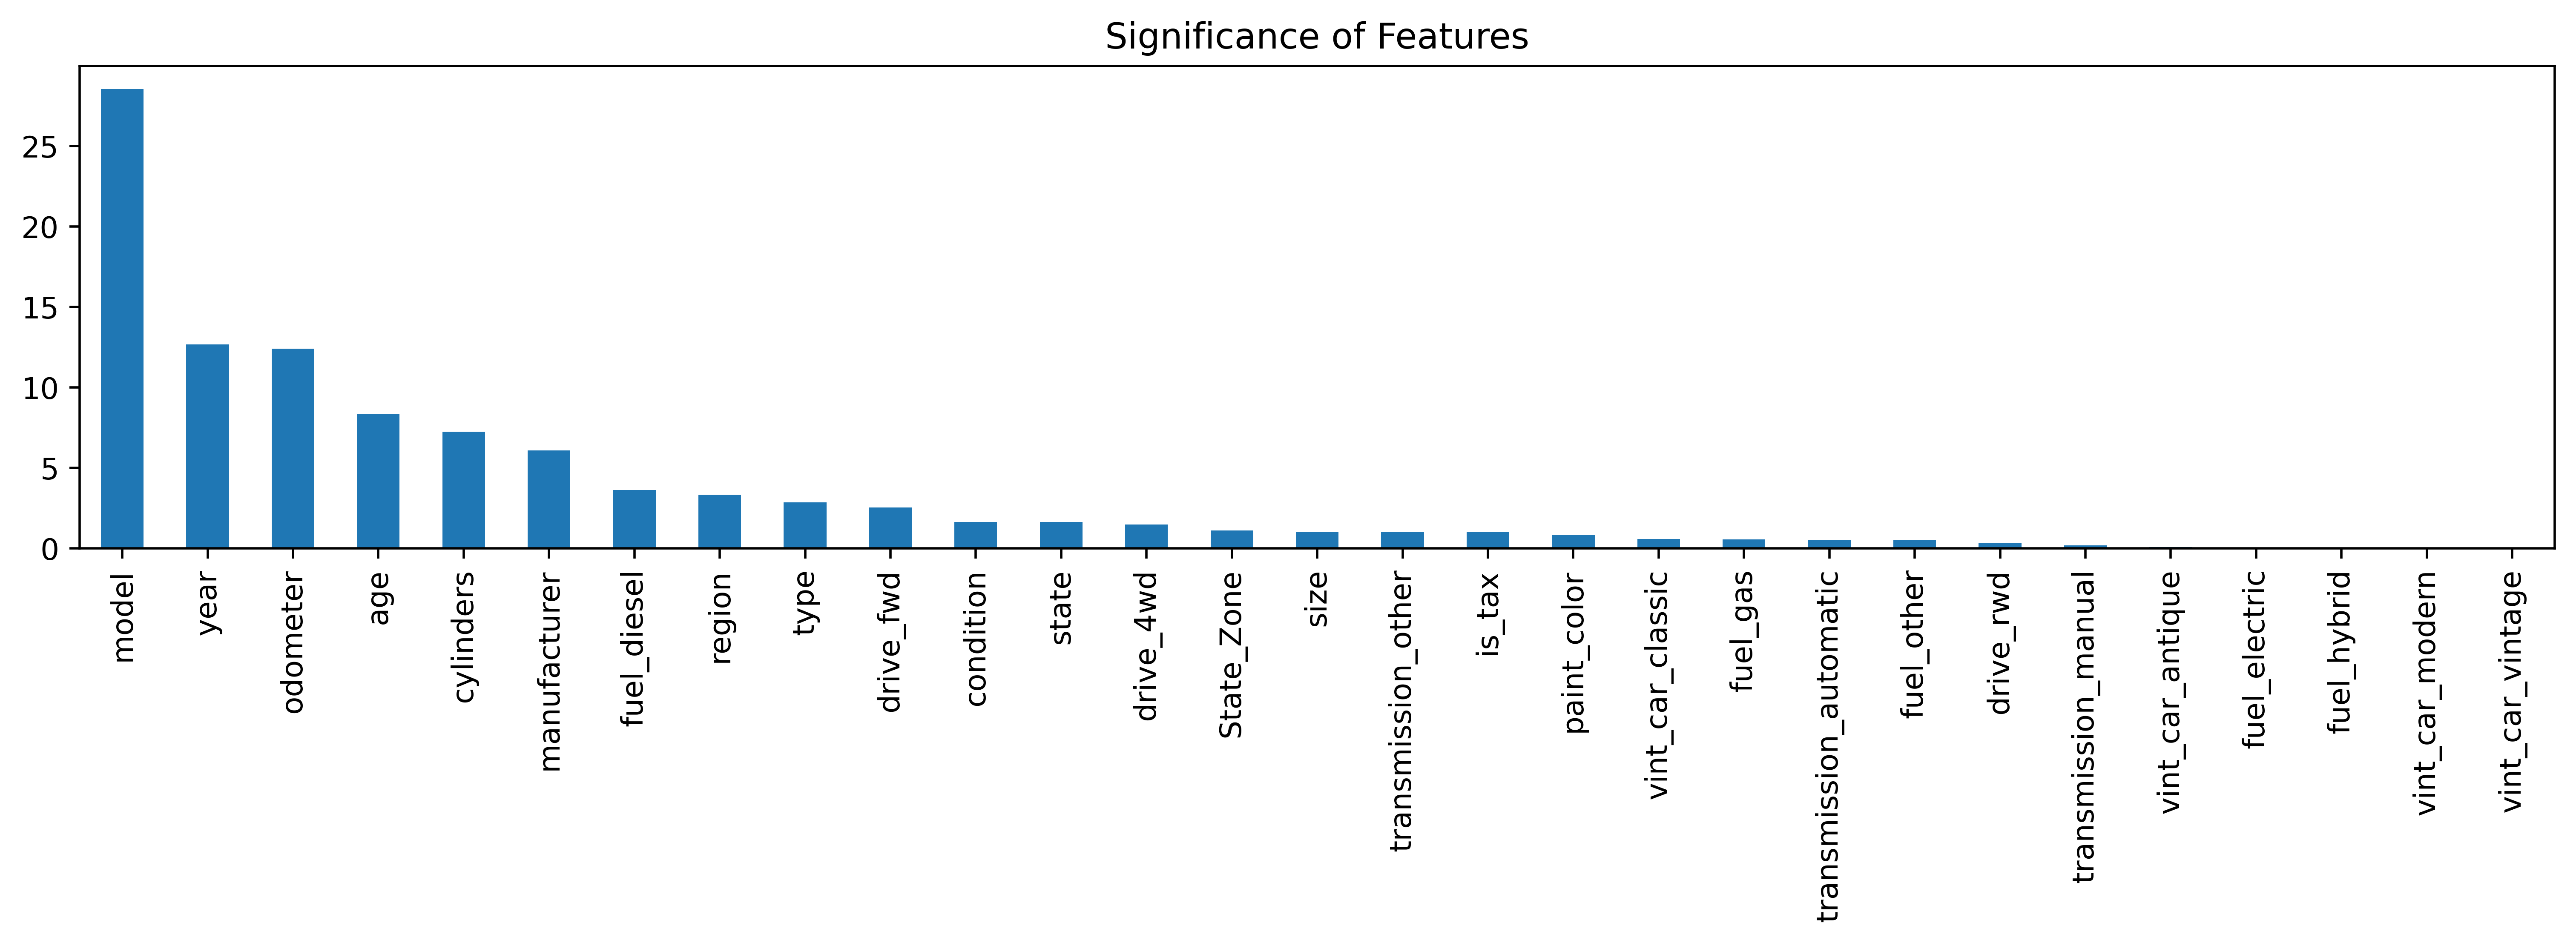

In [262]:
plt.figure(figsize=(15,3),dpi=500)
pd.Series(model_cat_tune.feature_importances_,index = xtrain.columns).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Significance of Features')
plt.show()

# 

## Final Inferences

### 1. Used cars with high Mileage are cheaper.

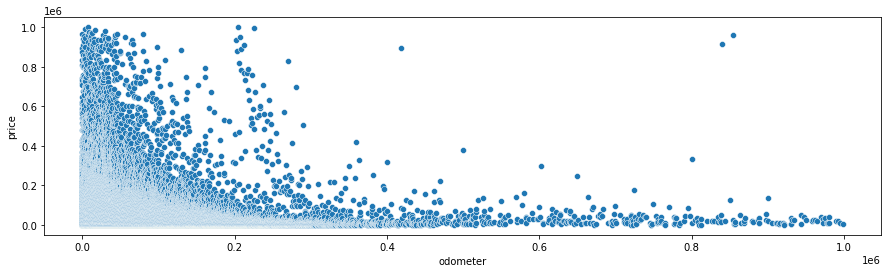

In [265]:
plt.figure(figsize=(15,4))


hypo1 = car[['odometer', 'price']].groupby( 'odometer' ).sum().reset_index()
# plt.subplot(3,1,1)
sns.scatterplot( x=hypo1[hypo1['odometer']<1000000]['odometer'], y=hypo1[hypo1['price']<1000000]['price'], data=hypo1)
plt.show()

### 2. Used cars with better Appearance are expensive.

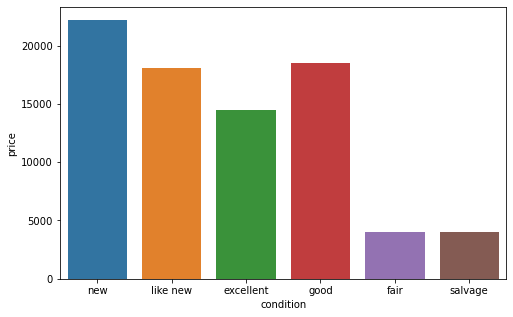

In [266]:
plt.figure(figsize=(8,5))

hypo2 = car1[['condition', 'price']].groupby( 'condition' ).mean().reset_index()
sns.barplot( x='condition', y='price', data=hypo2, order=['new', 'like new', 'excellent', 'good', 'fair', 'salvage']);

# Adjusting the order of the condition of the cars from the best condition to the worst condition,
  # we see a drop in price as the condition of the car worsens.
    #(There is an exception to this condition between categories good and excellent).

### 3. Used cars which come from big manufacturer are cost more.

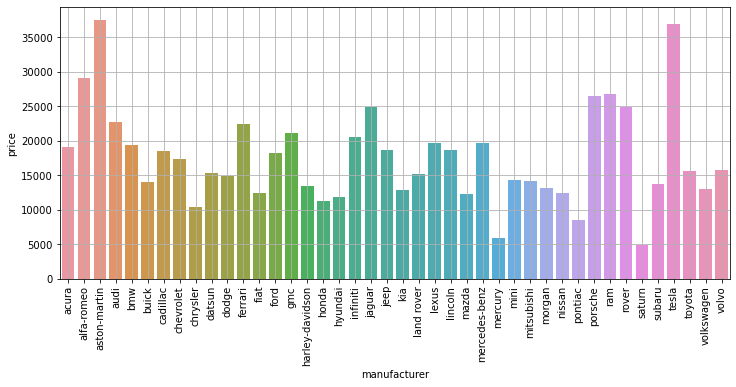

In [270]:
plt.figure(figsize=(12,5))

hypo3 = car1[['manufacturer', 'price']].groupby( 'manufacturer' ).mean().reset_index()
sns.barplot( x='manufacturer', y='price', data=hypo3)
plt.grid(visible=True)
plt.xticks( rotation=90)
plt.show()

### 4. Used cars with pickup or truck or coupe or convertible type are cost more.

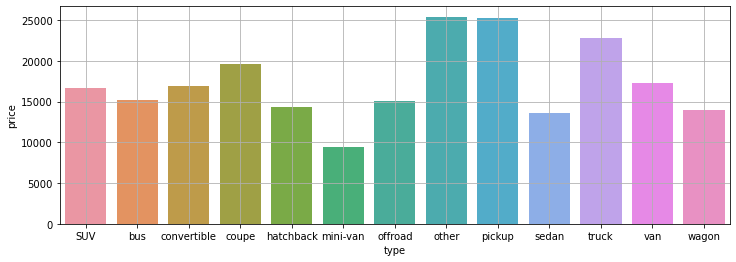

In [272]:
plt.figure(figsize=(12,4))

hypo4 = car1[['type', 'price']].groupby( 'type' ).mean().reset_index()
sns.barplot( x='type', y='price', data=hypo4)
plt.grid()
plt.show()

### 5. Used cars with white or black paint-color are expensive.

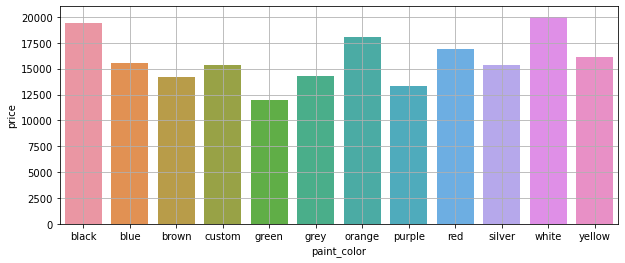

In [273]:
plt.figure(figsize=(10,4))

hypo5 = car1[['paint_color', 'price']].groupby( 'paint_color' ).mean().reset_index()
sns.barplot( x='paint_color', y='price', data=hypo5)
plt.grid()
plt.show()

### 6. Used cars with more cylinders are expensive.

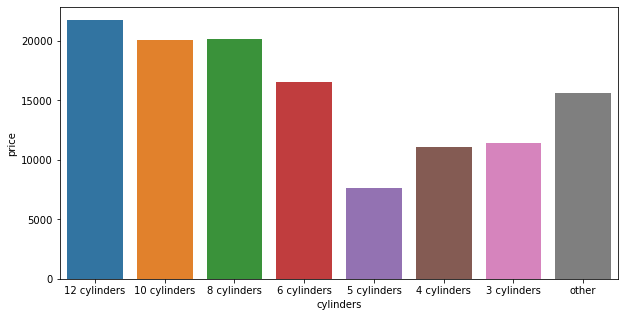

In [275]:
plt.figure(figsize=(10,5))

hypo6 = car1[['cylinders', 'price']].groupby( 'cylinders' ).mean().reset_index()
sns.barplot( x='cylinders', y='price', data=hypo6, order=['12 cylinders', '10 cylinders', '8 cylinders', '6 cylinders',
                                                          '5 cylinders', '4 cylinders', '3 cylinders', 'other'])
plt.show()

# There is an exception with 5 cylinders.

### 7. Used cars with higher vehicle age are cost less.

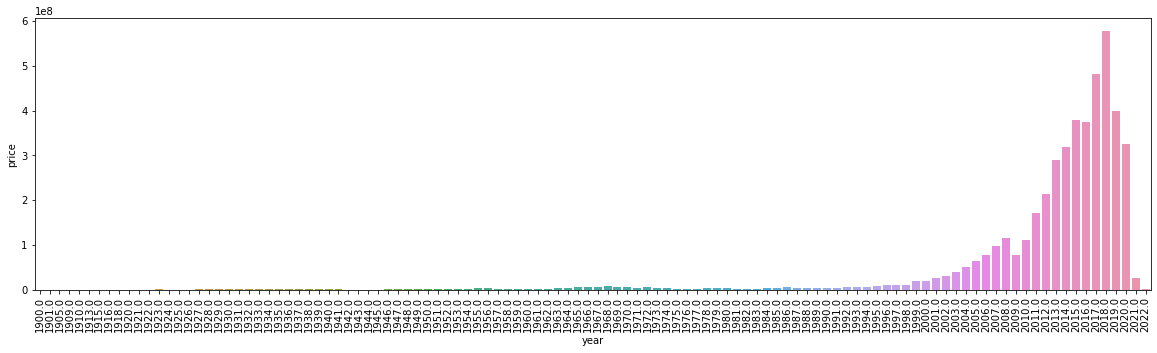

In [278]:
plt.figure(figsize=(20,5))

hypo7 = car1[['year', 'price']].groupby( 'year' ).sum().reset_index()

sns.barplot( x='year', y='price', data=hypo7)
plt.xticks(rotation = 90)
plt.show()